In [1]:
import pickle
from os import listdir
from os.path import isfile, join
import sys
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [2]:
# mypath =  "../../Downloads/298_Dataset-master/malware_dict/"

In [3]:
# directories = listdir("../../Downloads/298_Dataset-master/malware_dict/")

In [4]:
# onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [5]:
# for directory in directories:
#     pathToDir = mypath+directory+"/"
#     with open(pathToDir+"top.txt",'rb') as f:
#         dictionary = pickle.load(f,encoding='latin1')
#         print(len(dictionary))
        

In [6]:
# print(directories)

In [7]:
# count = 0
# for directory in directories:
#     pathToDir = mypath+directory+"/"
#     onlyfiles = [f for f in listdir(pathToDir) if isfile(join(pathToDir, f))]
#     count = count+len(onlyfiles)
# print(count)

In [8]:
# Dictionary = {}
# flag = 0
# for directory in directories:
#     pathToDir = mypath+directory+"/"
#     with open(pathToDir+"top.txt",'rb') as f:
#         d = pickle.load(f,encoding='latin1')
#         if flag == 0:
#             Dictionary = d
#             flag = 1
#         else :
#             for key,value in d.items():
#                 if key in Dictionary:
#                     Dictionary[key] = Dictionary[key] + value
#                 else :
#                     Dictionary[key] = value

In [9]:
# K = 1000

In [10]:
# featureVectorTopK = sorted(Dictionary.items(), key=lambda kv: kv[1],reverse=True)[:K]

In [11]:
# print(featureVectorTopK)

In [12]:
# dataset = []
# for directory in directories:
#     pathToDir = mypath+directory+"/"
#     fileName = [pathToDir+f for f in listdir(pathToDir) if isfile(join(pathToDir, f))]
#     for filePath in fileName:
#         dictionaryOfNgram = {}
#         with open(filePath,"rb") as f:
#             dictionaryOfNgram = pickle.load(f,encoding='latin1')
#         vectorForSample = []
#         for ngram_tuple in featureVectorTopK:
#             if (ngram_tuple[0] in dictionaryOfNgram.keys()):
#                 vectorForSample.append(dictionaryOfNgram[ngram_tuple[0]])
#             else:
#                 vectorForSample.append(0)
#         sumOfRow = sum(vectorForSample)
#         for i in range(0,len(vectorForSample)):
#             vectorForSample[i] = float(vectorForSample[i]) / sumOfRow
#         vectorForSample = [directory] + vectorForSample
#         dataset.append(vectorForSample)

In [13]:
# print(len(dataset))

In [14]:
# print(dataset[0])

In [15]:
# print(dataset)

In [16]:
# dataset_Tmp = pd.DataFrame(dataset,columns=["Family Name"]+[i for i in range(1,K+1)])
# dataset_Tmp.to_csv("../dataset/bigdata1/top1000_bigdata1.csv",sep="\t")

In [17]:
dataset_dataframe = pd.read_csv("../dataset/bigdata1/top1000_bigdata1.csv",sep="\t")
dataset_dataframe.head()

,Unnamed: 0,Family Name,1,2,3,4,5,6,7,8,...,991,992,993,994,995,996,997,998,999,1000
0,0,vobfus,0.161217,0.142666,0.058180,0.008559,0.000000,0.004410,0.007263,0.013166,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,vobfus,0.335831,0.111819,0.023257,0.002638,0.003637,0.007130,0.008142,0.016115,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,vobfus,0.215399,0.103113,0.067630,0.014031,0.005303,0.005638,0.013526,0.011528,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,vobfus,0.259472,0.080973,0.059598,0.010809,0.009412,0.008873,0.011053,0.013322,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,vobfus,0.222228,0.120731,0.012010,0.000000,0.004476,0.003771,0.005539,0.013656,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
dataset = np.array(dataset_dataframe.iloc[:,2:])

In [19]:
y = np.array(dataset_dataframe.loc[:,"Family Name"])

In [20]:
TopFamilyName = ['vobfus', 'lolyda', 'ceeinject', 'cycbot', 'bho', 'fakerean', 'alureon', 'renos', 'vundo', 'hotbar', 'adload', 'agent', 'startpage', 'delfinject', 'obfuscator', 'rbot', 'onlinegames']
topfam = set(TopFamilyName) 
label = []
for familyname in y:
    if familyname in topfam:
        for name_index in range(0,len(TopFamilyName)):
            if familyname == TopFamilyName[name_index]:
                label.append(name_index)
    else :
        label.append(len(TopFamilyName))
label = np.array(label)

In [21]:
print(len(TopFamilyName))

17


In [22]:
# avg_scores_knn = [0 for i in range(0,10)]
# n_itr = 5
# for itr in range(0,n_itr):
#     # Dividing the dataset into various sub-dataset
#     skf = StratifiedKFold(n_splits=10,shuffle=True)
#     subDatasetIndex = []
#     for train_index, test_index in skf.split(dataset,label):
#         subDatasetIndex.append(test_index)
#     # Verifying the whether the total is equal to total dataset
#     sum = 0;
#     for elem in subDatasetIndex:
#         print(len(elem))
#         sum = sum+len(elem)

#     MeanScoreForAll = []
#     sizeOfEachDataset = []
#     for i in range(1,11):
#         X = []
#         Y = []
#         tmp_sizeOfEachDataset_sum = 0;
#         for j in range (0,i):
#             tmp_sizeOfEachDataset_sum = tmp_sizeOfEachDataset_sum + len(subDatasetIndex[j])
#             for rowIndex in subDatasetIndex[j]:
#                 X.append(dataset[rowIndex])
#                 Y.append(label[rowIndex])
#         sizeOfEachDataset.append(tmp_sizeOfEachDataset_sum)
#         X = np.array(X)
#         Y = np.array(Y)
#         mean_accuracy_array = []
#         k_range = range(1, 31)
#         k_scores = []
#         # 1. we will loop through reasonable values of k
#         for k in k_range:
#             # 2. run KNeighborsClassifier with k neighbours
#             knn = KNeighborsClassifier(n_neighbors=k)
#             # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
#             cv = StratifiedKFold(n_splits=10,shuffle=True)
#             scores = cross_val_score(knn, X, Y, cv=cv, scoring='accuracy')
#             # 4. append mean of scores for k neighbors to k_scores list
#             k_scores.append(scores.mean())
#         print("For i = " + str(i))
#         print("Scores For K ranging from 1 to 30 \n" + str(k_scores))
#         highestAccuracy_k = (k_scores.index(max(k_scores))+1)
#         print("K with highest accuracy and its accuracy : " + str(highestAccuracy_k) +" , " + str(k_scores[highestAccuracy_k-1]))
#         mean_accuracy_array.append(k_scores[highestAccuracy_k-1])
#         mean = np.mean(mean_accuracy_array)
#         MeanScoreForAll.append(mean)
#         print("Mean Accuracy : " + str(mean))
#         print("\n\n")
#     for i in range(0,len(MeanScoreForAll)):
#         avg_scores_knn[i] = avg_scores_knn[i]+MeanScoreForAll[i]

In [23]:
# for score in avg_scores_knn:
#     print((score*100)/5)

In [24]:
# tmp = avg_scores_knn
# for i in range(0,len(avg_scores_knn)):
#     avg_scores_knn[i] = avg_scores_knn[i] / n_itr
# print(avg_scores_knn)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size=0.1)

In [26]:
print(len(X_train[0]))

1000


In [27]:
# Trial and error
# valuesOfEpochs = [5,10,50,100,200,500,1000]
# valuesOfTestSize = [0.1,0.2,0.3]
valuesOfEpochs = [100]
valuesOfTestSize = [0.1,0.2,0.3]
overAllY = []
n_itr = 5
for v in valuesOfTestSize:
    for e in valuesOfEpochs:
        sizeOfEachDataset = []
        accForVariousSize = [0 for i in range (0,10)]
        lossForVariousSize = [0 for i in range(0,10)]
        for itr in range(0,n_itr):
            print(str(v) + ", "+str(e) + ", "+str(itr))
            # Dividing the dataset into various sub-dataset
            skf = StratifiedKFold(n_splits=10,shuffle=True)
            subDatasetIndex = []
            for train_index, test_index in skf.split(dataset,label):
                subDatasetIndex.append(test_index)
                
            for i in range(1,11):
                print("------" + str(i) + "--------")
                X = []
                Y = []
                tmp_sizeOfEachDataset_sum = 0;
                for j in range (0,i):
                    tmp_sizeOfEachDataset_sum = tmp_sizeOfEachDataset_sum + len(subDatasetIndex[j])
                    for rowIndex in subDatasetIndex[j]:
                        X.append(dataset[rowIndex])
                        Y.append(label[rowIndex])
                sizeOfEachDataset.append(tmp_sizeOfEachDataset_sum)
                X = np.array(X)
                Y = np.array(Y)
                X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=v)
                model = keras.Sequential()
                model.add(keras.layers.Dense(128,activation='relu',kernel_initializer='random_normal',input_dim=1000))
                model.add(keras.layers.Dense(128,activation='relu',kernel_initializer='random_normal'))
                model.add(keras.layers.Dense(17, activation='sigmoid', kernel_initializer='random_normal'))
                model.compile(optimizer='adam', 
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])
                model.fit(X_train, y_train, epochs=e)
                loss, acc = model.evaluate(X_test,y_test)
                accForVariousSize[i-1] = accForVariousSize[i-1] + acc
                lossForVariousSize[i-1] = lossForVariousSize[i-1] + loss
        print(accForVariousSize)
            
        for i in range(0,10):
            accForVariousSize[i] = accForVariousSize[i] / n_itr
            lossForVariousSize[i] = lossForVariousSize[i] / n_itr
        overAllY.append(accForVariousSize)

0.1, 100, 0
------1--------
Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/100
1545/1545 [==============================] - 1s 570us/sample - loss: 2.8236 - acc: 0.1094
Epoch 2/100
1545/1545 [==============================] - 1s 400us/sample - loss: 2.6771 - acc: 0.1896
Epoch 3/100
1545/1545 [==============================] - 1s 415us/sample - loss: 2.3992 - acc: 0.2045
Epoch 4/100
1545/1545 [==============================] - 1s 364us/sample - loss: 2.1983 - acc: 0.3521
Epoch 5/100
1545/1545 [==============================] - 1s 438us/sample - loss: 1.9466 - acc: 0.4000
Epoch 6/100
1545/1545 [==============================] - 1s 392us/sample - loss: 1.7623 - acc: 0.4343
Epoch 7/100
1545/1545 [==============================] - 1s 434us/sample - loss: 1.6410 - acc: 0.4706
Epoch 8/100
1545/1545 [==============================] - 1s 507us/sample - loss: 1.5597 - acc: 0.5061
Epoch 9/100
1545/1545 [==============================] - 1s 500us/sample - loss: 1.4

1545/1545 [==============================] - 1s 582us/sample - loss: 0.2595 - acc: 0.9294
Epoch 78/100
1545/1545 [==============================] - 1s 487us/sample - loss: 0.2457 - acc: 0.9359
Epoch 79/100
1545/1545 [==============================] - 1s 530us/sample - loss: 0.2450 - acc: 0.9353
Epoch 80/100
1545/1545 [==============================] - 1s 519us/sample - loss: 0.2364 - acc: 0.9372
Epoch 81/100
1545/1545 [==============================] - 1s 503us/sample - loss: 0.2326 - acc: 0.9430
Epoch 82/100
1545/1545 [==============================] - 1s 436us/sample - loss: 0.2240 - acc: 0.9430
Epoch 83/100
1545/1545 [==============================] - 1s 490us/sample - loss: 0.2223 - acc: 0.9450
Epoch 84/100
1545/1545 [==============================] - 1s 528us/sample - loss: 0.2190 - acc: 0.9443
Epoch 85/100
1545/1545 [==============================] - 1s 514us/sample - loss: 0.2167 - acc: 0.9450
Epoch 86/100
1545/1545 [==============================] - 1s 512us/sample - loss: 0.20

3075/3075 [==============================] - 1s 477us/sample - loss: 0.2805 - acc: 0.9197
Epoch 55/100
3075/3075 [==============================] - 2s 490us/sample - loss: 0.2811 - acc: 0.9193
Epoch 56/100
3075/3075 [==============================] - 2s 569us/sample - loss: 0.2792 - acc: 0.9161
Epoch 57/100
3075/3075 [==============================] - 2s 628us/sample - loss: 0.2705 - acc: 0.9200s -
Epoch 58/100
3075/3075 [==============================] - 2s 553us/sample - loss: 0.2609 - acc: 0.9246
Epoch 59/100
3075/3075 [==============================] - 1s 479us/sample - loss: 0.2571 - acc: 0.9262
Epoch 60/100
3075/3075 [==============================] - ETA: 0s - loss: 0.2531 - acc: 0.929 - 2s 560us/sample - loss: 0.2512 - acc: 0.9301
Epoch 61/100
3075/3075 [==============================] - 1s 486us/sample - loss: 0.2438 - acc: 0.9268
Epoch 62/100
3075/3075 [==============================] - 1s 443us/sample - loss: 0.2380 - acc: 0.9285
Epoch 63/100
3075/3075 [=====================

4605/4605 [==============================] - 2s 495us/sample - loss: 0.3923 - acc: 0.8836
Epoch 33/100
4605/4605 [==============================] - 2s 495us/sample - loss: 0.3812 - acc: 0.8845
Epoch 34/100
4605/4605 [==============================] - 2s 491us/sample - loss: 0.3654 - acc: 0.8895
Epoch 35/100
4605/4605 [==============================] - 2s 467us/sample - loss: 0.3573 - acc: 0.8934
Epoch 36/100
4605/4605 [==============================] - 2s 467us/sample - loss: 0.3531 - acc: 0.8953
Epoch 37/100
4605/4605 [==============================] - 2s 478us/sample - loss: 0.3407 - acc: 0.8958
Epoch 38/100
4605/4605 [==============================] - 2s 490us/sample - loss: 0.3320 - acc: 0.8992
Epoch 39/100
4605/4605 [==============================] - 2s 493us/sample - loss: 0.3194 - acc: 0.9055
Epoch 40/100
4605/4605 [==============================] - 2s 484us/sample - loss: 0.3118 - acc: 0.9058
Epoch 41/100
4605/4605 [==============================] - 2s 451us/sample - loss: 0.30

6135/6135 [==============================] - 3s 461us/sample - loss: 0.7627 - acc: 0.7777
Epoch 11/100
6135/6135 [==============================] - 3s 465us/sample - loss: 0.7201 - acc: 0.7826
Epoch 12/100
6135/6135 [==============================] - 3s 497us/sample - loss: 0.6875 - acc: 0.7969
Epoch 13/100
6135/6135 [==============================] - 3s 464us/sample - loss: 0.6482 - acc: 0.8062
Epoch 14/100
6135/6135 [==============================] - 3s 515us/sample - loss: 0.6240 - acc: 0.8160
Epoch 15/100
6135/6135 [==============================] - 3s 492us/sample - loss: 0.5966 - acc: 0.8240
Epoch 16/100
6135/6135 [==============================] - 3s 478us/sample - loss: 0.5723 - acc: 0.8316
Epoch 17/100
6135/6135 [==============================] - 3s 486us/sample - loss: 0.5497 - acc: 0.8388
Epoch 18/100
6135/6135 [==============================] - 3s 491us/sample - loss: 0.5315 - acc: 0.8411
Epoch 19/100
6135/6135 [==============================] - 3s 495us/sample - loss: 0.50

6135/6135 [==============================] - 3s 485us/sample - loss: 0.1180 - acc: 0.9650
Epoch 90/100
6135/6135 [==============================] - 3s 497us/sample - loss: 0.1212 - acc: 0.9623
Epoch 91/100
6135/6135 [==============================] - 3s 485us/sample - loss: 0.1148 - acc: 0.9663
Epoch 92/100
6135/6135 [==============================] - 3s 536us/sample - loss: 0.1094 - acc: 0.9692
Epoch 93/100
6135/6135 [==============================] - 3s 456us/sample - loss: 0.1096 - acc: 0.9669
Epoch 94/100
6135/6135 [==============================] - 3s 415us/sample - loss: 0.1101 - acc: 0.9676
Epoch 95/100
6135/6135 [==============================] - 3s 411us/sample - loss: 0.1091 - acc: 0.9682
Epoch 96/100
6135/6135 [==============================] - 3s 479us/sample - loss: 0.1057 - acc: 0.9689
Epoch 97/100
6135/6135 [==============================] - 3s 510us/sample - loss: 0.1040 - acc: 0.9698
Epoch 98/100
6135/6135 [==============================] - 3s 510us/sample - loss: 0.10

7665/7665 [==============================] - 4s 523us/sample - loss: 0.1675 - acc: 0.9536
Epoch 68/100
7665/7665 [==============================] - 4s 507us/sample - loss: 0.1645 - acc: 0.9526
Epoch 69/100
7665/7665 [==============================] - 4s 497us/sample - loss: 0.1634 - acc: 0.9525
Epoch 70/100
7665/7665 [==============================] - 4s 493us/sample - loss: 0.1566 - acc: 0.9532
Epoch 71/100
7665/7665 [==============================] - 4s 478us/sample - loss: 0.1559 - acc: 0.9549
Epoch 72/100
7665/7665 [==============================] - 4s 493us/sample - loss: 0.1551 - acc: 0.9579
Epoch 73/100
7665/7665 [==============================] - 4s 465us/sample - loss: 0.1541 - acc: 0.9541
Epoch 74/100
7665/7665 [==============================] - 4s 477us/sample - loss: 0.1536 - acc: 0.9532
Epoch 75/100
7665/7665 [==============================] - 3s 449us/sample - loss: 0.1479 - acc: 0.9579
Epoch 76/100
7665/7665 [==============================] - 4s 508us/sample - loss: 0.14

9195/9195 [==============================] - 5s 505us/sample - loss: 0.2168 - acc: 0.9361
Epoch 46/100
9195/9195 [==============================] - 4s 479us/sample - loss: 0.2111 - acc: 0.9386
Epoch 47/100
9195/9195 [==============================] - 4s 486us/sample - loss: 0.2098 - acc: 0.9384
Epoch 48/100
9195/9195 [==============================] - 4s 471us/sample - loss: 0.2020 - acc: 0.9403
Epoch 49/100
9195/9195 [==============================] - 5s 501us/sample - loss: 0.1952 - acc: 0.9440
Epoch 50/100
9195/9195 [==============================] - 4s 478us/sample - loss: 0.1945 - acc: 0.9442
Epoch 51/100
9195/9195 [==============================] - 4s 476us/sample - loss: 0.1944 - acc: 0.9432
Epoch 52/100
9195/9195 [==============================] - 5s 493us/sample - loss: 0.1843 - acc: 0.9465
Epoch 53/100
9195/9195 [==============================] - 5s 498us/sample - loss: 0.1821 - acc: 0.9454
Epoch 54/100
9195/9195 [==============================] - 4s 449us/sample - loss: 0.17

10725/10725 [==============================] - 5s 474us/sample - loss: 0.3798 - acc: 0.8876
Epoch 24/100
10725/10725 [==============================] - 5s 478us/sample - loss: 0.3650 - acc: 0.8921
Epoch 25/100
10725/10725 [==============================] - 4s 403us/sample - loss: 0.3528 - acc: 0.8947
Epoch 26/100
10725/10725 [==============================] - 4s 396us/sample - loss: 0.3454 - acc: 0.8956
Epoch 27/100
10725/10725 [==============================] - 4s 390us/sample - loss: 0.3404 - acc: 0.8958
Epoch 28/100
10725/10725 [==============================] - 5s 465us/sample - loss: 0.3290 - acc: 0.9015
Epoch 29/100
10725/10725 [==============================] - 5s 487us/sample - loss: 0.3201 - acc: 0.9039
Epoch 30/100
10725/10725 [==============================] - 5s 501us/sample - loss: 0.3130 - acc: 0.9079
Epoch 31/100
10725/10725 [==============================] - 5s 486us/sample - loss: 0.3062 - acc: 0.9082
Epoch 32/100
10725/10725 [==============================] - 5s 473us

1192/1192 [==============================] - 0s 275us/sample - loss: 0.6794 - acc: 0.8826
------8--------
Epoch 1/100
12255/12255 [==============================] - 7s 551us/sample - loss: 2.2417 - acc: 0.2651
Epoch 2/100
12255/12255 [==============================] - 6s 511us/sample - loss: 1.4656 - acc: 0.5296
Epoch 3/100
12255/12255 [==============================] - 6s 483us/sample - loss: 1.1682 - acc: 0.6575
Epoch 4/100
12255/12255 [==============================] - 6s 471us/sample - loss: 0.9872 - acc: 0.7079
Epoch 5/100
12255/12255 [==============================] - 6s 489us/sample - loss: 0.8731 - acc: 0.7424
Epoch 6/100
12255/12255 [==============================] - 5s 442us/sample - loss: 0.7879 - acc: 0.7695
Epoch 7/100
12255/12255 [==============================] - 5s 399us/sample - loss: 0.7257 - acc: 0.7900
Epoch 8/100
12255/12255 [==============================] - 5s 390us/sample - loss: 0.6763 - acc: 0.8023
Epoch 9/100
12255/12255 [==============================] - 5s 

12255/12255 [==============================] - 5s 388us/sample - loss: 0.1224 - acc: 0.9653
Epoch 78/100
12255/12255 [==============================] - 5s 425us/sample - loss: 0.1246 - acc: 0.9621
Epoch 79/100
12255/12255 [==============================] - 6s 476us/sample - loss: 0.1167 - acc: 0.9670
Epoch 80/100
12255/12255 [==============================] - 6s 481us/sample - loss: 0.1165 - acc: 0.9664
Epoch 81/100
12255/12255 [==============================] - 6s 497us/sample - loss: 0.1177 - acc: 0.9669
Epoch 82/100
12255/12255 [==============================] - 6s 490us/sample - loss: 0.1143 - acc: 0.9672
Epoch 83/100
12255/12255 [==============================] - 6s 502us/sample - loss: 0.1146 - acc: 0.9674
Epoch 84/100
12255/12255 [==============================] - 6s 486us/sample - loss: 0.1129 - acc: 0.9675
Epoch 85/100
12255/12255 [==============================] - 6s 493us/sample - loss: 0.1118 - acc: 0.9675
Epoch 86/100
12255/12255 [==============================] - 6s 495us

13785/13785 [==============================] - 5s 390us/sample - loss: 0.1715 - acc: 0.9505
Epoch 55/100
13785/13785 [==============================] - 6s 452us/sample - loss: 0.1699 - acc: 0.9507
Epoch 56/100
13785/13785 [==============================] - 7s 493us/sample - loss: 0.1655 - acc: 0.9526
Epoch 57/100
13785/13785 [==============================] - 7s 517us/sample - loss: 0.1630 - acc: 0.9544
Epoch 58/100
13785/13785 [==============================] - 7s 506us/sample - loss: 0.1574 - acc: 0.9553
Epoch 59/100
13785/13785 [==============================] - 7s 509us/sample - loss: 0.1553 - acc: 0.9560
Epoch 60/100
13785/13785 [==============================] - 7s 494us/sample - loss: 0.1529 - acc: 0.9545
Epoch 61/100
13785/13785 [==============================] - 6s 463us/sample - loss: 0.1541 - acc: 0.9562
Epoch 62/100
13785/13785 [==============================] - 6s 463us/sample - loss: 0.1491 - acc: 0.9570
Epoch 63/100
13785/13785 [==============================] - 7s 480us

15315/15315 [==============================] - 7s 439us/sample - loss: 0.2614 - acc: 0.9236
Epoch 32/100
15315/15315 [==============================] - 6s 414us/sample - loss: 0.2583 - acc: 0.9251
Epoch 33/100
15315/15315 [==============================] - 6s 386us/sample - loss: 0.2512 - acc: 0.9263
Epoch 34/100
15315/15315 [==============================] - 6s 394us/sample - loss: 0.2470 - acc: 0.9282
Epoch 35/100
15315/15315 [==============================] - 6s 394us/sample - loss: 0.2436 - acc: 0.9291
Epoch 36/100
15315/15315 [==============================] - 7s 474us/sample - loss: 0.2357 - acc: 0.9309
Epoch 37/100
15315/15315 [==============================] - 7s 471us/sample - loss: 0.2302 - acc: 0.9322
Epoch 38/100
15315/15315 [==============================] - 8s 493us/sample - loss: 0.2264 - acc: 0.9328
Epoch 39/100
15315/15315 [==============================] - 7s 474us/sample - loss: 0.2200 - acc: 0.9368
Epoch 40/100
15315/15315 [==============================] - 7s 473us

1545/1545 [==============================] - 1s 459us/sample - loss: 1.5387 - acc: 0.4964
Epoch 9/100
1545/1545 [==============================] - 1s 456us/sample - loss: 1.4677 - acc: 0.5120
Epoch 10/100
1545/1545 [==============================] - 1s 598us/sample - loss: 1.3977 - acc: 0.5450
Epoch 11/100
1545/1545 [==============================] - 1s 535us/sample - loss: 1.3345 - acc: 0.6097
Epoch 12/100
1545/1545 [==============================] - 1s 527us/sample - loss: 1.2654 - acc: 0.6252
Epoch 13/100
1545/1545 [==============================] - 1s 563us/sample - loss: 1.2113 - acc: 0.6194
Epoch 14/100
1545/1545 [==============================] - 1s 426us/sample - loss: 1.1565 - acc: 0.6401
Epoch 15/100
1545/1545 [==============================] - 1s 374us/sample - loss: 1.1009 - acc: 0.6809
Epoch 16/100
1545/1545 [==============================] - 1s 424us/sample - loss: 1.0459 - acc: 0.6984
Epoch 17/100
1545/1545 [==============================] - 1s 412us/sample - loss: 1.006

1545/1545 [==============================] - 1s 446us/sample - loss: 0.1761 - acc: 0.9592
Epoch 88/100
1545/1545 [==============================] - 1s 467us/sample - loss: 0.1695 - acc: 0.9566
Epoch 89/100
1545/1545 [==============================] - 1s 351us/sample - loss: 0.1744 - acc: 0.9573
Epoch 90/100
1545/1545 [==============================] - 1s 354us/sample - loss: 0.1681 - acc: 0.9586
Epoch 91/100
1545/1545 [==============================] - 1s 411us/sample - loss: 0.1626 - acc: 0.9599
Epoch 92/100
1545/1545 [==============================] - 1s 414us/sample - loss: 0.1537 - acc: 0.9644
Epoch 93/100
1545/1545 [==============================] - 1s 421us/sample - loss: 0.1606 - acc: 0.9579
Epoch 94/100
1545/1545 [==============================] - 1s 422us/sample - loss: 0.1518 - acc: 0.9625
Epoch 95/100
1545/1545 [==============================] - 1s 414us/sample - loss: 0.1559 - acc: 0.9631
Epoch 96/100
1545/1545 [==============================] - 1s 393us/sample - loss: 0.14

3075/3075 [==============================] - 1s 480us/sample - loss: 0.2105 - acc: 0.9437
Epoch 66/100
3075/3075 [==============================] - 2s 499us/sample - loss: 0.2082 - acc: 0.9408
Epoch 67/100
3075/3075 [==============================] - 2s 491us/sample - loss: 0.2014 - acc: 0.9437
Epoch 68/100
3075/3075 [==============================] - 1s 453us/sample - loss: 0.1974 - acc: 0.9467
Epoch 69/100
3075/3075 [==============================] - 1s 453us/sample - loss: 0.2070 - acc: 0.9408
Epoch 70/100
3075/3075 [==============================] - 1s 479us/sample - loss: 0.1892 - acc: 0.9483
Epoch 71/100
3075/3075 [==============================] - 2s 521us/sample - loss: 0.1868 - acc: 0.9470
Epoch 72/100
3075/3075 [==============================] - 2s 493us/sample - loss: 0.1809 - acc: 0.9493
Epoch 73/100
3075/3075 [==============================] - 1s 444us/sample - loss: 0.1804 - acc: 0.9444
Epoch 74/100
3075/3075 [==============================] - 2s 488us/sample - loss: 0.17

4605/4605 [==============================] - 2s 474us/sample - loss: 0.3182 - acc: 0.9114
Epoch 44/100
4605/4605 [==============================] - 2s 532us/sample - loss: 0.3108 - acc: 0.9123
Epoch 45/100
4605/4605 [==============================] - 2s 476us/sample - loss: 0.3061 - acc: 0.9121
Epoch 46/100
4605/4605 [==============================] - 2s 503us/sample - loss: 0.3042 - acc: 0.9138
Epoch 47/100
4605/4605 [==============================] - 2s 517us/sample - loss: 0.2935 - acc: 0.9162
Epoch 48/100
4605/4605 [==============================] - 2s 518us/sample - loss: 0.2855 - acc: 0.9186
Epoch 49/100
4605/4605 [==============================] - 2s 502us/sample - loss: 0.2808 - acc: 0.9190
Epoch 50/100
4605/4605 [==============================] - 2s 506us/sample - loss: 0.2752 - acc: 0.9192
Epoch 51/100
4605/4605 [==============================] - 2s 506us/sample - loss: 0.2709 - acc: 0.9257
Epoch 52/100
4605/4605 [==============================] - 2s 484us/sample - loss: 0.26

6135/6135 [==============================] - 3s 481us/sample - loss: 0.5191 - acc: 0.8510
Epoch 22/100
6135/6135 [==============================] - 3s 505us/sample - loss: 0.4994 - acc: 0.8564
Epoch 23/100
6135/6135 [==============================] - 3s 517us/sample - loss: 0.4830 - acc: 0.8585
Epoch 24/100
6135/6135 [==============================] - 3s 512us/sample - loss: 0.4655 - acc: 0.8637
Epoch 25/100
6135/6135 [==============================] - 3s 508us/sample - loss: 0.4539 - acc: 0.8683
Epoch 26/100
6135/6135 [==============================] - 3s 504us/sample - loss: 0.4397 - acc: 0.8740
Epoch 27/100
6135/6135 [==============================] - 3s 522us/sample - loss: 0.4258 - acc: 0.8755
Epoch 28/100
6135/6135 [==============================] - 3s 495us/sample - loss: 0.4168 - acc: 0.8784
Epoch 29/100
6135/6135 [==============================] - 3s 520us/sample - loss: 0.4034 - acc: 0.8800
Epoch 30/100
6135/6135 [==============================] - 3s 534us/sample - loss: 0.39

682/682 [==============================] - 0s 621us/sample - loss: 0.8686 - acc: 0.8519
------5--------
Epoch 1/100
7665/7665 [==============================] - 4s 556us/sample - loss: 2.4921 - acc: 0.1896
Epoch 2/100
7665/7665 [==============================] - 4s 478us/sample - loss: 1.6928 - acc: 0.4594
Epoch 3/100
7665/7665 [==============================] - 4s 483us/sample - loss: 1.3542 - acc: 0.5965
Epoch 4/100
7665/7665 [==============================] - 4s 457us/sample - loss: 1.1392 - acc: 0.6669
Epoch 5/100
7665/7665 [==============================] - 4s 479us/sample - loss: 0.9978 - acc: 0.7144
Epoch 6/100
7665/7665 [==============================] - 3s 455us/sample - loss: 0.9038 - acc: 0.7383
Epoch 7/100
7665/7665 [==============================] - 4s 470us/sample - loss: 0.8291 - acc: 0.7601
Epoch 8/100
7665/7665 [==============================] - 4s 483us/sample - loss: 0.7718 - acc: 0.7743
Epoch 9/100
7665/7665 [==============================] - 4s 479us/sample - loss:

7665/7665 [==============================] - 4s 507us/sample - loss: 0.1222 - acc: 0.9645
Epoch 79/100
7665/7665 [==============================] - 4s 498us/sample - loss: 0.1097 - acc: 0.9675
Epoch 80/100
7665/7665 [==============================] - 4s 507us/sample - loss: 0.1098 - acc: 0.9657
Epoch 81/100
7665/7665 [==============================] - 3s 403us/sample - loss: 0.1089 - acc: 0.9663
Epoch 82/100
7665/7665 [==============================] - 3s 413us/sample - loss: 0.1109 - acc: 0.9663
Epoch 83/100
7665/7665 [==============================] - 3s 402us/sample - loss: 0.1089 - acc: 0.9680
Epoch 84/100
7665/7665 [==============================] - 3s 409us/sample - loss: 0.1025 - acc: 0.9696
Epoch 85/100
7665/7665 [==============================] - 3s 411us/sample - loss: 0.1037 - acc: 0.9692
Epoch 86/100
7665/7665 [==============================] - 3s 389us/sample - loss: 0.0994 - acc: 0.9699
Epoch 87/100
7665/7665 [==============================] - 3s 399us/sample - loss: 0.09

9195/9195 [==============================] - 4s 425us/sample - loss: 0.1836 - acc: 0.9462
Epoch 57/100
9195/9195 [==============================] - 4s 414us/sample - loss: 0.1775 - acc: 0.9496
Epoch 58/100
9195/9195 [==============================] - 4s 418us/sample - loss: 0.1742 - acc: 0.9501
Epoch 59/100
9195/9195 [==============================] - 4s 465us/sample - loss: 0.1735 - acc: 0.9504
Epoch 60/100
9195/9195 [==============================] - 4s 459us/sample - loss: 0.1717 - acc: 0.9502
Epoch 61/100
9195/9195 [==============================] - 4s 468us/sample - loss: 0.1663 - acc: 0.9520
Epoch 62/100
9195/9195 [==============================] - 5s 511us/sample - loss: 0.1644 - acc: 0.9514
Epoch 63/100
9195/9195 [==============================] - 4s 486us/sample - loss: 0.1560 - acc: 0.9561
Epoch 64/100
9195/9195 [==============================] - 4s 483us/sample - loss: 0.1576 - acc: 0.9549
Epoch 65/100
9195/9195 [==============================] - 4s 476us/sample - loss: 0.15

10725/10725 [==============================] - 4s 403us/sample - loss: 0.2701 - acc: 0.9207
Epoch 35/100
10725/10725 [==============================] - 4s 400us/sample - loss: 0.2658 - acc: 0.9216
Epoch 36/100
10725/10725 [==============================] - 4s 407us/sample - loss: 0.2558 - acc: 0.9252
Epoch 37/100
10725/10725 [==============================] - 4s 379us/sample - loss: 0.2540 - acc: 0.9263
Epoch 38/100
10725/10725 [==============================] - 4s 405us/sample - loss: 0.2478 - acc: 0.9286
Epoch 39/100
10725/10725 [==============================] - 5s 474us/sample - loss: 0.2412 - acc: 0.9296
Epoch 40/100
10725/10725 [==============================] - 5s 464us/sample - loss: 0.2366 - acc: 0.9319
Epoch 41/100
10725/10725 [==============================] - 4s 406us/sample - loss: 0.2331 - acc: 0.9317
Epoch 42/100
10725/10725 [==============================] - 4s 389us/sample - loss: 0.2248 - acc: 0.9352
Epoch 43/100
10725/10725 [==============================] - 4s 409us

12255/12255 [==============================] - 5s 436us/sample - loss: 0.5257 - acc: 0.8490
Epoch 12/100
12255/12255 [==============================] - 5s 401us/sample - loss: 0.4978 - acc: 0.8568
Epoch 13/100
12255/12255 [==============================] - 5s 387us/sample - loss: 0.4742 - acc: 0.8609
Epoch 14/100
12255/12255 [==============================] - 5s 414us/sample - loss: 0.4558 - acc: 0.8675
Epoch 15/100
12255/12255 [==============================] - 5s 411us/sample - loss: 0.4392 - acc: 0.8703
Epoch 16/100
12255/12255 [==============================] - 6s 459us/sample - loss: 0.4208 - acc: 0.8761
Epoch 17/100
12255/12255 [==============================] - 6s 498us/sample - loss: 0.4102 - acc: 0.8796
Epoch 18/100
12255/12255 [==============================] - 6s 496us/sample - loss: 0.3944 - acc: 0.8836
Epoch 19/100
12255/12255 [==============================] - 6s 487us/sample - loss: 0.3828 - acc: 0.8877
Epoch 20/100
12255/12255 [==============================] - 6s 500us

12255/12255 [==============================] - 6s 469us/sample - loss: 0.0988 - acc: 0.9694
Epoch 89/100
12255/12255 [==============================] - 6s 502us/sample - loss: 0.0979 - acc: 0.9692
Epoch 90/100
12255/12255 [==============================] - 6s 461us/sample - loss: 0.0983 - acc: 0.9706
Epoch 91/100
12255/12255 [==============================] - 6s 477us/sample - loss: 0.0948 - acc: 0.9722
Epoch 92/100
12255/12255 [==============================] - 5s 431us/sample - loss: 0.0955 - acc: 0.9716
Epoch 93/100
12255/12255 [==============================] - 5s 391us/sample - loss: 0.0934 - acc: 0.9717
Epoch 94/100
12255/12255 [==============================] - 5s 418us/sample - loss: 0.0901 - acc: 0.9727
Epoch 95/100
12255/12255 [==============================] - 5s 403us/sample - loss: 0.0924 - acc: 0.9719
Epoch 96/100
12255/12255 [==============================] - 5s 401us/sample - loss: 0.0911 - acc: 0.9729
Epoch 97/100
12255/12255 [==============================] - 5s 408us

13785/13785 [==============================] - 6s 417us/sample - loss: 0.1298 - acc: 0.9617
Epoch 66/100
13785/13785 [==============================] - 6s 410us/sample - loss: 0.1265 - acc: 0.9632
Epoch 67/100
13785/13785 [==============================] - 6s 410us/sample - loss: 0.1264 - acc: 0.9621
Epoch 68/100
13785/13785 [==============================] - 5s 398us/sample - loss: 0.1243 - acc: 0.9635
Epoch 69/100
13785/13785 [==============================] - 6s 411us/sample - loss: 0.1182 - acc: 0.9656
Epoch 70/100
13785/13785 [==============================] - 6s 416us/sample - loss: 0.1191 - acc: 0.9661
Epoch 71/100
13785/13785 [==============================] - 6s 402us/sample - loss: 0.1163 - acc: 0.9661
Epoch 72/100
13785/13785 [==============================] - 5s 376us/sample - loss: 0.1153 - acc: 0.9665
Epoch 73/100
13785/13785 [==============================] - 5s 382us/sample - loss: 0.1160 - acc: 0.9650
Epoch 74/100
13785/13785 [==============================] - 5s 381us

Epoch 42/100
15315/15315 [==============================] - 6s 414us/sample - loss: 0.1961 - acc: 0.9414
Epoch 43/100
15315/15315 [==============================] - 7s 444us/sample - loss: 0.1899 - acc: 0.9443
Epoch 44/100
15315/15315 [==============================] - 8s 509us/sample - loss: 0.1853 - acc: 0.9450
Epoch 45/100
15315/15315 [==============================] - 7s 464us/sample - loss: 0.1840 - acc: 0.9462
Epoch 46/100
15315/15315 [==============================] - 7s 472us/sample - loss: 0.1780 - acc: 0.9474
Epoch 47/100
15315/15315 [==============================] - 7s 473us/sample - loss: 0.1757 - acc: 0.9483
Epoch 48/100
15315/15315 [==============================] - 7s 485us/sample - loss: 0.1718 - acc: 0.9500
Epoch 49/100
15315/15315 [==============================] - 7s 463us/sample - loss: 0.1698 - acc: 0.9484
Epoch 50/100
15315/15315 [==============================] - 7s 471us/sample - loss: 0.1650 - acc: 0.9517
Epoch 51/100
15315/15315 [=============================

1545/1545 [==============================] - 1s 397us/sample - loss: 1.0549 - acc: 0.7029
Epoch 20/100
1545/1545 [==============================] - 1s 396us/sample - loss: 1.0165 - acc: 0.7204
Epoch 21/100
1545/1545 [==============================] - 1s 448us/sample - loss: 0.9834 - acc: 0.7152
Epoch 22/100
1545/1545 [==============================] - 1s 460us/sample - loss: 0.9572 - acc: 0.7191
Epoch 23/100
1545/1545 [==============================] - 1s 408us/sample - loss: 0.9230 - acc: 0.7269
Epoch 24/100
1545/1545 [==============================] - 1s 402us/sample - loss: 0.8922 - acc: 0.7320
Epoch 25/100
1545/1545 [==============================] - 1s 444us/sample - loss: 0.8701 - acc: 0.7502
Epoch 26/100
1545/1545 [==============================] - 1s 376us/sample - loss: 0.8324 - acc: 0.7573
Epoch 27/100
1545/1545 [==============================] - 1s 449us/sample - loss: 0.8143 - acc: 0.7586
Epoch 28/100
1545/1545 [==============================] - 1s 411us/sample - loss: 0.78

1545/1545 [==============================] - 1s 468us/sample - loss: 0.1884 - acc: 0.9450
Epoch 99/100
1545/1545 [==============================] - 1s 526us/sample - loss: 0.1818 - acc: 0.9515
Epoch 100/100
172/172 [==============================] - 1s 3ms/sample - loss: 0.9067 - acc: 0.8198
------2--------
Epoch 1/100
3075/3075 [==============================] - 2s 619us/sample - loss: 2.7574 - acc: 0.1122
Epoch 2/100
3075/3075 [==============================] - 1s 401us/sample - loss: 2.3593 - acc: 0.1707
Epoch 3/100
3075/3075 [==============================] - 1s 458us/sample - loss: 2.0556 - acc: 0.3242
Epoch 4/100
3075/3075 [==============================] - 1s 395us/sample - loss: 1.7285 - acc: 0.4192
Epoch 5/100
3075/3075 [==============================] - 1s 389us/sample - loss: 1.5696 - acc: 0.4793
Epoch 6/100
3075/3075 [==============================] - 1s 416us/sample - loss: 1.4500 - acc: 0.5385
Epoch 7/100
3075/3075 [==============================] - 1s 438us/sample - loss

3075/3075 [==============================] - 2s 530us/sample - loss: 0.1542 - acc: 0.9558
Epoch 77/100
3075/3075 [==============================] - 2s 516us/sample - loss: 0.1547 - acc: 0.9564
Epoch 78/100
3075/3075 [==============================] - 1s 417us/sample - loss: 0.1531 - acc: 0.9571
Epoch 79/100
3075/3075 [==============================] - 1s 416us/sample - loss: 0.1514 - acc: 0.9558
Epoch 80/100
3075/3075 [==============================] - 1s 446us/sample - loss: 0.1492 - acc: 0.9551s - loss:
Epoch 81/100
3075/3075 [==============================] - 1s 414us/sample - loss: 0.1578 - acc: 0.9558
Epoch 82/100
3075/3075 [==============================] - 1s 418us/sample - loss: 0.1449 - acc: 0.9593
Epoch 83/100
3075/3075 [==============================] - 1s 371us/sample - loss: 0.1471 - acc: 0.9590
Epoch 84/100
3075/3075 [==============================] - 1s 400us/sample - loss: 0.1350 - acc: 0.9636
Epoch 85/100
3075/3075 [==============================] - 1s 470us/sample - l

4605/4605 [==============================] - 2s 410us/sample - loss: 0.1979 - acc: 0.9422
Epoch 55/100
4605/4605 [==============================] - 2s 449us/sample - loss: 0.1963 - acc: 0.9414
Epoch 56/100
4605/4605 [==============================] - 2s 450us/sample - loss: 0.1928 - acc: 0.9444
Epoch 57/100
4605/4605 [==============================] - 2s 417us/sample - loss: 0.1871 - acc: 0.9470
Epoch 58/100
4605/4605 [==============================] - 2s 401us/sample - loss: 0.1818 - acc: 0.9474
Epoch 59/100
4605/4605 [==============================] - 2s 424us/sample - loss: 0.1767 - acc: 0.9509
Epoch 60/100
4605/4605 [==============================] - 2s 404us/sample - loss: 0.1745 - acc: 0.9505
Epoch 61/100
4605/4605 [==============================] - 2s 412us/sample - loss: 0.1674 - acc: 0.9546
Epoch 62/100
4605/4605 [==============================] - 2s 392us/sample - loss: 0.1651 - acc: 0.9524
Epoch 63/100
4605/4605 [==============================] - 2s 388us/sample - loss: 0.16

6135/6135 [==============================] - 2s 404us/sample - loss: 0.3695 - acc: 0.8926
Epoch 33/100
6135/6135 [==============================] - 2s 403us/sample - loss: 0.3627 - acc: 0.8950
Epoch 34/100
6135/6135 [==============================] - 3s 422us/sample - loss: 0.3585 - acc: 0.8941
Epoch 35/100
6135/6135 [==============================] - 3s 418us/sample - loss: 0.3515 - acc: 0.8981
Epoch 36/100
6135/6135 [==============================] - 2s 400us/sample - loss: 0.3444 - acc: 0.9002
Epoch 37/100
6135/6135 [==============================] - 3s 413us/sample - loss: 0.3353 - acc: 0.8998
Epoch 38/100
6135/6135 [==============================] - 3s 412us/sample - loss: 0.3221 - acc: 0.9066
Epoch 39/100
6135/6135 [==============================] - 2s 392us/sample - loss: 0.3164 - acc: 0.9082
Epoch 40/100
6135/6135 [==============================] - 3s 480us/sample - loss: 0.3062 - acc: 0.9089
Epoch 41/100
6135/6135 [==============================] - 3s 478us/sample - loss: 0.30

7665/7665 [==============================] - 3s 426us/sample - loss: 0.6844 - acc: 0.8060
Epoch 11/100
7665/7665 [==============================] - 3s 409us/sample - loss: 0.6463 - acc: 0.8119
Epoch 12/100
7665/7665 [==============================] - 3s 455us/sample - loss: 0.6145 - acc: 0.8228
Epoch 13/100
7665/7665 [==============================] - 3s 431us/sample - loss: 0.5877 - acc: 0.8294
Epoch 14/100
7665/7665 [==============================] - 3s 427us/sample - loss: 0.5651 - acc: 0.8346
Epoch 15/100
7665/7665 [==============================] - 3s 440us/sample - loss: 0.5423 - acc: 0.8412
Epoch 16/100
7665/7665 [==============================] - 3s 432us/sample - loss: 0.5236 - acc: 0.8491
Epoch 17/100
7665/7665 [==============================] - 3s 412us/sample - loss: 0.5027 - acc: 0.8514
Epoch 18/100
7665/7665 [==============================] - 3s 412us/sample - loss: 0.4855 - acc: 0.8549
Epoch 19/100
7665/7665 [==============================] - 3s 448us/sample - loss: 0.47

7665/7665 [==============================] - 4s 513us/sample - loss: 0.0964 - acc: 0.9726
Epoch 90/100
7665/7665 [==============================] - 4s 533us/sample - loss: 0.0995 - acc: 0.9721
Epoch 91/100
7665/7665 [==============================] - 4s 517us/sample - loss: 0.0972 - acc: 0.9714
Epoch 92/100
7665/7665 [==============================] - 4s 500us/sample - loss: 0.0984 - acc: 0.9699
Epoch 93/100
7665/7665 [==============================] - 4s 503us/sample - loss: 0.0974 - acc: 0.9714
Epoch 94/100
7665/7665 [==============================] - 4s 513us/sample - loss: 0.0948 - acc: 0.9725
Epoch 95/100
7665/7665 [==============================] - 4s 462us/sample - loss: 0.0915 - acc: 0.9740
Epoch 96/100
7665/7665 [==============================] - 4s 464us/sample - loss: 0.0913 - acc: 0.9729
Epoch 97/100
7665/7665 [==============================] - 3s 410us/sample - loss: 0.0894 - acc: 0.9725
Epoch 98/100
7665/7665 [==============================] - 3s 416us/sample - loss: 0.08

9195/9195 [==============================] - 5s 528us/sample - loss: 0.1314 - acc: 0.9616
Epoch 68/100
9195/9195 [==============================] - 5s 537us/sample - loss: 0.1278 - acc: 0.9633
Epoch 69/100
9195/9195 [==============================] - 5s 495us/sample - loss: 0.1219 - acc: 0.9639
Epoch 70/100
9195/9195 [==============================] - 5s 496us/sample - loss: 0.1246 - acc: 0.9641
Epoch 71/100
9195/9195 [==============================] - 4s 404us/sample - loss: 0.1201 - acc: 0.9655
Epoch 72/100
9195/9195 [==============================] - 4s 412us/sample - loss: 0.1187 - acc: 0.9684
Epoch 73/100
9195/9195 [==============================] - 4s 395us/sample - loss: 0.1147 - acc: 0.9664
Epoch 74/100
9195/9195 [==============================] - 4s 417us/sample - loss: 0.1155 - acc: 0.9660
Epoch 75/100
9195/9195 [==============================] - 4s 404us/sample - loss: 0.1124 - acc: 0.9662
Epoch 76/100
9195/9195 [==============================] - 4s 422us/sample - loss: 0.11

10725/10725 [==============================] - 4s 399us/sample - loss: 0.1991 - acc: 0.9420
Epoch 45/100
10725/10725 [==============================] - 4s 412us/sample - loss: 0.1945 - acc: 0.9440
Epoch 46/100
10725/10725 [==============================] - 5s 492us/sample - loss: 0.1890 - acc: 0.9448
Epoch 47/100
10725/10725 [==============================] - 6s 514us/sample - loss: 0.1856 - acc: 0.9445
Epoch 48/100
10725/10725 [==============================] - 6s 518us/sample - loss: 0.1844 - acc: 0.9462
Epoch 49/100
10725/10725 [==============================] - 6s 524us/sample - loss: 0.1820 - acc: 0.9460
Epoch 50/100
10725/10725 [==============================] - 5s 482us/sample - loss: 0.1765 - acc: 0.9479
Epoch 51/100
10725/10725 [==============================] - 5s 500us/sample - loss: 0.1729 - acc: 0.9485
Epoch 52/100
10725/10725 [==============================] - 5s 493us/sample - loss: 0.1719 - acc: 0.9494
Epoch 53/100
10725/10725 [==============================] - 6s 517us

12255/12255 [==============================] - 5s 428us/sample - loss: 0.3767 - acc: 0.8894
Epoch 22/100
12255/12255 [==============================] - 5s 422us/sample - loss: 0.3658 - acc: 0.8907
Epoch 23/100
12255/12255 [==============================] - 6s 453us/sample - loss: 0.3493 - acc: 0.8982
Epoch 24/100
12255/12255 [==============================] - 5s 423us/sample - loss: 0.3387 - acc: 0.9018
Epoch 25/100
12255/12255 [==============================] - 5s 425us/sample - loss: 0.3284 - acc: 0.9062
Epoch 26/100
12255/12255 [==============================] - 5s 422us/sample - loss: 0.3196 - acc: 0.9063
Epoch 27/100
12255/12255 [==============================] - 5s 447us/sample - loss: 0.3083 - acc: 0.9127
Epoch 28/100
12255/12255 [==============================] - 5s 406us/sample - loss: 0.3024 - acc: 0.9129
Epoch 29/100
12255/12255 [==============================] - 5s 408us/sample - loss: 0.2908 - acc: 0.9160
Epoch 30/100
12255/12255 [==============================] - 5s 427us

12255/12255 [==============================] - 6s 519us/sample - loss: 0.0848 - acc: 0.9755
Epoch 99/100
12255/12255 [==============================] - 6s 484us/sample - loss: 0.0860 - acc: 0.9761
Epoch 100/100
1362/1362 [==============================] - 1s 689us/sample - loss: 0.6755 - acc: 0.8847
------9--------
Epoch 1/100
13785/13785 [==============================] - 8s 598us/sample - loss: 2.1501 - acc: 0.2923
Epoch 2/100
13785/13785 [==============================] - 8s 609us/sample - loss: 1.3169 - acc: 0.5930
Epoch 3/100
13785/13785 [==============================] - 7s 500us/sample - loss: 1.0381 - acc: 0.6919
Epoch 4/100
13785/13785 [==============================] - 8s 554us/sample - loss: 0.8804 - acc: 0.7407
Epoch 5/100
13785/13785 [==============================] - 8s 553us/sample - loss: 0.7795 - acc: 0.7686
Epoch 6/100
13785/13785 [==============================] - 7s 503us/sample - loss: 0.7032 - acc: 0.7968
Epoch 7/100
13785/13785 [==============================] - 

13785/13785 [==============================] - 6s 427us/sample - loss: 0.1112 - acc: 0.9664
Epoch 75/100
13785/13785 [==============================] - 6s 419us/sample - loss: 0.1068 - acc: 0.9685
Epoch 76/100
13785/13785 [==============================] - 7s 489us/sample - loss: 0.1077 - acc: 0.9689
Epoch 77/100
13785/13785 [==============================] - 7s 513us/sample - loss: 0.1063 - acc: 0.9682
Epoch 78/100
13785/13785 [==============================] - 7s 489us/sample - loss: 0.1018 - acc: 0.9700
Epoch 79/100
13785/13785 [==============================] - 7s 510us/sample - loss: 0.1059 - acc: 0.9687
Epoch 80/100
13785/13785 [==============================] - 7s 496us/sample - loss: 0.0973 - acc: 0.9706
Epoch 81/100
13785/13785 [==============================] - 7s 537us/sample - loss: 0.1026 - acc: 0.9703
Epoch 82/100
13785/13785 [==============================] - 7s 472us/sample - loss: 0.0978 - acc: 0.9715
Epoch 83/100
13785/13785 [==============================] - 7s 515us

15315/15315 [==============================] - 8s 547us/sample - loss: 0.1673 - acc: 0.9500
Epoch 51/100
15315/15315 [==============================] - 7s 488us/sample - loss: 0.1640 - acc: 0.9494
Epoch 52/100
15315/15315 [==============================] - 8s 525us/sample - loss: 0.1616 - acc: 0.9510
Epoch 53/100
15315/15315 [==============================] - 8s 521us/sample - loss: 0.1546 - acc: 0.9543
Epoch 54/100
15315/15315 [==============================] - 6s 378us/sample - loss: 0.1532 - acc: 0.9548
Epoch 55/100
15315/15315 [==============================] - 6s 380us/sample - loss: 0.1519 - acc: 0.9557
Epoch 56/100
15315/15315 [==============================] - 8s 513us/sample - loss: 0.1457 - acc: 0.9580
Epoch 57/100
15315/15315 [==============================] - 8s 520us/sample - loss: 0.1455 - acc: 0.9567
Epoch 58/100
15315/15315 [==============================] - 8s 512us/sample - loss: 0.1441 - acc: 0.9577
Epoch 59/100
15315/15315 [==============================] - 8s 523us

1545/1545 [==============================] - 1s 486us/sample - loss: 0.7294 - acc: 0.7961
Epoch 28/100
1545/1545 [==============================] - 1s 514us/sample - loss: 0.7124 - acc: 0.7929
Epoch 29/100
1545/1545 [==============================] - 1s 500us/sample - loss: 0.6886 - acc: 0.8104
Epoch 30/100
1545/1545 [==============================] - 1s 517us/sample - loss: 0.6760 - acc: 0.8084
Epoch 31/100
1545/1545 [==============================] - 1s 606us/sample - loss: 0.6506 - acc: 0.8117
Epoch 32/100
1545/1545 [==============================] - 1s 505us/sample - loss: 0.6325 - acc: 0.8246
Epoch 33/100
1545/1545 [==============================] - 1s 499us/sample - loss: 0.6161 - acc: 0.8201
Epoch 34/100
1545/1545 [==============================] - 1s 498us/sample - loss: 0.6059 - acc: 0.8252
Epoch 35/100
1545/1545 [==============================] - 1s 474us/sample - loss: 0.5815 - acc: 0.8285
Epoch 36/100
1545/1545 [==============================] - 1s 444us/sample - loss: 0.57

3075/3075 [==============================] - 1s 488us/sample - loss: 1.5656 - acc: 0.5076
Epoch 6/100
3075/3075 [==============================] - 2s 542us/sample - loss: 1.4435 - acc: 0.5681
Epoch 7/100
3075/3075 [==============================] - 2s 535us/sample - loss: 1.3363 - acc: 0.5915
Epoch 8/100
3075/3075 [==============================] - 1s 431us/sample - loss: 1.2393 - acc: 0.6299
Epoch 9/100
3075/3075 [==============================] - 2s 580us/sample - loss: 1.1599 - acc: 0.6511
Epoch 10/100
3075/3075 [==============================] - 2s 522us/sample - loss: 1.0821 - acc: 0.6823
Epoch 11/100
3075/3075 [==============================] - 1s 474us/sample - loss: 1.0198 - acc: 0.6894
Epoch 12/100
3075/3075 [==============================] - 1s 481us/sample - loss: 0.9648 - acc: 0.7145
Epoch 13/100
3075/3075 [==============================] - 1s 432us/sample - loss: 0.9088 - acc: 0.7346
Epoch 14/100
3075/3075 [==============================] - 1s 479us/sample - loss: 0.8719 -

3075/3075 [==============================] - 2s 598us/sample - loss: 0.1513 - acc: 0.9580
Epoch 85/100
3075/3075 [==============================] - ETA: 0s - loss: 0.1483 - acc: 0.957 - 2s 517us/sample - loss: 0.1478 - acc: 0.9580
Epoch 86/100
3075/3075 [==============================] - 2s 540us/sample - loss: 0.1379 - acc: 0.9600
Epoch 87/100
3075/3075 [==============================] - 2s 531us/sample - loss: 0.1464 - acc: 0.9551
Epoch 88/100
3075/3075 [==============================] - 2s 542us/sample - loss: 0.1352 - acc: 0.9629
Epoch 89/100
3075/3075 [==============================] - 2s 555us/sample - loss: 0.1359 - acc: 0.9639
Epoch 90/100
3075/3075 [==============================] - 1s 480us/sample - loss: 0.1282 - acc: 0.9639
Epoch 91/100
3075/3075 [==============================] - 2s 520us/sample - loss: 0.1286 - acc: 0.9652
Epoch 92/100
3075/3075 [==============================] - 2s 502us/sample - loss: 0.1241 - acc: 0.9688
Epoch 93/100
3075/3075 [========================

4605/4605 [==============================] - 2s 526us/sample - loss: 0.1956 - acc: 0.9409
Epoch 63/100
4605/4605 [==============================] - 3s 576us/sample - loss: 0.1891 - acc: 0.9440
Epoch 64/100
4605/4605 [==============================] - 2s 491us/sample - loss: 0.1842 - acc: 0.9470
Epoch 65/100
4605/4605 [==============================] - 3s 571us/sample - loss: 0.1858 - acc: 0.9418
Epoch 66/100
4605/4605 [==============================] - 3s 574us/sample - loss: 0.1782 - acc: 0.9505
Epoch 67/100
4605/4605 [==============================] - 2s 513us/sample - loss: 0.1734 - acc: 0.9501
Epoch 68/100
4605/4605 [==============================] - 2s 532us/sample - loss: 0.1770 - acc: 0.9474
Epoch 69/100
4605/4605 [==============================] - 2s 501us/sample - loss: 0.1687 - acc: 0.9511s - loss: 0.1652 - 
Epoch 70/100
4605/4605 [==============================] - 2s 516us/sample - loss: 0.1663 - acc: 0.9524
Epoch 71/100
4605/4605 [==============================] - 3s 554us/

6135/6135 [==============================] - 3s 514us/sample - loss: 0.2764 - acc: 0.9206
Epoch 41/100
6135/6135 [==============================] - 3s 540us/sample - loss: 0.2679 - acc: 0.9200
Epoch 42/100
6135/6135 [==============================] - 3s 549us/sample - loss: 0.2658 - acc: 0.9242
Epoch 43/100
6135/6135 [==============================] - 3s 551us/sample - loss: 0.2562 - acc: 0.9278
Epoch 44/100
6135/6135 [==============================] - 3s 564us/sample - loss: 0.2500 - acc: 0.9270
Epoch 45/100
6135/6135 [==============================] - 3s 421us/sample - loss: 0.2443 - acc: 0.9317
Epoch 46/100
6135/6135 [==============================] - 3s 555us/sample - loss: 0.2428 - acc: 0.9299
Epoch 47/100
6135/6135 [==============================] - 3s 491us/sample - loss: 0.2303 - acc: 0.9364
Epoch 48/100
6135/6135 [==============================] - 3s 529us/sample - loss: 0.2255 - acc: 0.9333
Epoch 49/100
6135/6135 [==============================] - 3s 513us/sample - loss: 0.21

7665/7665 [==============================] - 4s 497us/sample - loss: 0.5044 - acc: 0.8502
Epoch 18/100
7665/7665 [==============================] - 4s 494us/sample - loss: 0.4845 - acc: 0.8557
Epoch 19/100
7665/7665 [==============================] - 4s 493us/sample - loss: 0.4666 - acc: 0.8601
Epoch 20/100
7665/7665 [==============================] - 4s 548us/sample - loss: 0.4507 - acc: 0.8642
Epoch 21/100
7665/7665 [==============================] - 4s 480us/sample - loss: 0.4388 - acc: 0.8667
Epoch 22/100
7665/7665 [==============================] - 4s 542us/sample - loss: 0.4250 - acc: 0.8710
Epoch 23/100
7665/7665 [==============================] - 4s 491us/sample - loss: 0.4104 - acc: 0.8787
Epoch 24/100
7665/7665 [==============================] - 4s 519us/sample - loss: 0.3987 - acc: 0.8811
Epoch 25/100
7665/7665 [==============================] - 4s 551us/sample - loss: 0.3838 - acc: 0.8841
Epoch 26/100
7665/7665 [==============================] - 4s 521us/sample - loss: 0.37

7665/7665 [==============================] - 4s 482us/sample - loss: 0.0974 - acc: 0.9718
Epoch 97/100
7665/7665 [==============================] - 4s 539us/sample - loss: 0.0918 - acc: 0.9743
Epoch 98/100
7665/7665 [==============================] - 4s 459us/sample - loss: 0.0902 - acc: 0.9729
Epoch 99/100
7665/7665 [==============================] - 4s 530us/sample - loss: 0.0894 - acc: 0.9764
Epoch 100/100
852/852 [==============================] - 1s 1ms/sample - loss: 0.6757 - acc: 0.8920
------6--------
Epoch 1/100
9195/9195 [==============================] - 6s 625us/sample - loss: 2.4040 - acc: 0.2251
Epoch 2/100
9195/9195 [==============================] - 5s 499us/sample - loss: 1.5202 - acc: 0.5351
Epoch 3/100
9195/9195 [==============================] - 4s 456us/sample - loss: 1.1923 - acc: 0.6493
Epoch 4/100
9195/9195 [==============================] - 5s 496us/sample - loss: 1.0249 - acc: 0.7016
Epoch 5/100
9195/9195 [==============================] - ETA: 0s - loss: 0.91

Epoch 74/100
9195/9195 [==============================] - 5s 560us/sample - loss: 0.1225 - acc: 0.9645
Epoch 75/100
9195/9195 [==============================] - 5s 590us/sample - loss: 0.1215 - acc: 0.9649
Epoch 76/100
9195/9195 [==============================] - 5s 553us/sample - loss: 0.1187 - acc: 0.9666
Epoch 77/100
9195/9195 [==============================] - 5s 557us/sample - loss: 0.1185 - acc: 0.9647
Epoch 78/100
9195/9195 [==============================] - 5s 527us/sample - loss: 0.1184 - acc: 0.9659
Epoch 79/100
9195/9195 [==============================] - 5s 558us/sample - loss: 0.1130 - acc: 0.9667
Epoch 80/100
9195/9195 [==============================] - 5s 558us/sample - loss: 0.1127 - acc: 0.9665
Epoch 81/100
9195/9195 [==============================] - 6s 599us/sample - loss: 0.1148 - acc: 0.9670
Epoch 82/100
9195/9195 [==============================] - 5s 553us/sample - loss: 0.1088 - acc: 0.9669
Epoch 83/100
9195/9195 [==============================] - 5s 560us/sample

10725/10725 [==============================] - 4s 397us/sample - loss: 0.1883 - acc: 0.9463
Epoch 52/100
10725/10725 [==============================] - 4s 397us/sample - loss: 0.1840 - acc: 0.9477
Epoch 53/100
10725/10725 [==============================] - 4s 395us/sample - loss: 0.1792 - acc: 0.9472
Epoch 54/100
10725/10725 [==============================] - 4s 404us/sample - loss: 0.1777 - acc: 0.9480
Epoch 55/100
10725/10725 [==============================] - 4s 395us/sample - loss: 0.1758 - acc: 0.9493
Epoch 56/100
10725/10725 [==============================] - 4s 405us/sample - loss: 0.1728 - acc: 0.9501
Epoch 57/100
10725/10725 [==============================] - 4s 398us/sample - loss: 0.1673 - acc: 0.9520
Epoch 58/100
10725/10725 [==============================] - 4s 405us/sample - loss: 0.1625 - acc: 0.9523
Epoch 59/100
10725/10725 [==============================] - 3s 310us/sample - loss: 0.1624 - acc: 0.9532
Epoch 60/100
10725/10725 [==============================] - 5s 438us

12255/12255 [==============================] - 4s 358us/sample - loss: 0.2901 - acc: 0.9150
Epoch 29/100
12255/12255 [==============================] - 5s 371us/sample - loss: 0.2820 - acc: 0.9165
Epoch 30/100
12255/12255 [==============================] - 4s 362us/sample - loss: 0.2758 - acc: 0.9178
Epoch 31/100
12255/12255 [==============================] - ETA: 0s - loss: 0.2649 - acc: 0.924 - 5s 372us/sample - loss: 0.2647 - acc: 0.9243
Epoch 32/100
12255/12255 [==============================] - 4s 363us/sample - loss: 0.2604 - acc: 0.9223
Epoch 33/100
12255/12255 [==============================] - 5s 394us/sample - loss: 0.2534 - acc: 0.9249
Epoch 34/100
12255/12255 [==============================] - 5s 397us/sample - loss: 0.2457 - acc: 0.9275
Epoch 35/100
12255/12255 [==============================] - 5s 404us/sample - loss: 0.2399 - acc: 0.9292
Epoch 36/100
12255/12255 [==============================] - 5s 398us/sample - loss: 0.2352 - acc: 0.9290
Epoch 37/100
12255/12255 [====

13785/13785 [==============================] - 5s 393us/sample - loss: 0.8711 - acc: 0.7444
Epoch 5/100
13785/13785 [==============================] - 5s 387us/sample - loss: 0.7788 - acc: 0.7702
Epoch 6/100
13785/13785 [==============================] - 5s 389us/sample - loss: 0.7121 - acc: 0.7935
Epoch 7/100
13785/13785 [==============================] - 5s 397us/sample - loss: 0.6612 - acc: 0.8047
Epoch 8/100
13785/13785 [==============================] - 5s 388us/sample - loss: 0.6174 - acc: 0.8189
Epoch 9/100
13785/13785 [==============================] - 5s 391us/sample - loss: 0.5781 - acc: 0.8307
Epoch 10/100
13785/13785 [==============================] - 5s 386us/sample - loss: 0.5475 - acc: 0.8386
Epoch 11/100
13785/13785 [==============================] - 6s 400us/sample - loss: 0.5199 - acc: 0.8450
Epoch 12/100
13785/13785 [==============================] - 5s 390us/sample - loss: 0.4968 - acc: 0.8522
Epoch 13/100
13785/13785 [==============================] - 5s 393us/samp

13785/13785 [==============================] - 5s 343us/sample - loss: 0.0952 - acc: 0.9734
Epoch 83/100
13785/13785 [==============================] - 5s 382us/sample - loss: 0.0944 - acc: 0.9710
Epoch 84/100
13785/13785 [==============================] - 5s 390us/sample - loss: 0.0911 - acc: 0.9730
Epoch 85/100
13785/13785 [==============================] - 5s 386us/sample - loss: 0.0852 - acc: 0.9747
Epoch 86/100
13785/13785 [==============================] - 5s 392us/sample - loss: 0.0848 - acc: 0.9749
Epoch 87/100
13785/13785 [==============================] - 5s 381us/sample - loss: 0.0841 - acc: 0.9753
Epoch 88/100
13785/13785 [==============================] - 5s 396us/sample - loss: 0.0813 - acc: 0.9759
Epoch 89/100
13785/13785 [==============================] - 5s 384us/sample - loss: 0.0862 - acc: 0.9752
Epoch 90/100
13785/13785 [==============================] - 5s 389us/sample - loss: 0.0862 - acc: 0.9738
Epoch 91/100
13785/13785 [==============================] - 5s 393us

15315/15315 [==============================] - 3s 204us/sample - loss: 0.1319 - acc: 0.9615
Epoch 60/100
15315/15315 [==============================] - 4s 264us/sample - loss: 0.1328 - acc: 0.9610
Epoch 61/100
15315/15315 [==============================] - 6s 380us/sample - loss: 0.1305 - acc: 0.9613
Epoch 62/100
15315/15315 [==============================] - 5s 324us/sample - loss: 0.1280 - acc: 0.9617
Epoch 63/100
15315/15315 [==============================] - 5s 351us/sample - loss: 0.1237 - acc: 0.9630
Epoch 64/100
15315/15315 [==============================] - 5s 330us/sample - loss: 0.1219 - acc: 0.9655
Epoch 65/100
15315/15315 [==============================] - 5s 317us/sample - loss: 0.1208 - acc: 0.9633
Epoch 66/100
15315/15315 [==============================] - 5s 312us/sample - loss: 0.1214 - acc: 0.9641
Epoch 67/100
15315/15315 [==============================] - 5s 312us/sample - loss: 0.1166 - acc: 0.9659
Epoch 68/100
15315/15315 [==============================] - 6s 407us

1545/1545 [==============================] - 1s 364us/sample - loss: 0.5573 - acc: 0.8447
Epoch 37/100
1545/1545 [==============================] - 1s 389us/sample - loss: 0.5409 - acc: 0.8479
Epoch 38/100
1545/1545 [==============================] - 1s 357us/sample - loss: 0.5250 - acc: 0.8485
Epoch 39/100
1545/1545 [==============================] - 1s 391us/sample - loss: 0.5207 - acc: 0.8544
Epoch 40/100
1545/1545 [==============================] - 1s 433us/sample - loss: 0.5017 - acc: 0.8570
Epoch 41/100
1545/1545 [==============================] - 1s 392us/sample - loss: 0.4849 - acc: 0.8634
Epoch 42/100
1545/1545 [==============================] - 1s 399us/sample - loss: 0.4796 - acc: 0.8641
Epoch 43/100
1545/1545 [==============================] - 1s 384us/sample - loss: 0.4618 - acc: 0.8667
Epoch 44/100
1545/1545 [==============================] - 1s 429us/sample - loss: 0.4579 - acc: 0.8712
Epoch 45/100
1545/1545 [==============================] - 1s 441us/sample - loss: 0.43

3075/3075 [==============================] - 1s 383us/sample - loss: 0.9221 - acc: 0.7359
Epoch 15/100
3075/3075 [==============================] - 1s 399us/sample - loss: 0.8874 - acc: 0.7450
Epoch 16/100
3075/3075 [==============================] - 1s 388us/sample - loss: 0.8383 - acc: 0.7558
Epoch 17/100
3075/3075 [==============================] - 1s 395us/sample - loss: 0.8059 - acc: 0.7717
Epoch 18/100
3075/3075 [==============================] - 1s 395us/sample - loss: 0.7689 - acc: 0.7798
Epoch 19/100
3075/3075 [==============================] - 1s 407us/sample - loss: 0.7382 - acc: 0.7805
Epoch 20/100
3075/3075 [==============================] - 1s 391us/sample - loss: 0.7075 - acc: 0.7993
Epoch 21/100
3075/3075 [==============================] - 1s 374us/sample - loss: 0.6855 - acc: 0.7932
Epoch 22/100
3075/3075 [==============================] - 1s 411us/sample - loss: 0.6519 - acc: 0.8120
Epoch 23/100
3075/3075 [==============================] - 1s 375us/sample - loss: 0.63

3075/3075 [==============================] - 1s 392us/sample - loss: 0.1287 - acc: 0.9642
Epoch 94/100
3075/3075 [==============================] - 1s 396us/sample - loss: 0.1223 - acc: 0.9662
Epoch 95/100
3075/3075 [==============================] - 1s 379us/sample - loss: 0.1211 - acc: 0.9681
Epoch 96/100
3075/3075 [==============================] - 1s 393us/sample - loss: 0.1199 - acc: 0.9678
Epoch 97/100
3075/3075 [==============================] - 1s 370us/sample - loss: 0.1189 - acc: 0.9688
Epoch 98/100
3075/3075 [==============================] - 1s 352us/sample - loss: 0.1207 - acc: 0.9701
Epoch 99/100
3075/3075 [==============================] - 1s 370us/sample - loss: 0.1177 - acc: 0.9665
Epoch 100/100
342/342 [==============================] - 1s 3ms/sample - loss: 1.0697 - acc: 0.8333
------3--------
Epoch 1/100
4605/4605 [==============================] - 3s 654us/sample - loss: 2.6563 - acc: 0.1555
Epoch 2/100
4605/4605 [==============================] - 2s 386us/sample -

4605/4605 [==============================] - 2s 406us/sample - loss: 0.1624 - acc: 0.9524
Epoch 72/100
4605/4605 [==============================] - 2s 387us/sample - loss: 0.1618 - acc: 0.9514
Epoch 73/100
4605/4605 [==============================] - 2s 410us/sample - loss: 0.1548 - acc: 0.9566
Epoch 74/100
4605/4605 [==============================] - 2s 389us/sample - loss: 0.1498 - acc: 0.9546
Epoch 75/100
4605/4605 [==============================] - 2s 402us/sample - loss: 0.1527 - acc: 0.9542
Epoch 76/100
4605/4605 [==============================] - 2s 370us/sample - loss: 0.1471 - acc: 0.9535
Epoch 77/100
4605/4605 [==============================] - 2s 414us/sample - loss: 0.1434 - acc: 0.9553
Epoch 78/100
4605/4605 [==============================] - 2s 383us/sample - loss: 0.1398 - acc: 0.9607
Epoch 79/100
4605/4605 [==============================] - 2s 387us/sample - loss: 0.1382 - acc: 0.9622
Epoch 80/100
4605/4605 [==============================] - 2s 399us/sample - loss: 0.13

6135/6135 [==============================] - 2s 395us/sample - loss: 0.2045 - acc: 0.9392
Epoch 50/100
6135/6135 [==============================] - 2s 384us/sample - loss: 0.2012 - acc: 0.9423
Epoch 51/100
6135/6135 [==============================] - 2s 405us/sample - loss: 0.1959 - acc: 0.9423
Epoch 52/100
6135/6135 [==============================] - 2s 393us/sample - loss: 0.1888 - acc: 0.9454
Epoch 53/100
6135/6135 [==============================] - 2s 403us/sample - loss: 0.1876 - acc: 0.9449
Epoch 54/100
6135/6135 [==============================] - 2s 304us/sample - loss: 0.1794 - acc: 0.9477
Epoch 55/100
6135/6135 [==============================] - 2s 302us/sample - loss: 0.1786 - acc: 0.9454
Epoch 56/100
6135/6135 [==============================] - 2s 296us/sample - loss: 0.1721 - acc: 0.9485
Epoch 57/100
6135/6135 [==============================] - 2s 297us/sample - loss: 0.1726 - acc: 0.9470
Epoch 58/100
6135/6135 [==============================] - 2s 346us/sample - loss: 0.16

7665/7665 [==============================] - 3s 403us/sample - loss: 0.3458 - acc: 0.8986
Epoch 28/100
7665/7665 [==============================] - 3s 382us/sample - loss: 0.3403 - acc: 0.8988
Epoch 29/100
7665/7665 [==============================] - 3s 370us/sample - loss: 0.3292 - acc: 0.8992
Epoch 30/100
7665/7665 [==============================] - 3s 397us/sample - loss: 0.3207 - acc: 0.9044
Epoch 31/100
7665/7665 [==============================] - 3s 381us/sample - loss: 0.3096 - acc: 0.9078
Epoch 32/100
7665/7665 [==============================] - 3s 397us/sample - loss: 0.3055 - acc: 0.9072
Epoch 33/100
7665/7665 [==============================] - 3s 359us/sample - loss: 0.2976 - acc: 0.9095
Epoch 34/100
7665/7665 [==============================] - 3s 374us/sample - loss: 0.2881 - acc: 0.9162
Epoch 35/100
7665/7665 [==============================] - 3s 371us/sample - loss: 0.2783 - acc: 0.9179
Epoch 36/100
7665/7665 [==============================] - 3s 376us/sample - loss: 0.27

9195/9195 [==============================] - 4s 405us/sample - loss: 0.9378 - acc: 0.7116
Epoch 6/100
9195/9195 [==============================] - 4s 428us/sample - loss: 0.8507 - acc: 0.7434
Epoch 7/100
9195/9195 [==============================] - 4s 419us/sample - loss: 0.7791 - acc: 0.7712
Epoch 8/100
9195/9195 [==============================] - 4s 417us/sample - loss: 0.7186 - acc: 0.7888
Epoch 9/100
9195/9195 [==============================] - 4s 402us/sample - loss: 0.6744 - acc: 0.8021
Epoch 10/100
9195/9195 [==============================] - 4s 410us/sample - loss: 0.6286 - acc: 0.8165
Epoch 11/100
9195/9195 [==============================] - 4s 415us/sample - loss: 0.5913 - acc: 0.8285
Epoch 12/100
9195/9195 [==============================] - 4s 411us/sample - loss: 0.5651 - acc: 0.8338
Epoch 13/100
9195/9195 [==============================] - 4s 404us/sample - loss: 0.5381 - acc: 0.8425
Epoch 14/100
9195/9195 [==============================] - 4s 404us/sample - loss: 0.5178 -

9195/9195 [==============================] - 4s 403us/sample - loss: 0.0924 - acc: 0.9711
Epoch 85/100
9195/9195 [==============================] - 4s 406us/sample - loss: 0.0899 - acc: 0.9743
Epoch 86/100
9195/9195 [==============================] - 4s 405us/sample - loss: 0.0962 - acc: 0.9714
Epoch 87/100
9195/9195 [==============================] - 4s 410us/sample - loss: 0.0884 - acc: 0.9738
Epoch 88/100
9195/9195 [==============================] - 4s 416us/sample - loss: 0.0899 - acc: 0.9734
Epoch 89/100
9195/9195 [==============================] - 4s 412us/sample - loss: 0.0872 - acc: 0.9737
Epoch 90/100
9195/9195 [==============================] - 4s 413us/sample - loss: 0.0876 - acc: 0.9731
Epoch 91/100
9195/9195 [==============================] - 4s 415us/sample - loss: 0.0849 - acc: 0.9759
Epoch 92/100
9195/9195 [==============================] - 4s 411us/sample - loss: 0.0835 - acc: 0.9756
Epoch 93/100
9195/9195 [==============================] - 4s 404us/sample - loss: 0.08

10725/10725 [==============================] - 4s 376us/sample - loss: 0.1373 - acc: 0.9587
Epoch 62/100
10725/10725 [==============================] - 4s 388us/sample - loss: 0.1354 - acc: 0.9583
Epoch 63/100
10725/10725 [==============================] - 4s 391us/sample - loss: 0.1350 - acc: 0.9613
Epoch 64/100
10725/10725 [==============================] - 4s 397us/sample - loss: 0.1305 - acc: 0.9623
Epoch 65/100
10725/10725 [==============================] - 4s 399us/sample - loss: 0.1296 - acc: 0.9609
Epoch 66/100
10725/10725 [==============================] - 4s 396us/sample - loss: 0.1203 - acc: 0.9665
Epoch 67/100
10725/10725 [==============================] - 4s 389us/sample - loss: 0.1238 - acc: 0.9648
Epoch 68/100
10725/10725 [==============================] - 4s 379us/sample - loss: 0.1201 - acc: 0.9648
Epoch 69/100
10725/10725 [==============================] - 4s 388us/sample - loss: 0.1158 - acc: 0.9667
Epoch 70/100
10725/10725 [==============================] - 4s 390us

12255/12255 [==============================] - 5s 409us/sample - loss: 0.2368 - acc: 0.9315
Epoch 39/100
12255/12255 [==============================] - 5s 392us/sample - loss: 0.2370 - acc: 0.9297
Epoch 40/100
12255/12255 [==============================] - 5s 392us/sample - loss: 0.2294 - acc: 0.9315
Epoch 41/100
12255/12255 [==============================] - 5s 395us/sample - loss: 0.2215 - acc: 0.9342
Epoch 42/100
12255/12255 [==============================] - 5s 409us/sample - loss: 0.2197 - acc: 0.9337
Epoch 43/100
12255/12255 [==============================] - 5s 394us/sample - loss: 0.2116 - acc: 0.9394
Epoch 44/100
12255/12255 [==============================] - 5s 389us/sample - loss: 0.2108 - acc: 0.9398
Epoch 45/100
12255/12255 [==============================] - 5s 404us/sample - loss: 0.2049 - acc: 0.9394
Epoch 46/100
12255/12255 [==============================] - 5s 398us/sample - loss: 0.2028 - acc: 0.9408
Epoch 47/100
12255/12255 [==============================] - 5s 410us

13785/13785 [==============================] - 6s 409us/sample - loss: 0.4310 - acc: 0.8726
Epoch 16/100
13785/13785 [==============================] - 6s 405us/sample - loss: 0.4123 - acc: 0.8776
Epoch 17/100
13785/13785 [==============================] - 6s 411us/sample - loss: 0.4012 - acc: 0.8818
Epoch 18/100
13785/13785 [==============================] - 6s 408us/sample - loss: 0.3853 - acc: 0.8856
Epoch 19/100
13785/13785 [==============================] - 6s 423us/sample - loss: 0.3747 - acc: 0.8905
Epoch 20/100
13785/13785 [==============================] - 6s 411us/sample - loss: 0.3642 - acc: 0.8939
Epoch 21/100
13785/13785 [==============================] - 6s 408us/sample - loss: 0.3498 - acc: 0.8988
Epoch 22/100
13785/13785 [==============================] - 6s 427us/sample - loss: 0.3356 - acc: 0.9017
Epoch 23/100
13785/13785 [==============================] - 6s 405us/sample - loss: 0.3340 - acc: 0.8995
Epoch 24/100
13785/13785 [==============================] - 6s 405us

13785/13785 [==============================] - 5s 395us/sample - loss: 0.0921 - acc: 0.9716
Epoch 94/100
13785/13785 [==============================] - 5s 388us/sample - loss: 0.0911 - acc: 0.9725
Epoch 95/100
13785/13785 [==============================] - 5s 351us/sample - loss: 0.0895 - acc: 0.9729
Epoch 96/100
13785/13785 [==============================] - 5s 357us/sample - loss: 0.0917 - acc: 0.9717
Epoch 97/100
13785/13785 [==============================] - 5s 351us/sample - loss: 0.0883 - acc: 0.9716
Epoch 98/100
13785/13785 [==============================] - 5s 370us/sample - loss: 0.0870 - acc: 0.9740
Epoch 99/100
13785/13785 [==============================] - 5s 370us/sample - loss: 0.0861 - acc: 0.9733
Epoch 100/100
1532/1532 [==============================] - 1s 842us/sample - loss: 0.7108 - acc: 0.8819
------10--------
Epoch 1/100
15315/15315 [==============================] - 8s 496us/sample - loss: 2.1592 - acc: 0.2788
Epoch 2/100
15315/15315 [============================

15315/15315 [==============================] - 6s 410us/sample - loss: 0.1155 - acc: 0.9642
Epoch 71/100
15315/15315 [==============================] - 6s 406us/sample - loss: 0.1165 - acc: 0.9656
Epoch 72/100
15315/15315 [==============================] - 6s 405us/sample - loss: 0.1159 - acc: 0.9650
Epoch 73/100
15315/15315 [==============================] - 6s 406us/sample - loss: 0.1119 - acc: 0.9674
Epoch 74/100
15315/15315 [==============================] - 6s 393us/sample - loss: 0.1127 - acc: 0.9664
Epoch 75/100
15315/15315 [==============================] - 6s 399us/sample - loss: 0.1082 - acc: 0.9675
Epoch 76/100
15315/15315 [==============================] - 6s 408us/sample - loss: 0.1075 - acc: 0.9664
Epoch 77/100
15315/15315 [==============================] - 6s 396us/sample - loss: 0.1027 - acc: 0.9678
Epoch 78/100
15315/15315 [==============================] - 6s 395us/sample - loss: 0.1063 - acc: 0.9676
Epoch 79/100
15315/15315 [==============================] - 6s 413us

1373/1373 [==============================] - 1s 376us/sample - loss: 0.4343 - acc: 0.8704
Epoch 47/100
1373/1373 [==============================] - 1s 389us/sample - loss: 0.4311 - acc: 0.8820
Epoch 48/100
1373/1373 [==============================] - 0s 360us/sample - loss: 0.4229 - acc: 0.8871
Epoch 49/100
1373/1373 [==============================] - 0s 356us/sample - loss: 0.4254 - acc: 0.8769
Epoch 50/100
1373/1373 [==============================] - 1s 365us/sample - loss: 0.4037 - acc: 0.8784
Epoch 51/100
1373/1373 [==============================] - 0s 353us/sample - loss: 0.3919 - acc: 0.8893
Epoch 52/100
1373/1373 [==============================] - 0s 343us/sample - loss: 0.3891 - acc: 0.8951
Epoch 53/100
1373/1373 [==============================] - 0s 338us/sample - loss: 0.3778 - acc: 0.8973
Epoch 54/100
1373/1373 [==============================] - 0s 351us/sample - loss: 0.3686 - acc: 0.8966
Epoch 55/100
1373/1373 [==============================] - 1s 376us/sample - loss: 0.35

2733/2733 [==============================] - 1s 401us/sample - loss: 0.5920 - acc: 0.8178
Epoch 25/100
2733/2733 [==============================] - 1s 359us/sample - loss: 0.5743 - acc: 0.8222
Epoch 26/100
2733/2733 [==============================] - 1s 408us/sample - loss: 0.5495 - acc: 0.8335
Epoch 27/100
2733/2733 [==============================] - 1s 389us/sample - loss: 0.5428 - acc: 0.8375
Epoch 28/100
2733/2733 [==============================] - 1s 388us/sample - loss: 0.5174 - acc: 0.8529
Epoch 29/100
2733/2733 [==============================] - 1s 407us/sample - loss: 0.5047 - acc: 0.8492
Epoch 30/100
2733/2733 [==============================] - 1s 378us/sample - loss: 0.4972 - acc: 0.8471
Epoch 31/100
2733/2733 [==============================] - 1s 432us/sample - loss: 0.4782 - acc: 0.8573
Epoch 32/100
2733/2733 [==============================] - 1s 402us/sample - loss: 0.4653 - acc: 0.8639
Epoch 33/100
2733/2733 [==============================] - 1s 416us/sample - loss: 0.46

4093/4093 [==============================] - 1s 308us/sample - loss: 2.0940 - acc: 0.3337
Epoch 3/100
4093/4093 [==============================] - 1s 297us/sample - loss: 1.6462 - acc: 0.4767
Epoch 4/100
4093/4093 [==============================] - 1s 300us/sample - loss: 1.4422 - acc: 0.5402
Epoch 5/100
4093/4093 [==============================] - 1s 300us/sample - loss: 1.3061 - acc: 0.6020
Epoch 6/100
4093/4093 [==============================] - 1s 308us/sample - loss: 1.1936 - acc: 0.6433
Epoch 7/100
4093/4093 [==============================] - 1s 315us/sample - loss: 1.1059 - acc: 0.6704
Epoch 8/100
4093/4093 [==============================] - 1s 340us/sample - loss: 1.0258 - acc: 0.6817
Epoch 9/100
4093/4093 [==============================] - 1s 359us/sample - loss: 0.9594 - acc: 0.7022
Epoch 10/100
4093/4093 [==============================] - 1s 330us/sample - loss: 0.9067 - acc: 0.7146
Epoch 11/100
4093/4093 [==============================] - 1s 342us/sample - loss: 0.8604 - ac

4093/4093 [==============================] - 1s 345us/sample - loss: 0.1338 - acc: 0.9631
Epoch 82/100
4093/4093 [==============================] - 1s 334us/sample - loss: 0.1334 - acc: 0.9616
Epoch 83/100
4093/4093 [==============================] - 1s 339us/sample - loss: 0.1311 - acc: 0.9636
Epoch 84/100
4093/4093 [==============================] - 1s 339us/sample - loss: 0.1232 - acc: 0.9665
Epoch 85/100
4093/4093 [==============================] - 1s 347us/sample - loss: 0.1237 - acc: 0.9668
Epoch 86/100
4093/4093 [==============================] - 1s 333us/sample - loss: 0.1205 - acc: 0.9646
Epoch 87/100
4093/4093 [==============================] - 1s 339us/sample - loss: 0.1199 - acc: 0.9656
Epoch 88/100
4093/4093 [==============================] - 1s 332us/sample - loss: 0.1158 - acc: 0.9668
Epoch 89/100
4093/4093 [==============================] - 1s 334us/sample - loss: 0.1141 - acc: 0.9690
Epoch 90/100
4093/4093 [==============================] - 1s 336us/sample - loss: 0.11

5453/5453 [==============================] - 2s 358us/sample - loss: 0.1888 - acc: 0.9450
Epoch 60/100
5453/5453 [==============================] - 2s 363us/sample - loss: 0.1832 - acc: 0.9454
Epoch 61/100
5453/5453 [==============================] - 2s 343us/sample - loss: 0.1870 - acc: 0.9446
Epoch 62/100
5453/5453 [==============================] - 2s 347us/sample - loss: 0.1787 - acc: 0.9492
Epoch 63/100
5453/5453 [==============================] - 2s 347us/sample - loss: 0.1765 - acc: 0.9492
Epoch 64/100
5453/5453 [==============================] - 2s 351us/sample - loss: 0.1691 - acc: 0.9505
Epoch 65/100
5453/5453 [==============================] - 2s 346us/sample - loss: 0.1688 - acc: 0.9505
Epoch 66/100
5453/5453 [==============================] - 2s 341us/sample - loss: 0.1667 - acc: 0.9501
Epoch 67/100
5453/5453 [==============================] - 2s 343us/sample - loss: 0.1627 - acc: 0.9532
Epoch 68/100
5453/5453 [==============================] - 2s 343us/sample - loss: 0.15

6813/6813 [==============================] - 2s 362us/sample - loss: 0.2932 - acc: 0.9121
Epoch 38/100
6813/6813 [==============================] - 2s 353us/sample - loss: 0.2879 - acc: 0.9150
Epoch 39/100
6813/6813 [==============================] - 2s 366us/sample - loss: 0.2791 - acc: 0.9146
Epoch 40/100
6813/6813 [==============================] - 2s 351us/sample - loss: 0.2732 - acc: 0.9147
Epoch 41/100
6813/6813 [==============================] - 2s 351us/sample - loss: 0.2657 - acc: 0.9209
Epoch 42/100
6813/6813 [==============================] - 2s 341us/sample - loss: 0.2562 - acc: 0.9213
Epoch 43/100
6813/6813 [==============================] - 2s 364us/sample - loss: 0.2572 - acc: 0.9221
Epoch 44/100
6813/6813 [==============================] - 3s 402us/sample - loss: 0.2463 - acc: 0.9254
Epoch 45/100
6813/6813 [==============================] - 3s 393us/sample - loss: 0.2416 - acc: 0.9259
Epoch 46/100
6813/6813 [==============================] - 3s 388us/sample - loss: 0.23

8173/8173 [==============================] - 3s 349us/sample - loss: 0.5329 - acc: 0.8412
Epoch 16/100
8173/8173 [==============================] - 3s 342us/sample - loss: 0.5116 - acc: 0.8484
Epoch 17/100
8173/8173 [==============================] - 3s 349us/sample - loss: 0.4961 - acc: 0.8534
Epoch 18/100
8173/8173 [==============================] - 3s 333us/sample - loss: 0.4776 - acc: 0.8557
Epoch 19/100
8173/8173 [==============================] - 3s 340us/sample - loss: 0.4613 - acc: 0.8628
Epoch 20/100
8173/8173 [==============================] - 3s 337us/sample - loss: 0.4430 - acc: 0.8693
Epoch 21/100
8173/8173 [==============================] - 3s 328us/sample - loss: 0.4334 - acc: 0.8693
Epoch 22/100
8173/8173 [==============================] - 3s 315us/sample - loss: 0.4193 - acc: 0.8719
Epoch 23/100
8173/8173 [==============================] - 2s 301us/sample - loss: 0.4063 - acc: 0.8795
Epoch 24/100
8173/8173 [==============================] - 3s 308us/sample - loss: 0.39

8173/8173 [==============================] - 3s 313us/sample - loss: 0.1029 - acc: 0.9690
Epoch 95/100
8173/8173 [==============================] - 3s 322us/sample - loss: 0.0983 - acc: 0.9701
Epoch 96/100
8173/8173 [==============================] - 2s 302us/sample - loss: 0.0981 - acc: 0.9688
Epoch 97/100
8173/8173 [==============================] - 2s 296us/sample - loss: 0.0918 - acc: 0.9726
Epoch 98/100
8173/8173 [==============================] - 2s 295us/sample - loss: 0.0976 - acc: 0.9698
Epoch 99/100
8173/8173 [==============================] - 3s 318us/sample - loss: 0.0972 - acc: 0.9693
Epoch 100/100
2044/2044 [==============================] - 1s 658us/sample - loss: 0.7872 - acc: 0.8645
------7--------
Epoch 1/100
9533/9533 [==============================] - 5s 514us/sample - loss: 2.3962 - acc: 0.2212
Epoch 2/100
9533/9533 [==============================] - 3s 330us/sample - loss: 1.5616 - acc: 0.5170
Epoch 3/100
9533/9533 [==============================] - 3s 342us/sampl

9533/9533 [==============================] - 3s 304us/sample - loss: 0.1434 - acc: 0.9580
Epoch 73/100
9533/9533 [==============================] - 3s 306us/sample - loss: 0.1384 - acc: 0.9607
Epoch 74/100
9533/9533 [==============================] - 3s 330us/sample - loss: 0.1405 - acc: 0.9599
Epoch 75/100
9533/9533 [==============================] - 3s 307us/sample - loss: 0.1372 - acc: 0.9596
Epoch 76/100
9533/9533 [==============================] - 3s 318us/sample - loss: 0.1347 - acc: 0.9617
Epoch 77/100
9533/9533 [==============================] - 3s 299us/sample - loss: 0.1323 - acc: 0.9620
Epoch 78/100
9533/9533 [==============================] - 3s 323us/sample - loss: 0.1313 - acc: 0.9611
Epoch 79/100
9533/9533 [==============================] - 3s 333us/sample - loss: 0.1297 - acc: 0.9626
Epoch 80/100
9533/9533 [==============================] - 3s 308us/sample - loss: 0.1257 - acc: 0.9634
Epoch 81/100
9533/9533 [==============================] - 3s 307us/sample - loss: 0.12

10893/10893 [==============================] - 4s 361us/sample - loss: 0.1927 - acc: 0.9428
Epoch 50/100
10893/10893 [==============================] - 4s 347us/sample - loss: 0.1848 - acc: 0.9457
Epoch 51/100
10893/10893 [==============================] - 4s 357us/sample - loss: 0.1850 - acc: 0.9459
Epoch 52/100
10893/10893 [==============================] - 4s 339us/sample - loss: 0.1791 - acc: 0.9481
Epoch 53/100
10893/10893 [==============================] - 3s 311us/sample - loss: 0.1797 - acc: 0.9463
Epoch 54/100
10893/10893 [==============================] - 4s 327us/sample - loss: 0.1779 - acc: 0.9466
Epoch 55/100
10893/10893 [==============================] - 3s 317us/sample - loss: 0.1709 - acc: 0.9506
Epoch 56/100
10893/10893 [==============================] - 3s 282us/sample - loss: 0.1664 - acc: 0.9515
Epoch 57/100
10893/10893 [==============================] - 3s 289us/sample - loss: 0.1629 - acc: 0.9515
Epoch 58/100
10893/10893 [==============================] - 4s 331us

12253/12253 [==============================] - 5s 377us/sample - loss: 0.3055 - acc: 0.9097
Epoch 27/100
12253/12253 [==============================] - 5s 409us/sample - loss: 0.2957 - acc: 0.9127
Epoch 28/100
12253/12253 [==============================] - 5s 392us/sample - loss: 0.2857 - acc: 0.9173
Epoch 29/100
12253/12253 [==============================] - 5s 401us/sample - loss: 0.2838 - acc: 0.9164
Epoch 30/100
12253/12253 [==============================] - 5s 380us/sample - loss: 0.2723 - acc: 0.9198
Epoch 31/100
12253/12253 [==============================] - 5s 416us/sample - loss: 0.2696 - acc: 0.9181
Epoch 32/100
12253/12253 [==============================] - 5s 387us/sample - loss: 0.2585 - acc: 0.9257
Epoch 33/100
12253/12253 [==============================] - 5s 413us/sample - loss: 0.2542 - acc: 0.9259
Epoch 34/100
12253/12253 [==============================] - 5s 408us/sample - loss: 0.2507 - acc: 0.9258
Epoch 35/100
12253/12253 [==============================] - 5s 409us

13613/13613 [==============================] - 7s 513us/sample - loss: 1.0234 - acc: 0.6953
Epoch 4/100
13613/13613 [==============================] - 7s 536us/sample - loss: 0.8870 - acc: 0.7386
Epoch 5/100
13613/13613 [==============================] - 7s 519us/sample - loss: 0.7867 - acc: 0.7666
Epoch 6/100
13613/13613 [==============================] - 8s 563us/sample - loss: 0.7118 - acc: 0.7959
Epoch 7/100
13613/13613 [==============================] - 6s 454us/sample - loss: 0.6630 - acc: 0.8063
Epoch 8/100
13613/13613 [==============================] - 6s 437us/sample - loss: 0.6198 - acc: 0.8220
Epoch 9/100
13613/13613 [==============================] - 7s 479us/sample - loss: 0.5855 - acc: 0.8302
Epoch 10/100
13613/13613 [==============================] - 6s 454us/sample - loss: 0.5579 - acc: 0.8361
Epoch 11/100
13613/13613 [==============================] - 6s 449us/sample - loss: 0.5302 - acc: 0.8443
Epoch 12/100
13613/13613 [==============================] - 5s 367us/sampl

Epoch 81/100
13613/13613 [==============================] - 8s 571us/sample - loss: 0.1154 - acc: 0.9642
Epoch 82/100
13613/13613 [==============================] - 8s 555us/sample - loss: 0.1097 - acc: 0.9679
Epoch 83/100
13613/13613 [==============================] - 7s 535us/sample - loss: 0.1117 - acc: 0.9661
Epoch 84/100
13613/13613 [==============================] - 8s 575us/sample - loss: 0.1080 - acc: 0.9678
Epoch 85/100
13613/13613 [==============================] - 8s 575us/sample - loss: 0.1080 - acc: 0.9667
Epoch 86/100
13613/13613 [==============================] - 8s 569us/sample - loss: 0.1061 - acc: 0.9686
Epoch 87/100
13613/13613 [==============================] - 7s 524us/sample - loss: 0.1067 - acc: 0.9680
Epoch 88/100
13613/13613 [==============================] - 8s 567us/sample - loss: 0.1069 - acc: 0.9678
Epoch 89/100
13613/13613 [==============================] - 8s 591us/sample - loss: 0.1043 - acc: 0.9687
Epoch 90/100
13613/13613 [=============================

1373/1373 [==============================] - 1s 533us/sample - loss: 0.3408 - acc: 0.9119
Epoch 59/100
1373/1373 [==============================] - 1s 524us/sample - loss: 0.3319 - acc: 0.9119
Epoch 60/100
1373/1373 [==============================] - 1s 634us/sample - loss: 0.3194 - acc: 0.9170
Epoch 61/100
1373/1373 [==============================] - 1s 529us/sample - loss: 0.3133 - acc: 0.9199
Epoch 62/100
1373/1373 [==============================] - 1s 608us/sample - loss: 0.3113 - acc: 0.9228
Epoch 63/100
1373/1373 [==============================] - 1s 523us/sample - loss: 0.2977 - acc: 0.9257
Epoch 64/100
1373/1373 [==============================] - 1s 566us/sample - loss: 0.2891 - acc: 0.9301
Epoch 65/100
1373/1373 [==============================] - 1s 558us/sample - loss: 0.2818 - acc: 0.9308
Epoch 66/100
1373/1373 [==============================] - 1s 570us/sample - loss: 0.2813 - acc: 0.9264
Epoch 67/100
1373/1373 [==============================] - 1s 548us/sample - loss: 0.27

2733/2733 [==============================] - 2s 575us/sample - loss: 0.4142 - acc: 0.8796
Epoch 36/100
2733/2733 [==============================] - 1s 533us/sample - loss: 0.4033 - acc: 0.8829
Epoch 37/100
2733/2733 [==============================] - 2s 557us/sample - loss: 0.3869 - acc: 0.8888
Epoch 38/100
2733/2733 [==============================] - 2s 575us/sample - loss: 0.3800 - acc: 0.8895
Epoch 39/100
2733/2733 [==============================] - 1s 529us/sample - loss: 0.3717 - acc: 0.8917
Epoch 40/100
2733/2733 [==============================] - 1s 513us/sample - loss: 0.3594 - acc: 0.8954
Epoch 41/100
2733/2733 [==============================] - 1s 533us/sample - loss: 0.3552 - acc: 0.8921
Epoch 42/100
2733/2733 [==============================] - 2s 608us/sample - loss: 0.3367 - acc: 0.9041
Epoch 43/100
2733/2733 [==============================] - 2s 579us/sample - loss: 0.3297 - acc: 0.9038
Epoch 44/100
2733/2733 [==============================] - 2s 558us/sample - loss: 0.32

4093/4093 [==============================] - 2s 563us/sample - loss: 0.7624 - acc: 0.7838
Epoch 14/100
4093/4093 [==============================] - 2s 535us/sample - loss: 0.7294 - acc: 0.7921
Epoch 15/100
4093/4093 [==============================] - 2s 536us/sample - loss: 0.6957 - acc: 0.8019
Epoch 16/100
4093/4093 [==============================] - 2s 551us/sample - loss: 0.6711 - acc: 0.8089
Epoch 17/100
4093/4093 [==============================] - 3s 622us/sample - loss: 0.6459 - acc: 0.8143
Epoch 18/100
4093/4093 [==============================] - 2s 548us/sample - loss: 0.6176 - acc: 0.8297
Epoch 19/100
4093/4093 [==============================] - 2s 531us/sample - loss: 0.5957 - acc: 0.8282
Epoch 20/100
4093/4093 [==============================] - 2s 565us/sample - loss: 0.5680 - acc: 0.8373
Epoch 21/100
4093/4093 [==============================] - 2s 483us/sample - loss: 0.5542 - acc: 0.8417
Epoch 22/100
4093/4093 [==============================] - 2s 573us/sample - loss: 0.53

4093/4093 [==============================] - 2s 548us/sample - loss: 0.1060 - acc: 0.9714
Epoch 93/100
4093/4093 [==============================] - 2s 582us/sample - loss: 0.1019 - acc: 0.9739
Epoch 94/100
4093/4093 [==============================] - 2s 603us/sample - loss: 0.1023 - acc: 0.9707
Epoch 95/100
4093/4093 [==============================] - 2s 584us/sample - loss: 0.0959 - acc: 0.9724
Epoch 96/100
4093/4093 [==============================] - 2s 537us/sample - loss: 0.0948 - acc: 0.9756
Epoch 97/100
4093/4093 [==============================] - 2s 600us/sample - loss: 0.0937 - acc: 0.9746
Epoch 98/100
4093/4093 [==============================] - 2s 597us/sample - loss: 0.0892 - acc: 0.9748
Epoch 99/100
4093/4093 [==============================] - 2s 595us/sample - loss: 0.0938 - acc: 0.9717
Epoch 100/100
1024/1024 [==============================] - 2s 2ms/sample - loss: 0.8704 - acc: 0.8564
------4--------
Epoch 1/100
5453/5453 [==============================] - 5s 884us/sampl

5453/5453 [==============================] - 3s 544us/sample - loss: 0.1459 - acc: 0.9576
Epoch 71/100
5453/5453 [==============================] - 3s 521us/sample - loss: 0.1469 - acc: 0.9573
Epoch 72/100
5453/5453 [==============================] - 3s 632us/sample - loss: 0.1464 - acc: 0.9536
Epoch 73/100
5453/5453 [==============================] - 3s 565us/sample - loss: 0.1387 - acc: 0.9578
Epoch 74/100
5453/5453 [==============================] - 3s 556us/sample - loss: 0.1351 - acc: 0.9622
Epoch 75/100
5453/5453 [==============================] - 3s 532us/sample - loss: 0.1341 - acc: 0.9617
Epoch 76/100
5453/5453 [==============================] - 3s 533us/sample - loss: 0.1314 - acc: 0.9637
Epoch 77/100
5453/5453 [==============================] - 3s 581us/sample - loss: 0.1292 - acc: 0.9624
Epoch 78/100
5453/5453 [==============================] - 3s 557us/sample - loss: 0.1224 - acc: 0.9668
Epoch 79/100
5453/5453 [==============================] - 3s 570us/sample - loss: 0.12

6813/6813 [==============================] - 4s 541us/sample - loss: 0.2175 - acc: 0.9325
Epoch 49/100
6813/6813 [==============================] - 4s 571us/sample - loss: 0.2188 - acc: 0.9351
Epoch 50/100
6813/6813 [==============================] - 4s 529us/sample - loss: 0.2095 - acc: 0.9366
Epoch 51/100
6813/6813 [==============================] - 4s 537us/sample - loss: 0.2029 - acc: 0.9400
Epoch 52/100
6813/6813 [==============================] - 4s 540us/sample - loss: 0.1990 - acc: 0.9404
Epoch 53/100
6813/6813 [==============================] - 3s 498us/sample - loss: 0.1970 - acc: 0.9401
Epoch 54/100
6813/6813 [==============================] - 4s 589us/sample - loss: 0.1890 - acc: 0.9442
Epoch 55/100
6813/6813 [==============================] - 4s 554us/sample - loss: 0.1871 - acc: 0.9445
Epoch 56/100
6813/6813 [==============================] - 4s 545us/sample - loss: 0.1818 - acc: 0.9454
Epoch 57/100
6813/6813 [==============================] - 3s 502us/sample - loss: 0.18

8173/8173 [==============================] - 5s 580us/sample - loss: 0.3735 - acc: 0.8885
Epoch 27/100
8173/8173 [==============================] - 4s 550us/sample - loss: 0.3647 - acc: 0.8934
Epoch 28/100
8173/8173 [==============================] - 4s 527us/sample - loss: 0.3553 - acc: 0.8932
Epoch 29/100
8173/8173 [==============================] - 4s 537us/sample - loss: 0.3452 - acc: 0.8994
Epoch 30/100
8173/8173 [==============================] - 4s 533us/sample - loss: 0.3330 - acc: 0.9035
Epoch 31/100
8173/8173 [==============================] - 5s 621us/sample - loss: 0.3291 - acc: 0.9016
Epoch 32/100
8173/8173 [==============================] - 5s 576us/sample - loss: 0.3227 - acc: 0.9033
Epoch 33/100
8173/8173 [==============================] - 5s 598us/sample - loss: 0.3136 - acc: 0.9073
Epoch 34/100
8173/8173 [==============================] - 5s 588us/sample - loss: 0.3072 - acc: 0.9091
Epoch 35/100
8173/8173 [==============================] - 5s 577us/sample - loss: 0.29

9533/9533 [==============================] - 6s 602us/sample - loss: 1.2401 - acc: 0.6371
Epoch 4/100
9533/9533 [==============================] - 5s 557us/sample - loss: 1.0477 - acc: 0.6917
Epoch 5/100
9533/9533 [==============================] - ETA: 0s - loss: 0.9248 - acc: 0.726 - 5s 568us/sample - loss: 0.9257 - acc: 0.7262
Epoch 6/100
9533/9533 [==============================] - 5s 565us/sample - loss: 0.8366 - acc: 0.7522
Epoch 7/100
9533/9533 [==============================] - 5s 560us/sample - loss: 0.7662 - acc: 0.7782
Epoch 8/100
9533/9533 [==============================] - 5s 536us/sample - loss: 0.7074 - acc: 0.7921
Epoch 9/100
9533/9533 [==============================] - 5s 543us/sample - loss: 0.6635 - acc: 0.8064
Epoch 10/100
9533/9533 [==============================] - 5s 543us/sample - loss: 0.6263 - acc: 0.8166
Epoch 11/100
9533/9533 [==============================] - 5s 544us/sample - loss: 0.5903 - acc: 0.8310
Epoch 12/100
9533/9533 [==============================

Epoch 82/100
9533/9533 [==============================] - 5s 531us/sample - loss: 0.1056 - acc: 0.9676
Epoch 83/100
9533/9533 [==============================] - 6s 599us/sample - loss: 0.1061 - acc: 0.9689
Epoch 84/100
9533/9533 [==============================] - 5s 482us/sample - loss: 0.1022 - acc: 0.9703
Epoch 85/100
9533/9533 [==============================] - 5s 480us/sample - loss: 0.1034 - acc: 0.9712
Epoch 86/100
9533/9533 [==============================] - 4s 425us/sample - loss: 0.1014 - acc: 0.9700
Epoch 87/100
9533/9533 [==============================] - 4s 452us/sample - loss: 0.1014 - acc: 0.9707
Epoch 88/100
9533/9533 [==============================] - 5s 508us/sample - loss: 0.1025 - acc: 0.9696
Epoch 89/100
9533/9533 [==============================] - 5s 486us/sample - loss: 0.0962 - acc: 0.9733
Epoch 90/100
9533/9533 [==============================] - 5s 514us/sample - loss: 0.0980 - acc: 0.9706
Epoch 91/100
9533/9533 [==============================] - 5s 473us/sample

10893/10893 [==============================] - 6s 570us/sample - loss: 0.1498 - acc: 0.9585
Epoch 60/100
10893/10893 [==============================] - 6s 596us/sample - loss: 0.1477 - acc: 0.9569
Epoch 61/100
10893/10893 [==============================] - 6s 568us/sample - loss: 0.1461 - acc: 0.9579
Epoch 62/100
10893/10893 [==============================] - 6s 559us/sample - loss: 0.1425 - acc: 0.9570
Epoch 63/100
10893/10893 [==============================] - 6s 580us/sample - loss: 0.1391 - acc: 0.9597
Epoch 64/100
10893/10893 [==============================] - 6s 573us/sample - loss: 0.1341 - acc: 0.9601
Epoch 65/100
10893/10893 [==============================] - 6s 583us/sample - loss: 0.1380 - acc: 0.9599
Epoch 66/100
10893/10893 [==============================] - 6s 567us/sample - loss: 0.1335 - acc: 0.9612
Epoch 67/100
10893/10893 [==============================] - 6s 594us/sample - loss: 0.1321 - acc: 0.9619
Epoch 68/100
10893/10893 [==============================] - 6s 574us

12253/12253 [==============================] - 7s 577us/sample - loss: 0.2489 - acc: 0.9274
Epoch 37/100
12253/12253 [==============================] - 7s 559us/sample - loss: 0.2414 - acc: 0.9301
Epoch 38/100
12253/12253 [==============================] - 7s 551us/sample - loss: 0.2348 - acc: 0.9307
Epoch 39/100
12253/12253 [==============================] - 7s 585us/sample - loss: 0.2279 - acc: 0.9331
Epoch 40/100
12253/12253 [==============================] - 7s 564us/sample - loss: 0.2274 - acc: 0.9323
Epoch 41/100
12253/12253 [==============================] - 7s 551us/sample - loss: 0.2244 - acc: 0.9332
Epoch 42/100
12253/12253 [==============================] - 7s 577us/sample - loss: 0.2164 - acc: 0.9361
Epoch 43/100
12253/12253 [==============================] - 7s 552us/sample - loss: 0.2125 - acc: 0.9373
Epoch 44/100
12253/12253 [==============================] - 7s 573us/sample - loss: 0.2118 - acc: 0.9374
Epoch 45/100
12253/12253 [==============================] - 6s 510us

13613/13613 [==============================] - 6s 463us/sample - loss: 0.5006 - acc: 0.8557
Epoch 13/100
13613/13613 [==============================] - 7s 481us/sample - loss: 0.4783 - acc: 0.8609
Epoch 14/100
13613/13613 [==============================] - 7s 488us/sample - loss: 0.4562 - acc: 0.8663
Epoch 15/100
13613/13613 [==============================] - 6s 446us/sample - loss: 0.4408 - acc: 0.8723
Epoch 16/100
13613/13613 [==============================] - 6s 470us/sample - loss: 0.4230 - acc: 0.8775
Epoch 17/100
13613/13613 [==============================] - 6s 459us/sample - loss: 0.4070 - acc: 0.8797
Epoch 18/100
13613/13613 [==============================] - 6s 449us/sample - loss: 0.3923 - acc: 0.8867
Epoch 19/100
13613/13613 [==============================] - 7s 489us/sample - loss: 0.3798 - acc: 0.8869
Epoch 20/100
13613/13613 [==============================] - 6s 450us/sample - loss: 0.3660 - acc: 0.8930
Epoch 21/100
13613/13613 [==============================] - 6s 455us

13613/13613 [==============================] - 6s 459us/sample - loss: 0.0778 - acc: 0.9753
Epoch 91/100
13613/13613 [==============================] - 6s 470us/sample - loss: 0.0798 - acc: 0.9744
Epoch 92/100
13613/13613 [==============================] - 7s 478us/sample - loss: 0.0748 - acc: 0.9773
Epoch 93/100
13613/13613 [==============================] - 7s 498us/sample - loss: 0.0758 - acc: 0.9775
Epoch 94/100
13613/13613 [==============================] - 7s 540us/sample - loss: 0.0772 - acc: 0.9753
Epoch 95/100
13613/13613 [==============================] - 8s 579us/sample - loss: 0.0737 - acc: 0.9781
Epoch 96/100
13613/13613 [==============================] - 8s 589us/sample - loss: 0.0715 - acc: 0.9772
Epoch 97/100
13613/13613 [==============================] - 7s 501us/sample - loss: 0.0747 - acc: 0.9763
Epoch 98/100
13613/13613 [==============================] - 6s 421us/sample - loss: 0.0677 - acc: 0.9783
Epoch 99/100
13613/13613 [==============================] - 6s 419us

1373/1373 [==============================] - 1s 437us/sample - loss: 0.2830 - acc: 0.9315
Epoch 69/100
1373/1373 [==============================] - 1s 402us/sample - loss: 0.2876 - acc: 0.9250
Epoch 70/100
1373/1373 [==============================] - 1s 405us/sample - loss: 0.2800 - acc: 0.9301
Epoch 71/100
1373/1373 [==============================] - 1s 417us/sample - loss: 0.2700 - acc: 0.9308
Epoch 72/100
1373/1373 [==============================] - 1s 435us/sample - loss: 0.2646 - acc: 0.9345
Epoch 73/100
1373/1373 [==============================] - 1s 434us/sample - loss: 0.2591 - acc: 0.9388
Epoch 74/100
1373/1373 [==============================] - 1s 443us/sample - loss: 0.2517 - acc: 0.9330
Epoch 75/100
1373/1373 [==============================] - 1s 479us/sample - loss: 0.2501 - acc: 0.9417
Epoch 76/100
1373/1373 [==============================] - 1s 449us/sample - loss: 0.2408 - acc: 0.9374
Epoch 77/100
1373/1373 [==============================] - 1s 448us/sample - loss: 0.24

2733/2733 [==============================] - 1s 478us/sample - loss: 0.3072 - acc: 0.9169
Epoch 47/100
2733/2733 [==============================] - 1s 429us/sample - loss: 0.2957 - acc: 0.9217
Epoch 48/100
2733/2733 [==============================] - 1s 434us/sample - loss: 0.2909 - acc: 0.9239
Epoch 49/100
2733/2733 [==============================] - 1s 456us/sample - loss: 0.2840 - acc: 0.9228
Epoch 50/100
2733/2733 [==============================] - 1s 448us/sample - loss: 0.2749 - acc: 0.9279
Epoch 51/100
2733/2733 [==============================] - 1s 448us/sample - loss: 0.2686 - acc: 0.9276
Epoch 52/100
2733/2733 [==============================] - 1s 417us/sample - loss: 0.2652 - acc: 0.9305
Epoch 53/100
2733/2733 [==============================] - 1s 424us/sample - loss: 0.2582 - acc: 0.9316
Epoch 54/100
2733/2733 [==============================] - 1s 497us/sample - loss: 0.2557 - acc: 0.9283
Epoch 55/100
2733/2733 [==============================] - 1s 437us/sample - loss: 0.24

4093/4093 [==============================] - 2s 481us/sample - loss: 0.4875 - acc: 0.8541
Epoch 25/100
4093/4093 [==============================] - 2s 381us/sample - loss: 0.4725 - acc: 0.8549
Epoch 26/100
4093/4093 [==============================] - 2s 404us/sample - loss: 0.4557 - acc: 0.8646
Epoch 27/100
4093/4093 [==============================] - 2s 432us/sample - loss: 0.4541 - acc: 0.8590
Epoch 28/100
4093/4093 [==============================] - 2s 485us/sample - loss: 0.4326 - acc: 0.8683
Epoch 29/100
4093/4093 [==============================] - 2s 496us/sample - loss: 0.4219 - acc: 0.8742
Epoch 30/100
4093/4093 [==============================] - 2s 492us/sample - loss: 0.4080 - acc: 0.8761
Epoch 31/100
4093/4093 [==============================] - 2s 473us/sample - loss: 0.3987 - acc: 0.8788
Epoch 32/100
4093/4093 [==============================] - 2s 448us/sample - loss: 0.3841 - acc: 0.8832
Epoch 33/100
4093/4093 [==============================] - 2s 435us/sample - loss: 0.37

5453/5453 [==============================] - 3s 595us/sample - loss: 2.0469 - acc: 0.3255
Epoch 3/100
5453/5453 [==============================] - 3s 561us/sample - loss: 1.5773 - acc: 0.4997
Epoch 4/100
5453/5453 [==============================] - 3s 600us/sample - loss: 1.3585 - acc: 0.5859
Epoch 5/100
5453/5453 [==============================] - 3s 588us/sample - loss: 1.1927 - acc: 0.6343
Epoch 6/100
5453/5453 [==============================] - 3s 596us/sample - loss: 1.0767 - acc: 0.6771
Epoch 7/100
5453/5453 [==============================] - 3s 564us/sample - loss: 0.9868 - acc: 0.7053
Epoch 8/100
5453/5453 [==============================] - 3s 556us/sample - loss: 0.9233 - acc: 0.7255
Epoch 9/100
5453/5453 [==============================] - 3s 585us/sample - loss: 0.8556 - acc: 0.7460
Epoch 10/100
5453/5453 [==============================] - 3s 602us/sample - loss: 0.8041 - acc: 0.7620
Epoch 11/100
5453/5453 [==============================] - 3s 582us/sample - loss: 0.7574 - ac

5453/5453 [==============================] - 3s 583us/sample - loss: 0.1242 - acc: 0.9642
Epoch 82/100
5453/5453 [==============================] - 3s 550us/sample - loss: 0.1179 - acc: 0.9675
Epoch 83/100
5453/5453 [==============================] - 3s 543us/sample - loss: 0.1189 - acc: 0.9686
Epoch 84/100
5453/5453 [==============================] - 3s 555us/sample - loss: 0.1157 - acc: 0.9686
Epoch 85/100
5453/5453 [==============================] - 3s 559us/sample - loss: 0.1156 - acc: 0.9681
Epoch 86/100
5453/5453 [==============================] - 3s 592us/sample - loss: 0.1115 - acc: 0.9707
Epoch 87/100
5453/5453 [==============================] - 3s 563us/sample - loss: 0.1087 - acc: 0.9705s - loss: 0.1077 - acc: 0.97
Epoch 88/100
5453/5453 [==============================] - 3s 572us/sample - loss: 0.1105 - acc: 0.9688
Epoch 89/100
5453/5453 [==============================] - 3s 576us/sample - loss: 0.1064 - acc: 0.9708
Epoch 90/100
5453/5453 [==============================] - 

6813/6813 [==============================] - 3s 451us/sample - loss: 0.1763 - acc: 0.9508
Epoch 60/100
6813/6813 [==============================] - 3s 492us/sample - loss: 0.1719 - acc: 0.9501
Epoch 61/100
6813/6813 [==============================] - 4s 530us/sample - loss: 0.1684 - acc: 0.9513
Epoch 62/100
6813/6813 [==============================] - 3s 471us/sample - loss: 0.1629 - acc: 0.9542
Epoch 63/100
6813/6813 [==============================] - 3s 485us/sample - loss: 0.1613 - acc: 0.9548
Epoch 64/100
6813/6813 [==============================] - 3s 461us/sample - loss: 0.1591 - acc: 0.9546
Epoch 65/100
6813/6813 [==============================] - 4s 565us/sample - loss: 0.1595 - acc: 0.9560
Epoch 66/100
6813/6813 [==============================] - 4s 577us/sample - loss: 0.1515 - acc: 0.9573
Epoch 67/100
6813/6813 [==============================] - 4s 610us/sample - loss: 0.1502 - acc: 0.9577
Epoch 68/100
6813/6813 [==============================] - 4s 550us/sample - loss: 0.14

8173/8173 [==============================] - 3s 315us/sample - loss: 0.2531 - acc: 0.9267
Epoch 38/100
8173/8173 [==============================] - 3s 352us/sample - loss: 0.2461 - acc: 0.9261
Epoch 39/100
8173/8173 [==============================] - 2s 276us/sample - loss: 0.2398 - acc: 0.9289
Epoch 40/100
8173/8173 [==============================] - 3s 325us/sample - loss: 0.2335 - acc: 0.9310
Epoch 41/100
8173/8173 [==============================] - 3s 333us/sample - loss: 0.2308 - acc: 0.9318
Epoch 42/100
8173/8173 [==============================] - 3s 337us/sample - loss: 0.2243 - acc: 0.9366
Epoch 43/100
8173/8173 [==============================] - 3s 361us/sample - loss: 0.2207 - acc: 0.9355
Epoch 44/100
8173/8173 [==============================] - 3s 322us/sample - loss: 0.2128 - acc: 0.9371
Epoch 45/100
8173/8173 [==============================] - 3s 325us/sample - loss: 0.2084 - acc: 0.9386
Epoch 46/100
8173/8173 [==============================] - 3s 331us/sample - loss: 0.20

9533/9533 [==============================] - 5s 570us/sample - loss: 0.4974 - acc: 0.8526s - loss: 0.4990 
Epoch 16/100
9533/9533 [==============================] - 5s 575us/sample - loss: 0.4802 - acc: 0.8532
Epoch 17/100
9533/9533 [==============================] - 6s 604us/sample - loss: 0.4619 - acc: 0.8613
Epoch 18/100
9533/9533 [==============================] - 6s 609us/sample - loss: 0.4444 - acc: 0.8665
Epoch 19/100
9533/9533 [==============================] - 4s 452us/sample - loss: 0.4300 - acc: 0.8698
Epoch 20/100
9533/9533 [==============================] - 4s 449us/sample - loss: 0.4161 - acc: 0.8730
Epoch 21/100
9533/9533 [==============================] - 6s 624us/sample - loss: 0.3995 - acc: 0.8774
Epoch 22/100
9533/9533 [==============================] - 6s 577us/sample - loss: 0.3866 - acc: 0.8839
Epoch 23/100
9533/9533 [==============================] - 5s 576us/sample - loss: 0.3776 - acc: 0.8866
Epoch 24/100
9533/9533 [==============================] - 5s 506us/sa

9533/9533 [==============================] - 5s 557us/sample - loss: 0.0868 - acc: 0.9750
Epoch 94/100
9533/9533 [==============================] - 5s 555us/sample - loss: 0.0898 - acc: 0.9727
Epoch 95/100
9533/9533 [==============================] - 5s 574us/sample - loss: 0.0860 - acc: 0.9737
Epoch 96/100
9533/9533 [==============================] - 5s 546us/sample - loss: 0.0869 - acc: 0.9741
Epoch 97/100
9533/9533 [==============================] - 6s 586us/sample - loss: 0.0827 - acc: 0.9760
Epoch 98/100
9533/9533 [==============================] - 5s 569us/sample - loss: 0.0904 - acc: 0.9735
Epoch 99/100
9533/9533 [==============================] - 5s 567us/sample - loss: 0.0851 - acc: 0.9751
Epoch 100/100
2384/2384 [==============================] - 3s 1ms/sample - loss: 0.8882 - acc: 0.8628
------8--------
Epoch 1/100
10893/10893 [==============================] - 8s 780us/sample - loss: 2.2544 - acc: 0.2738
Epoch 2/100
10893/10893 [==============================] - 6s 584us/sa

10893/10893 [==============================] - 5s 505us/sample - loss: 0.1254 - acc: 0.9626
Epoch 71/100
10893/10893 [==============================] - 5s 491us/sample - loss: 0.1219 - acc: 0.9648
Epoch 72/100
10893/10893 [==============================] - 5s 494us/sample - loss: 0.1240 - acc: 0.9633
Epoch 73/100
10893/10893 [==============================] - 5s 487us/sample - loss: 0.1211 - acc: 0.9636
Epoch 74/100
10893/10893 [==============================] - 5s 472us/sample - loss: 0.1228 - acc: 0.9631
Epoch 75/100
10893/10893 [==============================] - 5s 480us/sample - loss: 0.1189 - acc: 0.9657
Epoch 76/100
10893/10893 [==============================] - 5s 452us/sample - loss: 0.1153 - acc: 0.9665
Epoch 77/100
10893/10893 [==============================] - 5s 463us/sample - loss: 0.1164 - acc: 0.9658
Epoch 78/100
10893/10893 [==============================] - 5s 465us/sample - loss: 0.1135 - acc: 0.9657
Epoch 79/100
10893/10893 [==============================] - 5s 452us

12253/12253 [==============================] - 4s 322us/sample - loss: 0.1889 - acc: 0.9446
Epoch 47/100
12253/12253 [==============================] - 4s 321us/sample - loss: 0.1838 - acc: 0.9464
Epoch 48/100
12253/12253 [==============================] - 4s 332us/sample - loss: 0.1803 - acc: 0.9459
Epoch 49/100
12253/12253 [==============================] - 4s 331us/sample - loss: 0.1740 - acc: 0.9483
Epoch 50/100
12253/12253 [==============================] - 4s 323us/sample - loss: 0.1697 - acc: 0.9518
Epoch 51/100
12253/12253 [==============================] - 4s 337us/sample - loss: 0.1646 - acc: 0.9526
Epoch 52/100
12253/12253 [==============================] - 5s 435us/sample - loss: 0.1679 - acc: 0.9501
Epoch 53/100
12253/12253 [==============================] - 5s 408us/sample - loss: 0.1616 - acc: 0.9532
Epoch 54/100
12253/12253 [==============================] - 4s 364us/sample - loss: 0.1552 - acc: 0.9554
Epoch 55/100
12253/12253 [==============================] - 5s 369us

13613/13613 [==============================] - 6s 434us/sample - loss: 0.3352 - acc: 0.9008
Epoch 24/100
13613/13613 [==============================] - 6s 420us/sample - loss: 0.3262 - acc: 0.9041
Epoch 25/100
13613/13613 [==============================] - 6s 430us/sample - loss: 0.3186 - acc: 0.9069
Epoch 26/100
13613/13613 [==============================] - 6s 438us/sample - loss: 0.3096 - acc: 0.9121
Epoch 27/100
13613/13613 [==============================] - 5s 373us/sample - loss: 0.3025 - acc: 0.9139
Epoch 28/100
13613/13613 [==============================] - 5s 364us/sample - loss: 0.2955 - acc: 0.9143
Epoch 29/100
13613/13613 [==============================] - 5s 353us/sample - loss: 0.2865 - acc: 0.9163
Epoch 30/100
13613/13613 [==============================] - 5s 343us/sample - loss: 0.2788 - acc: 0.9211
Epoch 31/100
13613/13613 [==============================] - 5s 348us/sample - loss: 0.2749 - acc: 0.9210
Epoch 32/100
13613/13613 [==============================] - 4s 289us

3404/3404 [==============================] - 3s 838us/sample - loss: 0.6839 - acc: 0.8863
0.2, 100, 3
------1--------
Epoch 1/100
1373/1373 [==============================] - 3s 2ms/sample - loss: 2.8278 - acc: 0.1020 1s - loss: 2.8314 - acc: 
Epoch 2/100
1373/1373 [==============================] - 1s 549us/sample - loss: 2.7507 - acc: 0.1311
Epoch 3/100
1373/1373 [==============================] - 1s 569us/sample - loss: 2.4987 - acc: 0.1202
Epoch 4/100
1373/1373 [==============================] - 1s 643us/sample - loss: 2.3310 - acc: 0.1850
Epoch 5/100
1373/1373 [==============================] - 1s 512us/sample - loss: 2.1822 - acc: 0.2695
Epoch 6/100
1373/1373 [==============================] - 1s 560us/sample - loss: 1.9797 - acc: 0.3918
Epoch 7/100
1373/1373 [==============================] - 1s 627us/sample - loss: 1.8254 - acc: 0.3904
Epoch 8/100
1373/1373 [==============================] - 1s 572us/sample - loss: 1.7129 - acc: 0.4457
Epoch 9/100
1373/1373 [===================

Epoch 78/100
1373/1373 [==============================] - 1s 643us/sample - loss: 0.2961 - acc: 0.9141
Epoch 79/100
1373/1373 [==============================] - 1s 644us/sample - loss: 0.2900 - acc: 0.9141
Epoch 80/100
1373/1373 [==============================] - 1s 566us/sample - loss: 0.2896 - acc: 0.9170
Epoch 81/100
1373/1373 [==============================] - 1s 661us/sample - loss: 0.2801 - acc: 0.9235
Epoch 82/100
1373/1373 [==============================] - 1s 560us/sample - loss: 0.2740 - acc: 0.9264
Epoch 83/100
1373/1373 [==============================] - 1s 541us/sample - loss: 0.2727 - acc: 0.9264
Epoch 84/100
1373/1373 [==============================] - 1s 597us/sample - loss: 0.2667 - acc: 0.9206
Epoch 85/100
1373/1373 [==============================] - 1s 560us/sample - loss: 0.2649 - acc: 0.9315
Epoch 86/100
1373/1373 [==============================] - 1s 549us/sample - loss: 0.2689 - acc: 0.9243
Epoch 87/100
1373/1373 [==============================] - 1s 595us/sample

2733/2733 [==============================] - 2s 559us/sample - loss: 0.2727 - acc: 0.9184
Epoch 57/100
2733/2733 [==============================] - 2s 591us/sample - loss: 0.2704 - acc: 0.9206
Epoch 58/100
2733/2733 [==============================] - 2s 639us/sample - loss: 0.2649 - acc: 0.9213
Epoch 59/100
2733/2733 [==============================] - 2s 564us/sample - loss: 0.2626 - acc: 0.9239
Epoch 60/100
2733/2733 [==============================] - 2s 575us/sample - loss: 0.2470 - acc: 0.9341
Epoch 61/100
2733/2733 [==============================] - 2s 582us/sample - loss: 0.2525 - acc: 0.9286
Epoch 62/100
2733/2733 [==============================] - 2s 558us/sample - loss: 0.2367 - acc: 0.9305
Epoch 63/100
2733/2733 [==============================] - 1s 546us/sample - loss: 0.2364 - acc: 0.9356
Epoch 64/100
2733/2733 [==============================] - 2s 566us/sample - loss: 0.2291 - acc: 0.9382
Epoch 65/100
2733/2733 [==============================] - 2s 608us/sample - loss: 0.22

4093/4093 [==============================] - 2s 486us/sample - loss: 0.4013 - acc: 0.8820
Epoch 35/100
4093/4093 [==============================] - 2s 452us/sample - loss: 0.3922 - acc: 0.8813
Epoch 36/100
4093/4093 [==============================] - 2s 474us/sample - loss: 0.3826 - acc: 0.8825
Epoch 37/100
4093/4093 [==============================] - 2s 566us/sample - loss: 0.3737 - acc: 0.8883
Epoch 38/100
4093/4093 [==============================] - 2s 537us/sample - loss: 0.3620 - acc: 0.8893
Epoch 39/100
4093/4093 [==============================] - 2s 539us/sample - loss: 0.3574 - acc: 0.8920
Epoch 40/100
4093/4093 [==============================] - 2s 489us/sample - loss: 0.3461 - acc: 0.9003
Epoch 41/100
4093/4093 [==============================] - 2s 474us/sample - loss: 0.3412 - acc: 0.8991
Epoch 42/100
4093/4093 [==============================] - 2s 480us/sample - loss: 0.3357 - acc: 0.9001
Epoch 43/100
4093/4093 [==============================] - 2s 500us/sample - loss: 0.32

5453/5453 [==============================] - 3s 593us/sample - loss: 0.7446 - acc: 0.7743
Epoch 12/100
5453/5453 [==============================] - 4s 649us/sample - loss: 0.7093 - acc: 0.7900
Epoch 13/100
5453/5453 [==============================] - 3s 619us/sample - loss: 0.6803 - acc: 0.7926
Epoch 14/100
5453/5453 [==============================] - 3s 626us/sample - loss: 0.6502 - acc: 0.8034
Epoch 15/100
5453/5453 [==============================] - 3s 579us/sample - loss: 0.6261 - acc: 0.8096
Epoch 16/100
5453/5453 [==============================] - 3s 541us/sample - loss: 0.6044 - acc: 0.8115
Epoch 17/100
5453/5453 [==============================] - 3s 610us/sample - loss: 0.5831 - acc: 0.8205
Epoch 18/100
5453/5453 [==============================] - 3s 616us/sample - loss: 0.5655 - acc: 0.8238
Epoch 19/100
5453/5453 [==============================] - 3s 573us/sample - loss: 0.5508 - acc: 0.8291
Epoch 20/100
5453/5453 [==============================] - 3s 596us/sample - loss: 0.52

5453/5453 [==============================] - 3s 498us/sample - loss: 0.1317 - acc: 0.9609
Epoch 91/100
5453/5453 [==============================] - 2s 453us/sample - loss: 0.1317 - acc: 0.9609
Epoch 92/100
5453/5453 [==============================] - 3s 487us/sample - loss: 0.1320 - acc: 0.9613
Epoch 93/100
5453/5453 [==============================] - 3s 477us/sample - loss: 0.1284 - acc: 0.9635
Epoch 94/100
5453/5453 [==============================] - 3s 501us/sample - loss: 0.1269 - acc: 0.9624
Epoch 95/100
5453/5453 [==============================] - 3s 478us/sample - loss: 0.1238 - acc: 0.9624
Epoch 96/100
5453/5453 [==============================] - 3s 512us/sample - loss: 0.1202 - acc: 0.9655
Epoch 97/100
5453/5453 [==============================] - 2s 456us/sample - loss: 0.1239 - acc: 0.9626
Epoch 98/100
5453/5453 [==============================] - 3s 467us/sample - loss: 0.1156 - acc: 0.9646
Epoch 99/100
5453/5453 [==============================] - 3s 497us/sample - loss: 0.11

6813/6813 [==============================] - 4s 602us/sample - loss: 0.1525 - acc: 0.9555
Epoch 69/100
6813/6813 [==============================] - 4s 586us/sample - loss: 0.1509 - acc: 0.9586
Epoch 70/100
6813/6813 [==============================] - 4s 608us/sample - loss: 0.1484 - acc: 0.9576
Epoch 71/100
6813/6813 [==============================] - 4s 583us/sample - loss: 0.1395 - acc: 0.9602
Epoch 72/100
6813/6813 [==============================] - 4s 612us/sample - loss: 0.1368 - acc: 0.9615s - loss: 0.1401
Epoch 73/100
6813/6813 [==============================] - 4s 645us/sample - loss: 0.1354 - acc: 0.9610
Epoch 74/100
6813/6813 [==============================] - 4s 616us/sample - loss: 0.1321 - acc: 0.9632
Epoch 75/100
6813/6813 [==============================] - 4s 637us/sample - loss: 0.1299 - acc: 0.9621
Epoch 76/100
6813/6813 [==============================] - 4s 596us/sample - loss: 0.1267 - acc: 0.9648
Epoch 77/100
6813/6813 [==============================] - 4s 618us/sam

8173/8173 [==============================] - 3s 371us/sample - loss: 0.2331 - acc: 0.9296
Epoch 47/100
8173/8173 [==============================] - 3s 361us/sample - loss: 0.2272 - acc: 0.9311
Epoch 48/100
8173/8173 [==============================] - 3s 364us/sample - loss: 0.2228 - acc: 0.9363
Epoch 49/100
8173/8173 [==============================] - 3s 415us/sample - loss: 0.2191 - acc: 0.9341
Epoch 50/100
8173/8173 [==============================] - 3s 375us/sample - loss: 0.2160 - acc: 0.9361
Epoch 51/100
8173/8173 [==============================] - 3s 379us/sample - loss: 0.2105 - acc: 0.9367
Epoch 52/100
8173/8173 [==============================] - 3s 387us/sample - loss: 0.2071 - acc: 0.9380
Epoch 53/100
8173/8173 [==============================] - 3s 378us/sample - loss: 0.2011 - acc: 0.9403
Epoch 54/100
8173/8173 [==============================] - 3s 376us/sample - loss: 0.2012 - acc: 0.9393
Epoch 55/100
8173/8173 [==============================] - 3s 371us/sample - loss: 0.19

9533/9533 [==============================] - 5s 519us/sample - loss: 0.3811 - acc: 0.8866
Epoch 25/100
9533/9533 [==============================] - 5s 485us/sample - loss: 0.3720 - acc: 0.8873
Epoch 26/100
9533/9533 [==============================] - 5s 494us/sample - loss: 0.3578 - acc: 0.8941
Epoch 27/100
9533/9533 [==============================] - 5s 474us/sample - loss: 0.3489 - acc: 0.8951
Epoch 28/100
9533/9533 [==============================] - 5s 479us/sample - loss: 0.3380 - acc: 0.8990
Epoch 29/100
9533/9533 [==============================] - 5s 489us/sample - loss: 0.3281 - acc: 0.9031
Epoch 30/100
9533/9533 [==============================] - 5s 515us/sample - loss: 0.3186 - acc: 0.9057
Epoch 31/100
9533/9533 [==============================] - 5s 517us/sample - loss: 0.3129 - acc: 0.9043
Epoch 32/100
9533/9533 [==============================] - 5s 498us/sample - loss: 0.3076 - acc: 0.9065
Epoch 33/100
9533/9533 [==============================] - 5s 493us/sample - loss: 0.29

10893/10893 [==============================] - 7s 598us/sample - loss: 1.4325 - acc: 0.5572
Epoch 3/100
10893/10893 [==============================] - 6s 596us/sample - loss: 1.1036 - acc: 0.6736
Epoch 4/100
10893/10893 [==============================] - 7s 598us/sample - loss: 0.9412 - acc: 0.7148
Epoch 5/100
10893/10893 [==============================] - 6s 551us/sample - loss: 0.8421 - acc: 0.7462
Epoch 6/100
10893/10893 [==============================] - 6s 576us/sample - loss: 0.7601 - acc: 0.7764
Epoch 7/100
10893/10893 [==============================] - 6s 594us/sample - loss: 0.6981 - acc: 0.7946
Epoch 8/100
10893/10893 [==============================] - 6s 583us/sample - loss: 0.6501 - acc: 0.8066
Epoch 9/100
10893/10893 [==============================] - 7s 603us/sample - loss: 0.6136 - acc: 0.8194
Epoch 10/100
10893/10893 [==============================] - 6s 572us/sample - loss: 0.5847 - acc: 0.8276
Epoch 11/100
10893/10893 [==============================] - 6s 582us/sample

10893/10893 [==============================] - 5s 447us/sample - loss: 0.1053 - acc: 0.9689
Epoch 81/100
10893/10893 [==============================] - 5s 459us/sample - loss: 0.1040 - acc: 0.9703
Epoch 82/100
10893/10893 [==============================] - 5s 453us/sample - loss: 0.1031 - acc: 0.9705
Epoch 83/100
10893/10893 [==============================] - 5s 447us/sample - loss: 0.1043 - acc: 0.9694
Epoch 84/100
10893/10893 [==============================] - 5s 466us/sample - loss: 0.1016 - acc: 0.9708
Epoch 85/100
10893/10893 [==============================] - 5s 433us/sample - loss: 0.0986 - acc: 0.9712
Epoch 86/100
10893/10893 [==============================] - 5s 429us/sample - loss: 0.1001 - acc: 0.9691
Epoch 87/100
10893/10893 [==============================] - 5s 425us/sample - loss: 0.0974 - acc: 0.9720
Epoch 88/100
10893/10893 [==============================] - 5s 427us/sample - loss: 0.0940 - acc: 0.9725
Epoch 89/100
10893/10893 [==============================] - 5s 430us

12253/12253 [==============================] - 4s 341us/sample - loss: 0.1844 - acc: 0.9451
Epoch 58/100
12253/12253 [==============================] - 4s 333us/sample - loss: 0.1781 - acc: 0.9500
Epoch 59/100
12253/12253 [==============================] - 4s 318us/sample - loss: 0.1771 - acc: 0.9482
Epoch 60/100
12253/12253 [==============================] - 4s 331us/sample - loss: 0.1732 - acc: 0.9489
Epoch 61/100
12253/12253 [==============================] - 4s 319us/sample - loss: 0.1721 - acc: 0.9500
Epoch 62/100
12253/12253 [==============================] - 4s 341us/sample - loss: 0.1686 - acc: 0.9515
Epoch 63/100
12253/12253 [==============================] - 4s 327us/sample - loss: 0.1639 - acc: 0.9527
Epoch 64/100
12253/12253 [==============================] - 4s 327us/sample - loss: 0.1658 - acc: 0.9513
Epoch 65/100
12253/12253 [==============================] - 4s 332us/sample - loss: 0.1611 - acc: 0.9545
Epoch 66/100
12253/12253 [==============================] - 4s 337us

13613/13613 [==============================] - 7s 479us/sample - loss: 0.2488 - acc: 0.9280
Epoch 35/100
13613/13613 [==============================] - 4s 271us/sample - loss: 0.2430 - acc: 0.9296
Epoch 36/100
13613/13613 [==============================] - 4s 262us/sample - loss: 0.2390 - acc: 0.9294
Epoch 37/100
13613/13613 [==============================] - 4s 260us/sample - loss: 0.2317 - acc: 0.9325
Epoch 38/100
13613/13613 [==============================] - 4s 294us/sample - loss: 0.2283 - acc: 0.9329
Epoch 39/100
13613/13613 [==============================] - 4s 276us/sample - loss: 0.2217 - acc: 0.9349
Epoch 40/100
13613/13613 [==============================] - 4s 262us/sample - loss: 0.2207 - acc: 0.9328
Epoch 41/100
13613/13613 [==============================] - 4s 257us/sample - loss: 0.2112 - acc: 0.9379
Epoch 42/100
13613/13613 [==============================] - 4s 260us/sample - loss: 0.2087 - acc: 0.9385
Epoch 43/100
13613/13613 [==============================] - 4s 266us

1373/1373 [==============================] - 0s 277us/sample - loss: 1.4313 - acc: 0.5404
Epoch 12/100
1373/1373 [==============================] - 0s 312us/sample - loss: 1.4029 - acc: 0.5280
Epoch 13/100
1373/1373 [==============================] - 0s 283us/sample - loss: 1.3278 - acc: 0.5652
Epoch 14/100
1373/1373 [==============================] - 0s 270us/sample - loss: 1.2827 - acc: 0.5863
Epoch 15/100
1373/1373 [==============================] - 0s 290us/sample - loss: 1.2391 - acc: 0.6154
Epoch 16/100
1373/1373 [==============================] - 0s 299us/sample - loss: 1.1949 - acc: 0.6555
Epoch 17/100
1373/1373 [==============================] - 0s 280us/sample - loss: 1.1405 - acc: 0.6766
Epoch 18/100
1373/1373 [==============================] - 0s 283us/sample - loss: 1.0929 - acc: 0.6963
Epoch 19/100
1373/1373 [==============================] - 0s 280us/sample - loss: 1.0519 - acc: 0.7065
Epoch 20/100
1373/1373 [==============================] - 0s 287us/sample - loss: 1.01

1373/1373 [==============================] - 0s 293us/sample - loss: 0.1730 - acc: 0.9592
Epoch 91/100
1373/1373 [==============================] - 0s 292us/sample - loss: 0.1739 - acc: 0.9592
Epoch 92/100
1373/1373 [==============================] - 0s 319us/sample - loss: 0.1811 - acc: 0.9563
Epoch 93/100
1373/1373 [==============================] - 0s 345us/sample - loss: 0.1680 - acc: 0.9592
Epoch 94/100
1373/1373 [==============================] - 0s 331us/sample - loss: 0.1605 - acc: 0.9607
Epoch 95/100
1373/1373 [==============================] - 0s 360us/sample - loss: 0.1682 - acc: 0.9621
Epoch 96/100
1373/1373 [==============================] - 0s 339us/sample - loss: 0.1603 - acc: 0.9621
Epoch 97/100
1373/1373 [==============================] - 0s 349us/sample - loss: 0.1572 - acc: 0.9650
Epoch 98/100
1373/1373 [==============================] - 0s 334us/sample - loss: 0.1563 - acc: 0.9599
Epoch 99/100
1373/1373 [==============================] - 0s 325us/sample - loss: 0.14

2733/2733 [==============================] - 1s 283us/sample - loss: 0.2118 - acc: 0.9433
Epoch 69/100
2733/2733 [==============================] - 1s 290us/sample - loss: 0.2093 - acc: 0.9382
Epoch 70/100
2733/2733 [==============================] - 1s 287us/sample - loss: 0.1995 - acc: 0.9440
Epoch 71/100
2733/2733 [==============================] - 1s 281us/sample - loss: 0.2004 - acc: 0.9458
Epoch 72/100
2733/2733 [==============================] - 1s 279us/sample - loss: 0.1932 - acc: 0.9440
Epoch 73/100
2733/2733 [==============================] - 1s 278us/sample - loss: 0.1917 - acc: 0.9473
Epoch 74/100
2733/2733 [==============================] - 1s 278us/sample - loss: 0.1885 - acc: 0.9480
Epoch 75/100
2733/2733 [==============================] - 1s 278us/sample - loss: 0.1851 - acc: 0.9513
Epoch 76/100
2733/2733 [==============================] - 1s 284us/sample - loss: 0.1797 - acc: 0.9510
Epoch 77/100
2733/2733 [==============================] - 1s 277us/sample - loss: 0.17

4093/4093 [==============================] - 1s 280us/sample - loss: 0.2652 - acc: 0.9233
Epoch 47/100
4093/4093 [==============================] - 1s 283us/sample - loss: 0.2605 - acc: 0.9208
Epoch 48/100
4093/4093 [==============================] - 1s 282us/sample - loss: 0.2539 - acc: 0.9269
Epoch 49/100
4093/4093 [==============================] - 1s 278us/sample - loss: 0.2455 - acc: 0.9267
Epoch 50/100
4093/4093 [==============================] - 1s 283us/sample - loss: 0.2384 - acc: 0.9294
Epoch 51/100
4093/4093 [==============================] - 1s 284us/sample - loss: 0.2287 - acc: 0.9357
Epoch 52/100
4093/4093 [==============================] - 1s 278us/sample - loss: 0.2288 - acc: 0.9333
Epoch 53/100
4093/4093 [==============================] - 1s 279us/sample - loss: 0.2226 - acc: 0.9362
Epoch 54/100
4093/4093 [==============================] - 1s 284us/sample - loss: 0.2173 - acc: 0.9355
Epoch 55/100
4093/4093 [==============================] - 1s 281us/sample - loss: 0.21

5453/5453 [==============================] - 2s 284us/sample - loss: 0.4613 - acc: 0.8658
Epoch 25/100
5453/5453 [==============================] - 2s 289us/sample - loss: 0.4494 - acc: 0.8687
Epoch 26/100
5453/5453 [==============================] - 2s 284us/sample - loss: 0.4317 - acc: 0.8727
Epoch 27/100
5453/5453 [==============================] - 2s 284us/sample - loss: 0.4210 - acc: 0.8790
Epoch 28/100
5453/5453 [==============================] - 2s 283us/sample - loss: 0.4074 - acc: 0.8790
Epoch 29/100
5453/5453 [==============================] - 2s 282us/sample - loss: 0.3964 - acc: 0.8826
Epoch 30/100
5453/5453 [==============================] - 2s 294us/sample - loss: 0.3841 - acc: 0.8876
Epoch 31/100
5453/5453 [==============================] - 2s 294us/sample - loss: 0.3746 - acc: 0.8907
Epoch 32/100
5453/5453 [==============================] - 2s 281us/sample - loss: 0.3584 - acc: 0.8955
Epoch 33/100
5453/5453 [==============================] - 2s 287us/sample - loss: 0.35

6813/6813 [==============================] - 1s 179us/sample - loss: 1.7431 - acc: 0.4323
Epoch 3/100
6813/6813 [==============================] - 1s 197us/sample - loss: 1.4402 - acc: 0.5429
Epoch 4/100
6813/6813 [==============================] - 2s 220us/sample - loss: 1.2434 - acc: 0.6444
Epoch 5/100
6813/6813 [==============================] - 1s 183us/sample - loss: 1.0963 - acc: 0.6830
Epoch 6/100
6813/6813 [==============================] - 1s 210us/sample - loss: 0.9937 - acc: 0.7086
Epoch 7/100
6813/6813 [==============================] - 1s 216us/sample - loss: 0.9169 - acc: 0.7304
Epoch 8/100
6813/6813 [==============================] - 2s 222us/sample - loss: 0.8529 - acc: 0.7474
Epoch 9/100
6813/6813 [==============================] - 2s 222us/sample - loss: 0.8034 - acc: 0.7640
Epoch 10/100
6813/6813 [==============================] - 2s 225us/sample - loss: 0.7571 - acc: 0.7794
Epoch 11/100
6813/6813 [==============================] - 2s 228us/sample - loss: 0.7185 - ac

6813/6813 [==============================] - 3s 373us/sample - loss: 0.1205 - acc: 0.9670
Epoch 82/100
6813/6813 [==============================] - 3s 375us/sample - loss: 0.1166 - acc: 0.9677
Epoch 83/100
6813/6813 [==============================] - 3s 378us/sample - loss: 0.1132 - acc: 0.9681
Epoch 84/100
6813/6813 [==============================] - 3s 387us/sample - loss: 0.1129 - acc: 0.9714
Epoch 85/100
6813/6813 [==============================] - 3s 388us/sample - loss: 0.1116 - acc: 0.9683
Epoch 86/100
6813/6813 [==============================] - 3s 386us/sample - loss: 0.1106 - acc: 0.9693
Epoch 87/100
6813/6813 [==============================] - 3s 388us/sample - loss: 0.1054 - acc: 0.9717
Epoch 88/100
6813/6813 [==============================] - 3s 392us/sample - loss: 0.1073 - acc: 0.9708
Epoch 89/100
6813/6813 [==============================] - 3s 374us/sample - loss: 0.1055 - acc: 0.9701
Epoch 90/100
6813/6813 [==============================] - 3s 381us/sample - loss: 0.10

8173/8173 [==============================] - 3s 372us/sample - loss: 0.1673 - acc: 0.9523
Epoch 60/100
8173/8173 [==============================] - 3s 397us/sample - loss: 0.1607 - acc: 0.9518
Epoch 61/100
8173/8173 [==============================] - 3s 384us/sample - loss: 0.1597 - acc: 0.9545
Epoch 62/100
8173/8173 [==============================] - 3s 372us/sample - loss: 0.1547 - acc: 0.9547
Epoch 63/100
8173/8173 [==============================] - 3s 386us/sample - loss: 0.1528 - acc: 0.9558
Epoch 64/100
8173/8173 [==============================] - 3s 377us/sample - loss: 0.1514 - acc: 0.9557
Epoch 65/100
8173/8173 [==============================] - 3s 384us/sample - loss: 0.1473 - acc: 0.9561
Epoch 66/100
8173/8173 [==============================] - 3s 385us/sample - loss: 0.1466 - acc: 0.9568
Epoch 67/100
8173/8173 [==============================] - 3s 395us/sample - loss: 0.1414 - acc: 0.9595
Epoch 68/100
8173/8173 [==============================] - 3s 388us/sample - loss: 0.14

9533/9533 [==============================] - 4s 375us/sample - loss: 0.2500 - acc: 0.9227
Epoch 38/100
9533/9533 [==============================] - 4s 382us/sample - loss: 0.2398 - acc: 0.9279
Epoch 39/100
9533/9533 [==============================] - 4s 383us/sample - loss: 0.2372 - acc: 0.9284
Epoch 40/100
9533/9533 [==============================] - 4s 368us/sample - loss: 0.2307 - acc: 0.9298
Epoch 41/100
9533/9533 [==============================] - 4s 380us/sample - loss: 0.2244 - acc: 0.9306
Epoch 42/100
9533/9533 [==============================] - 4s 384us/sample - loss: 0.2169 - acc: 0.9358
Epoch 43/100
9533/9533 [==============================] - 4s 383us/sample - loss: 0.2156 - acc: 0.9357
Epoch 44/100
9533/9533 [==============================] - 4s 383us/sample - loss: 0.2048 - acc: 0.9385
Epoch 45/100
9533/9533 [==============================] - 4s 376us/sample - loss: 0.2058 - acc: 0.9394
Epoch 46/100
9533/9533 [==============================] - 4s 393us/sample - loss: 0.19

10893/10893 [==============================] - 4s 389us/sample - loss: 0.4578 - acc: 0.8628
Epoch 16/100
10893/10893 [==============================] - 4s 393us/sample - loss: 0.4362 - acc: 0.8692
Epoch 17/100
10893/10893 [==============================] - 4s 390us/sample - loss: 0.4240 - acc: 0.8736
Epoch 18/100
10893/10893 [==============================] - 4s 395us/sample - loss: 0.4117 - acc: 0.8785
Epoch 19/100
10893/10893 [==============================] - 4s 393us/sample - loss: 0.3943 - acc: 0.8819
Epoch 20/100
10893/10893 [==============================] - 4s 394us/sample - loss: 0.3787 - acc: 0.8857
Epoch 21/100
10893/10893 [==============================] - 4s 397us/sample - loss: 0.3676 - acc: 0.8886
Epoch 22/100
10893/10893 [==============================] - 4s 394us/sample - loss: 0.3555 - acc: 0.8953
Epoch 23/100
10893/10893 [==============================] - 4s 396us/sample - loss: 0.3454 - acc: 0.8953
Epoch 24/100
10893/10893 [==============================] - 4s 394us

10893/10893 [==============================] - 4s 390us/sample - loss: 0.0826 - acc: 0.9756
Epoch 94/100
10893/10893 [==============================] - 4s 382us/sample - loss: 0.0795 - acc: 0.9765
Epoch 95/100
10893/10893 [==============================] - 4s 382us/sample - loss: 0.0794 - acc: 0.9764
Epoch 96/100
10893/10893 [==============================] - 4s 396us/sample - loss: 0.0792 - acc: 0.9770
Epoch 97/100
10893/10893 [==============================] - 4s 381us/sample - loss: 0.0787 - acc: 0.9776
Epoch 98/100
10893/10893 [==============================] - 4s 392us/sample - loss: 0.0794 - acc: 0.9755
Epoch 99/100
10893/10893 [==============================] - 4s 397us/sample - loss: 0.0793 - acc: 0.9770
Epoch 100/100
2724/2724 [==============================] - 3s 957us/sample - loss: 0.6964 - acc: 0.8825
------9--------
Epoch 1/100
12253/12253 [==============================] - 7s 594us/sample - loss: 2.2305 - acc: 0.2864
Epoch 2/100
12253/12253 [=============================

12253/12253 [==============================] - 5s 392us/sample - loss: 0.1236 - acc: 0.9650
Epoch 71/100
12253/12253 [==============================] - 5s 383us/sample - loss: 0.1270 - acc: 0.9622
Epoch 72/100
12253/12253 [==============================] - 5s 384us/sample - loss: 0.1233 - acc: 0.9650
Epoch 73/100
12253/12253 [==============================] - 5s 387us/sample - loss: 0.1196 - acc: 0.9657
Epoch 74/100
12253/12253 [==============================] - 5s 390us/sample - loss: 0.1171 - acc: 0.9660
Epoch 75/100
12253/12253 [==============================] - 5s 401us/sample - loss: 0.1195 - acc: 0.9642
Epoch 76/100
12253/12253 [==============================] - 5s 385us/sample - loss: 0.1126 - acc: 0.9669
Epoch 77/100
12253/12253 [==============================] - 5s 390us/sample - loss: 0.1132 - acc: 0.9674
Epoch 78/100
12253/12253 [==============================] - 5s 384us/sample - loss: 0.1123 - acc: 0.9678
Epoch 79/100
12253/12253 [==============================] - 5s 392us

13613/13613 [==============================] - 5s 393us/sample - loss: 0.1844 - acc: 0.9451
Epoch 48/100
13613/13613 [==============================] - 5s 391us/sample - loss: 0.1783 - acc: 0.9475
Epoch 49/100
13613/13613 [==============================] - 5s 387us/sample - loss: 0.1731 - acc: 0.9494
Epoch 50/100
13613/13613 [==============================] - 5s 398us/sample - loss: 0.1742 - acc: 0.9485
Epoch 51/100
13613/13613 [==============================] - 6s 407us/sample - loss: 0.1695 - acc: 0.9510
Epoch 52/100
13613/13613 [==============================] - 5s 401us/sample - loss: 0.1630 - acc: 0.9507
Epoch 53/100
13613/13613 [==============================] - 5s 390us/sample - loss: 0.1582 - acc: 0.9537
Epoch 54/100
13613/13613 [==============================] - 5s 385us/sample - loss: 0.1579 - acc: 0.9526
Epoch 55/100
13613/13613 [==============================] - ETA: 0s - loss: 0.1553 - acc: 0.953 - 5s 397us/sample - loss: 0.1556 - acc: 0.9539
Epoch 56/100
13613/13613 [====

1201/1201 [==============================] - 0s 383us/sample - loss: 0.8895 - acc: 0.7394
Epoch 23/100
1201/1201 [==============================] - 0s 357us/sample - loss: 0.8532 - acc: 0.7602
Epoch 24/100
1201/1201 [==============================] - 0s 388us/sample - loss: 0.8310 - acc: 0.7652
Epoch 25/100
1201/1201 [==============================] - 0s 362us/sample - loss: 0.7932 - acc: 0.7794
Epoch 26/100
1201/1201 [==============================] - 0s 393us/sample - loss: 0.7652 - acc: 0.7835
Epoch 27/100
1201/1201 [==============================] - 0s 368us/sample - loss: 0.7399 - acc: 0.7868
Epoch 28/100
1201/1201 [==============================] - 0s 371us/sample - loss: 0.7189 - acc: 0.8035
Epoch 29/100
1201/1201 [==============================] - 0s 362us/sample - loss: 0.7055 - acc: 0.7943
Epoch 30/100
1201/1201 [==============================] - 0s 355us/sample - loss: 0.6692 - acc: 0.8035
Epoch 31/100
1201/1201 [==============================] - 0s 361us/sample - loss: 0.65

516/516 [==============================] - 2s 5ms/sample - loss: 0.9618 - acc: 0.8004
------2--------
Epoch 1/100
2391/2391 [==============================] - 3s 1ms/sample - loss: 2.8032 - acc: 0.1514
Epoch 2/100
2391/2391 [==============================] - 1s 266us/sample - loss: 2.4730 - acc: 0.1380
Epoch 3/100
2391/2391 [==============================] - 1s 279us/sample - loss: 2.2251 - acc: 0.2673
Epoch 4/100
2391/2391 [==============================] - 1s 275us/sample - loss: 1.9298 - acc: 0.3877
Epoch 5/100
2391/2391 [==============================] - 1s 281us/sample - loss: 1.6926 - acc: 0.4371
Epoch 6/100
2391/2391 [==============================] - 1s 280us/sample - loss: 1.5456 - acc: 0.4981
Epoch 7/100
2391/2391 [==============================] - 1s 285us/sample - loss: 1.4501 - acc: 0.5504
Epoch 8/100
2391/2391 [==============================] - 1s 295us/sample - loss: 1.3516 - acc: 0.6090
Epoch 9/100
2391/2391 [==============================] - 1s 287us/sample - loss: 1.2

2391/2391 [==============================] - 1s 274us/sample - loss: 0.1642 - acc: 0.9532
Epoch 80/100
2391/2391 [==============================] - 1s 275us/sample - loss: 0.1588 - acc: 0.9607
Epoch 81/100
2391/2391 [==============================] - 1s 276us/sample - loss: 0.1517 - acc: 0.9586
Epoch 82/100
2391/2391 [==============================] - 1s 268us/sample - loss: 0.1459 - acc: 0.9628
Epoch 83/100
2391/2391 [==============================] - 1s 611us/sample - loss: 0.1458 - acc: 0.9649
Epoch 84/100
2391/2391 [==============================] - 1s 511us/sample - loss: 0.1478 - acc: 0.9632
Epoch 85/100
2391/2391 [==============================] - 3s 1ms/sample - loss: 0.1439 - acc: 0.9624
Epoch 86/100
2391/2391 [==============================] - 1s 275us/sample - loss: 0.1374 - acc: 0.9640
Epoch 87/100
2391/2391 [==============================] - 1s 260us/sample - loss: 0.1345 - acc: 0.9678
Epoch 88/100
2391/2391 [==============================] - 1s 427us/sample - loss: 0.1334

3581/3581 [==============================] - 1s 275us/sample - loss: 0.2110 - acc: 0.9391
Epoch 58/100
3581/3581 [==============================] - 1s 285us/sample - loss: 0.2016 - acc: 0.9453
Epoch 59/100
3581/3581 [==============================] - 1s 383us/sample - loss: 0.1984 - acc: 0.9475
Epoch 60/100
3581/3581 [==============================] - 1s 276us/sample - loss: 0.1954 - acc: 0.9433
Epoch 61/100
3581/3581 [==============================] - 1s 292us/sample - loss: 0.1883 - acc: 0.9483
Epoch 62/100
3581/3581 [==============================] - 1s 281us/sample - loss: 0.1785 - acc: 0.9525
Epoch 63/100
3581/3581 [==============================] - 1s 275us/sample - loss: 0.1895 - acc: 0.9478
Epoch 64/100
3581/3581 [==============================] - 1s 285us/sample - loss: 0.1798 - acc: 0.9483
Epoch 65/100
3581/3581 [==============================] - 1s 277us/sample - loss: 0.1726 - acc: 0.9495
Epoch 66/100
3581/3581 [==============================] - 1s 285us/sample - loss: 0.16

4771/4771 [==============================] - 2s 406us/sample - loss: 0.3418 - acc: 0.8969
Epoch 36/100
4771/4771 [==============================] - 2s 403us/sample - loss: 0.3357 - acc: 0.9009
Epoch 37/100
4771/4771 [==============================] - 2s 403us/sample - loss: 0.3211 - acc: 0.9088
Epoch 38/100
4771/4771 [==============================] - 2s 394us/sample - loss: 0.3087 - acc: 0.9101
Epoch 39/100
4771/4771 [==============================] - 2s 400us/sample - loss: 0.3109 - acc: 0.9109
Epoch 40/100
4771/4771 [==============================] - 2s 394us/sample - loss: 0.3106 - acc: 0.9067
Epoch 41/100
4771/4771 [==============================] - 2s 391us/sample - loss: 0.2932 - acc: 0.9126
Epoch 42/100
4771/4771 [==============================] - 2s 397us/sample - loss: 0.2806 - acc: 0.9141
Epoch 43/100
4771/4771 [==============================] - 2s 412us/sample - loss: 0.2756 - acc: 0.9214
Epoch 44/100
4771/4771 [==============================] - 2s 411us/sample - loss: 0.26

5961/5961 [==============================] - 2s 415us/sample - loss: 0.6711 - acc: 0.8047
Epoch 14/100
5961/5961 [==============================] - 2s 404us/sample - loss: 0.6348 - acc: 0.8163
Epoch 15/100
5961/5961 [==============================] - 2s 388us/sample - loss: 0.6031 - acc: 0.8232
Epoch 16/100
5961/5961 [==============================] - 2s 400us/sample - loss: 0.5796 - acc: 0.8314
Epoch 17/100
5961/5961 [==============================] - 2s 406us/sample - loss: 0.5539 - acc: 0.8364
Epoch 18/100
5961/5961 [==============================] - 2s 399us/sample - loss: 0.5403 - acc: 0.8353
Epoch 19/100
5961/5961 [==============================] - 2s 419us/sample - loss: 0.5090 - acc: 0.8487
Epoch 20/100
5961/5961 [==============================] - 2s 411us/sample - loss: 0.4932 - acc: 0.8527
Epoch 21/100
5961/5961 [==============================] - 2s 400us/sample - loss: 0.4755 - acc: 0.8601
Epoch 22/100
5961/5961 [==============================] - 2s 407us/sample - loss: 0.46

5961/5961 [==============================] - 2s 386us/sample - loss: 0.1074 - acc: 0.9680
Epoch 93/100
5961/5961 [==============================] - 2s 393us/sample - loss: 0.1104 - acc: 0.9678
Epoch 94/100
5961/5961 [==============================] - 2s 381us/sample - loss: 0.1077 - acc: 0.9683
Epoch 95/100
5961/5961 [==============================] - 2s 412us/sample - loss: 0.1070 - acc: 0.9668
Epoch 96/100
5961/5961 [==============================] - 2s 395us/sample - loss: 0.1069 - acc: 0.9693
Epoch 97/100
5961/5961 [==============================] - 2s 401us/sample - loss: 0.1019 - acc: 0.9695
Epoch 98/100
5961/5961 [==============================] - 2s 408us/sample - loss: 0.0958 - acc: 0.9723
Epoch 99/100
5961/5961 [==============================] - 2s 402us/sample - loss: 0.0985 - acc: 0.9716
Epoch 100/100
2556/2556 [==============================] - 3s 1ms/sample - loss: 0.8235 - acc: 0.8631
------6--------
Epoch 1/100
7151/7151 [==============================] - 6s 791us/sampl

7151/7151 [==============================] - 3s 392us/sample - loss: 0.1406 - acc: 0.9594
Epoch 71/100
7151/7151 [==============================] - 3s 392us/sample - loss: 0.1358 - acc: 0.9617
Epoch 72/100
7151/7151 [==============================] - 3s 401us/sample - loss: 0.1346 - acc: 0.9627
Epoch 73/100
7151/7151 [==============================] - 3s 404us/sample - loss: 0.1304 - acc: 0.9628
Epoch 74/100
7151/7151 [==============================] - 3s 403us/sample - loss: 0.1295 - acc: 0.9642
Epoch 75/100
7151/7151 [==============================] - 3s 411us/sample - loss: 0.1324 - acc: 0.9601
Epoch 76/100
7151/7151 [==============================] - 3s 399us/sample - loss: 0.1231 - acc: 0.9656
Epoch 77/100
7151/7151 [==============================] - 3s 404us/sample - loss: 0.1216 - acc: 0.9641
Epoch 78/100
7151/7151 [==============================] - 3s 406us/sample - loss: 0.1236 - acc: 0.9636
Epoch 79/100
7151/7151 [==============================] - 3s 412us/sample - loss: 0.12

8341/8341 [==============================] - 3s 418us/sample - loss: 0.1990 - acc: 0.9408
Epoch 49/100
8341/8341 [==============================] - 3s 392us/sample - loss: 0.1959 - acc: 0.9417
Epoch 50/100
8341/8341 [==============================] - 3s 399us/sample - loss: 0.1893 - acc: 0.9443
Epoch 51/100
8341/8341 [==============================] - 3s 406us/sample - loss: 0.1862 - acc: 0.9441
Epoch 52/100
8341/8341 [==============================] - 3s 402us/sample - loss: 0.1859 - acc: 0.9451
Epoch 53/100
8341/8341 [==============================] - 3s 406us/sample - loss: 0.1811 - acc: 0.9449
Epoch 54/100
8341/8341 [==============================] - 3s 418us/sample - loss: 0.1760 - acc: 0.9471
Epoch 55/100
8341/8341 [==============================] - 3s 410us/sample - loss: 0.1702 - acc: 0.9482
Epoch 56/100
8341/8341 [==============================] - 3s 403us/sample - loss: 0.1665 - acc: 0.9522
Epoch 57/100
8341/8341 [==============================] - 3s 397us/sample - loss: 0.16

9531/9531 [==============================] - 4s 396us/sample - loss: 0.3302 - acc: 0.9023
Epoch 27/100
9531/9531 [==============================] - 4s 408us/sample - loss: 0.3264 - acc: 0.9036
Epoch 28/100
9531/9531 [==============================] - 4s 410us/sample - loss: 0.3112 - acc: 0.9084
Epoch 29/100
9531/9531 [==============================] - 4s 402us/sample - loss: 0.3076 - acc: 0.9064
Epoch 30/100
9531/9531 [==============================] - 4s 401us/sample - loss: 0.3003 - acc: 0.9080
Epoch 31/100
9531/9531 [==============================] - 4s 405us/sample - loss: 0.2884 - acc: 0.9138
Epoch 32/100
9531/9531 [==============================] - 4s 387us/sample - loss: 0.2847 - acc: 0.9157
Epoch 33/100
9531/9531 [==============================] - 4s 398us/sample - loss: 0.2754 - acc: 0.9186
Epoch 34/100
9531/9531 [==============================] - 4s 419us/sample - loss: 0.2710 - acc: 0.9194
Epoch 35/100
9531/9531 [==============================] - 4s 401us/sample - loss: 0.26

10721/10721 [==============================] - 4s 397us/sample - loss: 1.0305 - acc: 0.6980
Epoch 5/100
10721/10721 [==============================] - 4s 411us/sample - loss: 0.9037 - acc: 0.7322
Epoch 6/100
10721/10721 [==============================] - 4s 401us/sample - loss: 0.8100 - acc: 0.7594
Epoch 7/100
10721/10721 [==============================] - 4s 387us/sample - loss: 0.7417 - acc: 0.7794
Epoch 8/100
10721/10721 [==============================] - 4s 394us/sample - loss: 0.6840 - acc: 0.7973
Epoch 9/100
10721/10721 [==============================] - 4s 400us/sample - loss: 0.6390 - acc: 0.8095
Epoch 10/100
10721/10721 [==============================] - 4s 395us/sample - loss: 0.6007 - acc: 0.8214
Epoch 11/100
10721/10721 [==============================] - 4s 393us/sample - loss: 0.5715 - acc: 0.8315
Epoch 12/100
10721/10721 [==============================] - 4s 396us/sample - loss: 0.5413 - acc: 0.8396
Epoch 13/100
10721/10721 [==============================] - 4s 402us/samp

10721/10721 [==============================] - 4s 391us/sample - loss: 0.1007 - acc: 0.9706
Epoch 83/100
10721/10721 [==============================] - 4s 401us/sample - loss: 0.0974 - acc: 0.9715
Epoch 84/100
10721/10721 [==============================] - 4s 405us/sample - loss: 0.0955 - acc: 0.9720
Epoch 85/100
10721/10721 [==============================] - 4s 404us/sample - loss: 0.0957 - acc: 0.9718
Epoch 86/100
10721/10721 [==============================] - 4s 392us/sample - loss: 0.0943 - acc: 0.9710
Epoch 87/100
10721/10721 [==============================] - 4s 399us/sample - loss: 0.0935 - acc: 0.9724
Epoch 88/100
10721/10721 [==============================] - 4s 394us/sample - loss: 0.1003 - acc: 0.9694
Epoch 89/100
10721/10721 [==============================] - 4s 392us/sample - loss: 0.0927 - acc: 0.9730
Epoch 90/100
10721/10721 [==============================] - 4s 407us/sample - loss: 0.0901 - acc: 0.9735
Epoch 91/100
10721/10721 [==============================] - 4s 390us

11911/11911 [==============================] - 4s 297us/sample - loss: 0.1489 - acc: 0.9567
Epoch 60/100
11911/11911 [==============================] - 4s 297us/sample - loss: 0.1488 - acc: 0.9558
Epoch 61/100
11911/11911 [==============================] - 4s 296us/sample - loss: 0.1484 - acc: 0.9550
Epoch 62/100
11911/11911 [==============================] - 3s 244us/sample - loss: 0.1431 - acc: 0.9583
Epoch 63/100
11911/11911 [==============================] - 3s 234us/sample - loss: 0.1417 - acc: 0.9561
Epoch 64/100
11911/11911 [==============================] - 3s 213us/sample - loss: 0.1388 - acc: 0.9584
Epoch 65/100
11911/11911 [==============================] - 3s 238us/sample - loss: 0.1337 - acc: 0.9589
Epoch 66/100
11911/11911 [==============================] - 3s 234us/sample - loss: 0.1329 - acc: 0.9606
Epoch 67/100
11911/11911 [==============================] - 3s 249us/sample - loss: 0.1316 - acc: 0.9589
Epoch 68/100
11911/11911 [==============================] - 3s 262us

1201/1201 [==============================] - 0s 413us/sample - loss: 0.7219 - acc: 0.7902
Epoch 37/100
1201/1201 [==============================] - 0s 404us/sample - loss: 0.7123 - acc: 0.7877
Epoch 38/100
1201/1201 [==============================] - 0s 413us/sample - loss: 0.6897 - acc: 0.8043
Epoch 39/100
1201/1201 [==============================] - 0s 393us/sample - loss: 0.6732 - acc: 0.7968
Epoch 40/100
1201/1201 [==============================] - 0s 404us/sample - loss: 0.6622 - acc: 0.8060
Epoch 41/100
1201/1201 [==============================] - 1s 429us/sample - loss: 0.6416 - acc: 0.8118
Epoch 42/100
1201/1201 [==============================] - 0s 405us/sample - loss: 0.6240 - acc: 0.8201
Epoch 43/100
1201/1201 [==============================] - 0s 397us/sample - loss: 0.6053 - acc: 0.8268
Epoch 44/100
1201/1201 [==============================] - 0s 400us/sample - loss: 0.5978 - acc: 0.8343
Epoch 45/100
1201/1201 [==============================] - ETA: 0s - loss: 0.6032 - acc

2391/2391 [==============================] - 1s 415us/sample - loss: 0.9318 - acc: 0.7127
Epoch 15/100
2391/2391 [==============================] - 1s 415us/sample - loss: 0.8926 - acc: 0.7315
Epoch 16/100
2391/2391 [==============================] - 1s 423us/sample - loss: 0.8519 - acc: 0.7424s - loss: 0.947
Epoch 17/100
2391/2391 [==============================] - 1s 410us/sample - loss: 0.8122 - acc: 0.7549
Epoch 18/100
2391/2391 [==============================] - 1s 401us/sample - loss: 0.7858 - acc: 0.7637
Epoch 19/100
2391/2391 [==============================] - 1s 385us/sample - loss: 0.7576 - acc: 0.7712
Epoch 20/100
2391/2391 [==============================] - 1s 410us/sample - loss: 0.7311 - acc: 0.7750
Epoch 21/100
2391/2391 [==============================] - 1s 397us/sample - loss: 0.7025 - acc: 0.7880
Epoch 22/100
2391/2391 [==============================] - 1s 381us/sample - loss: 0.6822 - acc: 0.7926
Epoch 23/100
2391/2391 [==============================] - 1s 396us/samp

2391/2391 [==============================] - 1s 402us/sample - loss: 0.1627 - acc: 0.9565
Epoch 94/100
2391/2391 [==============================] - 1s 435us/sample - loss: 0.1527 - acc: 0.9565
Epoch 95/100
2391/2391 [==============================] - 1s 397us/sample - loss: 0.1520 - acc: 0.9578
Epoch 96/100
2391/2391 [==============================] - 1s 414us/sample - loss: 0.1525 - acc: 0.9561
Epoch 97/100
2391/2391 [==============================] - 1s 405us/sample - loss: 0.1463 - acc: 0.9603
Epoch 98/100
2391/2391 [==============================] - 1s 394us/sample - loss: 0.1480 - acc: 0.9632
Epoch 99/100
2391/2391 [==============================] - 1s 416us/sample - loss: 0.1431 - acc: 0.9636
Epoch 100/100
1026/1026 [==============================] - 3s 3ms/sample - loss: 0.9694 - acc: 0.8207
------3--------
Epoch 1/100
3581/3581 [==============================] - 4s 1ms/sample - loss: 2.7124 - acc: 0.1368
Epoch 2/100
3581/3581 [==============================] - 1s 407us/sample -

3581/3581 [==============================] - 1s 409us/sample - loss: 0.1919 - acc: 0.9492
Epoch 72/100
3581/3581 [==============================] - 1s 395us/sample - loss: 0.1848 - acc: 0.9503
Epoch 73/100
3581/3581 [==============================] - 1s 398us/sample - loss: 0.1809 - acc: 0.9503
Epoch 74/100
3581/3581 [==============================] - 2s 422us/sample - loss: 0.1765 - acc: 0.9548
Epoch 75/100
3581/3581 [==============================] - 1s 400us/sample - loss: 0.1787 - acc: 0.9489
Epoch 76/100
3581/3581 [==============================] - 1s 401us/sample - loss: 0.1711 - acc: 0.9556
Epoch 77/100
3581/3581 [==============================] - 1s 391us/sample - loss: 0.1691 - acc: 0.9520
Epoch 78/100
3581/3581 [==============================] - 1s 413us/sample - loss: 0.1639 - acc: 0.9556
Epoch 79/100
3581/3581 [==============================] - 2s 429us/sample - loss: 0.1633 - acc: 0.9553
Epoch 80/100
3581/3581 [==============================] - 2s 422us/sample - loss: 0.15

4771/4771 [==============================] - 2s 413us/sample - loss: 0.2584 - acc: 0.9248
Epoch 50/100
4771/4771 [==============================] - 2s 413us/sample - loss: 0.2496 - acc: 0.9294
Epoch 51/100
4771/4771 [==============================] - 2s 400us/sample - loss: 0.2427 - acc: 0.9315
Epoch 52/100
4771/4771 [==============================] - 2s 413us/sample - loss: 0.2404 - acc: 0.9304
Epoch 53/100
4771/4771 [==============================] - 2s 399us/sample - loss: 0.2301 - acc: 0.9352
Epoch 54/100
4771/4771 [==============================] - 2s 412us/sample - loss: 0.2261 - acc: 0.9377
Epoch 55/100
4771/4771 [==============================] - 2s 412us/sample - loss: 0.2243 - acc: 0.9371
Epoch 56/100
4771/4771 [==============================] - 2s 413us/sample - loss: 0.2169 - acc: 0.9375
Epoch 57/100
4771/4771 [==============================] - 2s 410us/sample - loss: 0.2102 - acc: 0.9398
Epoch 58/100
4771/4771 [==============================] - 2s 410us/sample - loss: 0.21

5961/5961 [==============================] - 2s 398us/sample - loss: 0.3946 - acc: 0.8817
Epoch 28/100
5961/5961 [==============================] - 2s 403us/sample - loss: 0.3880 - acc: 0.8842
Epoch 29/100
5961/5961 [==============================] - 3s 420us/sample - loss: 0.3741 - acc: 0.8893
Epoch 30/100
5961/5961 [==============================] - 2s 400us/sample - loss: 0.3643 - acc: 0.8943
Epoch 31/100
5961/5961 [==============================] - 2s 412us/sample - loss: 0.3562 - acc: 0.8945
Epoch 32/100
5961/5961 [==============================] - 2s 406us/sample - loss: 0.3479 - acc: 0.8936
Epoch 33/100
5961/5961 [==============================] - 2s 400us/sample - loss: 0.3363 - acc: 0.9009
Epoch 34/100
5961/5961 [==============================] - 2s 410us/sample - loss: 0.3282 - acc: 0.9029
Epoch 35/100
5961/5961 [==============================] - 2s 402us/sample - loss: 0.3181 - acc: 0.9049
Epoch 36/100
5961/5961 [==============================] - 3s 419us/sample - loss: 0.31

7151/7151 [==============================] - 3s 417us/sample - loss: 1.0457 - acc: 0.7003
Epoch 6/100
7151/7151 [==============================] - 3s 415us/sample - loss: 0.9444 - acc: 0.7262
Epoch 7/100
7151/7151 [==============================] - 3s 409us/sample - loss: 0.8625 - acc: 0.7564
Epoch 8/100
7151/7151 [==============================] - 3s 396us/sample - loss: 0.7992 - acc: 0.7743
Epoch 9/100
7151/7151 [==============================] - 3s 404us/sample - loss: 0.7453 - acc: 0.7862
Epoch 10/100
7151/7151 [==============================] - 3s 411us/sample - loss: 0.7076 - acc: 0.7970
Epoch 11/100
7151/7151 [==============================] - 3s 401us/sample - loss: 0.6674 - acc: 0.8059
Epoch 12/100
7151/7151 [==============================] - 3s 397us/sample - loss: 0.6351 - acc: 0.8158
Epoch 13/100
7151/7151 [==============================] - 3s 411us/sample - loss: 0.6061 - acc: 0.8263
Epoch 14/100
7151/7151 [==============================] - 3s 405us/sample - loss: 0.5786 -

7151/7151 [==============================] - 3s 408us/sample - loss: 0.1158 - acc: 0.9688
Epoch 85/100
7151/7151 [==============================] - 3s 409us/sample - loss: 0.1134 - acc: 0.9666
Epoch 86/100
7151/7151 [==============================] - 3s 400us/sample - loss: 0.1067 - acc: 0.9702
Epoch 87/100
7151/7151 [==============================] - 3s 417us/sample - loss: 0.1075 - acc: 0.9692
Epoch 88/100
7151/7151 [==============================] - 3s 407us/sample - loss: 0.1050 - acc: 0.9711
Epoch 89/100
7151/7151 [==============================] - 3s 409us/sample - loss: 0.1078 - acc: 0.9683
Epoch 90/100
7151/7151 [==============================] - 3s 414us/sample - loss: 0.1028 - acc: 0.9726
Epoch 91/100
7151/7151 [==============================] - 3s 413us/sample - loss: 0.1002 - acc: 0.9726
Epoch 92/100
7151/7151 [==============================] - 3s 429us/sample - loss: 0.0996 - acc: 0.9725
Epoch 93/100
7151/7151 [==============================] - 3s 422us/sample - loss: 0.09

8341/8341 [==============================] - 3s 417us/sample - loss: 0.1623 - acc: 0.9542
Epoch 63/100
8341/8341 [==============================] - 3s 410us/sample - loss: 0.1590 - acc: 0.9544
Epoch 64/100
8341/8341 [==============================] - 4s 420us/sample - loss: 0.1508 - acc: 0.9556
Epoch 65/100
8341/8341 [==============================] - 3s 415us/sample - loss: 0.1509 - acc: 0.9574
Epoch 66/100
8341/8341 [==============================] - 3s 404us/sample - loss: 0.1476 - acc: 0.9588
Epoch 67/100
8341/8341 [==============================] - 3s 410us/sample - loss: 0.1460 - acc: 0.9583
Epoch 68/100
8341/8341 [==============================] - 3s 411us/sample - loss: 0.1381 - acc: 0.9619
Epoch 69/100
8341/8341 [==============================] - 3s 415us/sample - loss: 0.1399 - acc: 0.9604
Epoch 70/100
8341/8341 [==============================] - 3s 407us/sample - loss: 0.1368 - acc: 0.9610
Epoch 71/100
8341/8341 [==============================] - 3s 411us/sample - loss: 0.13

9531/9531 [==============================] - 4s 421us/sample - loss: 0.2492 - acc: 0.9279
Epoch 41/100
9531/9531 [==============================] - 4s 409us/sample - loss: 0.2389 - acc: 0.9298
Epoch 42/100
9531/9531 [==============================] - 4s 407us/sample - loss: 0.2312 - acc: 0.9330
Epoch 43/100
9531/9531 [==============================] - 4s 408us/sample - loss: 0.2291 - acc: 0.9334
Epoch 44/100
9531/9531 [==============================] - 4s 420us/sample - loss: 0.2230 - acc: 0.9347
Epoch 45/100
9531/9531 [==============================] - 4s 404us/sample - loss: 0.2203 - acc: 0.9375
Epoch 46/100
9531/9531 [==============================] - 4s 408us/sample - loss: 0.2172 - acc: 0.9383
Epoch 47/100
9531/9531 [==============================] - 4s 409us/sample - loss: 0.2106 - acc: 0.9366
Epoch 48/100
9531/9531 [==============================] - 4s 419us/sample - loss: 0.2056 - acc: 0.9376
Epoch 49/100
9531/9531 [==============================] - 4s 415us/sample - loss: 0.20

10721/10721 [==============================] - 4s 407us/sample - loss: 0.4374 - acc: 0.8690
Epoch 19/100
10721/10721 [==============================] - 4s 412us/sample - loss: 0.4233 - acc: 0.8738
Epoch 20/100
10721/10721 [==============================] - 4s 412us/sample - loss: 0.4190 - acc: 0.8757
Epoch 21/100
10721/10721 [==============================] - 4s 411us/sample - loss: 0.3998 - acc: 0.8784
Epoch 22/100
10721/10721 [==============================] - 4s 419us/sample - loss: 0.3828 - acc: 0.8858
Epoch 23/100
10721/10721 [==============================] - 4s 413us/sample - loss: 0.3716 - acc: 0.8892
Epoch 24/100
10721/10721 [==============================] - 4s 409us/sample - loss: 0.3619 - acc: 0.8916
Epoch 25/100
10721/10721 [==============================] - 4s 406us/sample - loss: 0.3485 - acc: 0.8958
Epoch 26/100
10721/10721 [==============================] - 4s 418us/sample - loss: 0.3410 - acc: 0.8992
Epoch 27/100
10721/10721 [==============================] - 4s 415us

10721/10721 [==============================] - 4s 409us/sample - loss: 0.0999 - acc: 0.9686
Epoch 97/100
10721/10721 [==============================] - 4s 411us/sample - loss: 0.0986 - acc: 0.9700
Epoch 98/100
10721/10721 [==============================] - 4s 419us/sample - loss: 0.0954 - acc: 0.9696
Epoch 99/100
10721/10721 [==============================] - 4s 412us/sample - loss: 0.0880 - acc: 0.9735
Epoch 100/100
4596/4596 [==============================] - 4s 841us/sample - loss: 0.7351 - acc: 0.8821
------10--------
Epoch 1/100
11911/11911 [==============================] - 8s 680us/sample - loss: 2.2067 - acc: 0.3149
Epoch 2/100
11911/11911 [==============================] - 5s 408us/sample - loss: 1.3973 - acc: 0.5808
Epoch 3/100
11911/11911 [==============================] - 5s 422us/sample - loss: 1.1095 - acc: 0.6795
Epoch 4/100
11911/11911 [==============================] - 5s 415us/sample - loss: 0.9353 - acc: 0.7306
Epoch 5/100
11911/11911 [==============================]

11911/11911 [==============================] - 4s 305us/sample - loss: 0.1135 - acc: 0.9672
Epoch 74/100
11911/11911 [==============================] - 4s 308us/sample - loss: 0.1117 - acc: 0.9664
Epoch 75/100
11911/11911 [==============================] - 4s 311us/sample - loss: 0.1101 - acc: 0.9655
Epoch 76/100
11911/11911 [==============================] - 4s 306us/sample - loss: 0.1097 - acc: 0.9668
Epoch 77/100
11911/11911 [==============================] - 4s 307us/sample - loss: 0.1085 - acc: 0.9679
Epoch 78/100
11911/11911 [==============================] - 4s 312us/sample - loss: 0.1033 - acc: 0.9690
Epoch 79/100
11911/11911 [==============================] - 4s 304us/sample - loss: 0.1009 - acc: 0.9704
Epoch 80/100
11911/11911 [==============================] - 4s 307us/sample - loss: 0.1024 - acc: 0.9699
Epoch 81/100
11911/11911 [==============================] - 4s 309us/sample - loss: 0.1012 - acc: 0.9699
Epoch 82/100
11911/11911 [==============================] - 4s 309us

1201/1201 [==============================] - 0s 306us/sample - loss: 0.5304 - acc: 0.8418
Epoch 52/100
1201/1201 [==============================] - 0s 310us/sample - loss: 0.5152 - acc: 0.8476
Epoch 53/100
1201/1201 [==============================] - 0s 304us/sample - loss: 0.5113 - acc: 0.8460
Epoch 54/100
1201/1201 [==============================] - 0s 313us/sample - loss: 0.4865 - acc: 0.8535
Epoch 55/100
1201/1201 [==============================] - 0s 313us/sample - loss: 0.4764 - acc: 0.8659
Epoch 56/100
1201/1201 [==============================] - 0s 314us/sample - loss: 0.4727 - acc: 0.8643
Epoch 57/100
1201/1201 [==============================] - 0s 307us/sample - loss: 0.4588 - acc: 0.8634
Epoch 58/100
1201/1201 [==============================] - 0s 309us/sample - loss: 0.4524 - acc: 0.8684
Epoch 59/100
1201/1201 [==============================] - 0s 310us/sample - loss: 0.4414 - acc: 0.8684
Epoch 60/100
1201/1201 [==============================] - 0s 322us/sample - loss: 0.44

2391/2391 [==============================] - 1s 312us/sample - loss: 0.6026 - acc: 0.8206
Epoch 30/100
2391/2391 [==============================] - 1s 306us/sample - loss: 0.5941 - acc: 0.8248
Epoch 31/100
2391/2391 [==============================] - 1s 311us/sample - loss: 0.5750 - acc: 0.8306
Epoch 32/100
2391/2391 [==============================] - 1s 319us/sample - loss: 0.5635 - acc: 0.8369
Epoch 33/100
2391/2391 [==============================] - 1s 313us/sample - loss: 0.5433 - acc: 0.8411
Epoch 34/100
2391/2391 [==============================] - 1s 308us/sample - loss: 0.5351 - acc: 0.8398
Epoch 35/100
2391/2391 [==============================] - 1s 304us/sample - loss: 0.5211 - acc: 0.8482
Epoch 36/100
2391/2391 [==============================] - 1s 312us/sample - loss: 0.5014 - acc: 0.8545
Epoch 37/100
2391/2391 [==============================] - 1s 313us/sample - loss: 0.4933 - acc: 0.8553
Epoch 38/100
2391/2391 [==============================] - 1s 310us/sample - loss: 0.48

3581/3581 [==============================] - 2s 439us/sample - loss: 1.2232 - acc: 0.6526
Epoch 8/100
3581/3581 [==============================] - 2s 431us/sample - loss: 1.1355 - acc: 0.6811
Epoch 9/100
3581/3581 [==============================] - 1s 419us/sample - loss: 1.0571 - acc: 0.7001
Epoch 10/100
3581/3581 [==============================] - 2s 441us/sample - loss: 0.9958 - acc: 0.7205
Epoch 11/100
3581/3581 [==============================] - 1s 409us/sample - loss: 0.9379 - acc: 0.7302
Epoch 12/100
3581/3581 [==============================] - 2s 421us/sample - loss: 0.8831 - acc: 0.7512
Epoch 13/100
3581/3581 [==============================] - 2s 442us/sample - loss: 0.8430 - acc: 0.7579
Epoch 14/100
3581/3581 [==============================] - 2s 458us/sample - loss: 0.8053 - acc: 0.7677
Epoch 15/100
3581/3581 [==============================] - 2s 437us/sample - loss: 0.7779 - acc: 0.7749
Epoch 16/100
3581/3581 [==============================] - 2s 421us/sample - loss: 0.7387

3581/3581 [==============================] - 1s 407us/sample - loss: 0.1213 - acc: 0.9662
Epoch 87/100
3581/3581 [==============================] - 1s 397us/sample - loss: 0.1211 - acc: 0.9684
Epoch 88/100
3581/3581 [==============================] - 1s 400us/sample - loss: 0.1151 - acc: 0.9684
Epoch 89/100
3581/3581 [==============================] - 2s 435us/sample - loss: 0.1121 - acc: 0.9704
Epoch 90/100
3581/3581 [==============================] - 2s 421us/sample - loss: 0.1073 - acc: 0.9735
Epoch 91/100
3581/3581 [==============================] - 2s 440us/sample - loss: 0.1079 - acc: 0.9704
Epoch 92/100
3581/3581 [==============================] - 2s 441us/sample - loss: 0.1057 - acc: 0.9738
Epoch 93/100
3581/3581 [==============================] - 2s 421us/sample - loss: 0.1055 - acc: 0.9726
Epoch 94/100
3581/3581 [==============================] - 2s 429us/sample - loss: 0.0998 - acc: 0.9726
Epoch 95/100
3581/3581 [==============================] - 1s 411us/sample - loss: 0.10

4771/4771 [==============================] - 2s 428us/sample - loss: 0.1766 - acc: 0.9489
Epoch 65/100
4771/4771 [==============================] - 2s 415us/sample - loss: 0.1734 - acc: 0.9512
Epoch 66/100
4771/4771 [==============================] - 2s 411us/sample - loss: 0.1694 - acc: 0.9497
Epoch 67/100
4771/4771 [==============================] - 2s 446us/sample - loss: 0.1644 - acc: 0.9539
Epoch 68/100
4771/4771 [==============================] - 2s 439us/sample - loss: 0.1605 - acc: 0.9533
Epoch 69/100
4771/4771 [==============================] - 2s 408us/sample - loss: 0.1643 - acc: 0.9530
Epoch 70/100
4771/4771 [==============================] - 2s 434us/sample - loss: 0.1504 - acc: 0.9579
Epoch 71/100
4771/4771 [==============================] - 2s 446us/sample - loss: 0.1493 - acc: 0.9589
Epoch 72/100
4771/4771 [==============================] - 2s 430us/sample - loss: 0.1510 - acc: 0.9564
Epoch 73/100
4771/4771 [==============================] - 2s 421us/sample - loss: 0.14

5961/5961 [==============================] - 3s 487us/sample - loss: 0.2573 - acc: 0.9292
Epoch 43/100
5961/5961 [==============================] - 3s 443us/sample - loss: 0.2524 - acc: 0.9285
Epoch 44/100
5961/5961 [==============================] - 3s 450us/sample - loss: 0.2446 - acc: 0.9295
Epoch 45/100
5961/5961 [==============================] - 3s 456us/sample - loss: 0.2445 - acc: 0.9300
Epoch 46/100
5961/5961 [==============================] - 3s 515us/sample - loss: 0.2321 - acc: 0.9327
Epoch 47/100
5961/5961 [==============================] - 3s 515us/sample - loss: 0.2288 - acc: 0.9337
Epoch 48/100
5961/5961 [==============================] - 3s 524us/sample - loss: 0.2248 - acc: 0.9373
Epoch 49/100
5961/5961 [==============================] - 3s 471us/sample - loss: 0.2188 - acc: 0.9374
Epoch 50/100
5961/5961 [==============================] - 3s 460us/sample - loss: 0.2190 - acc: 0.9389
Epoch 51/100
5961/5961 [==============================] - 3s 495us/sample - loss: 0.20

7151/7151 [==============================] - 3s 436us/sample - loss: 0.4712 - acc: 0.8593
Epoch 21/100
7151/7151 [==============================] - 3s 446us/sample - loss: 0.4526 - acc: 0.8669
Epoch 22/100
7151/7151 [==============================] - 3s 456us/sample - loss: 0.4379 - acc: 0.8694
Epoch 23/100
7151/7151 [==============================] - 3s 431us/sample - loss: 0.4236 - acc: 0.8712
Epoch 24/100
7151/7151 [==============================] - 3s 431us/sample - loss: 0.4119 - acc: 0.8776
Epoch 25/100
7151/7151 [==============================] - 3s 415us/sample - loss: 0.4018 - acc: 0.8831
Epoch 26/100
7151/7151 [==============================] - 3s 427us/sample - loss: 0.3878 - acc: 0.8863
Epoch 27/100
7151/7151 [==============================] - 3s 420us/sample - loss: 0.3756 - acc: 0.8905
Epoch 28/100
7151/7151 [==============================] - 3s 439us/sample - loss: 0.3653 - acc: 0.8919
Epoch 29/100
7151/7151 [==============================] - 3s 443us/sample - loss: 0.35

7151/7151 [==============================] - 3s 420us/sample - loss: 0.0819 - acc: 0.9757
Epoch 100/100
3066/3066 [==============================] - 4s 1ms/sample - loss: 0.7786 - acc: 0.8721
------7--------
Epoch 1/100
8341/8341 [==============================] - 7s 798us/sample - loss: 2.4078 - acc: 0.2418
Epoch 2/100
8341/8341 [==============================] - 3s 415us/sample - loss: 1.6289 - acc: 0.4947
Epoch 3/100
8341/8341 [==============================] - 4s 420us/sample - loss: 1.3192 - acc: 0.6264
Epoch 4/100
8341/8341 [==============================] - 4s 421us/sample - loss: 1.1248 - acc: 0.6756
Epoch 5/100
8341/8341 [==============================] - 4s 422us/sample - loss: 1.0018 - acc: 0.7035
Epoch 6/100
8341/8341 [==============================] - 3s 417us/sample - loss: 0.9059 - acc: 0.7370
Epoch 7/100
8341/8341 [==============================] - 3s 411us/sample - loss: 0.8320 - acc: 0.7559
Epoch 8/100
8341/8341 [==============================] - 3s 419us/sample - los

8341/8341 [==============================] - 4s 421us/sample - loss: 0.1173 - acc: 0.9662
Epoch 78/100
8341/8341 [==============================] - 4s 421us/sample - loss: 0.1164 - acc: 0.9668
Epoch 79/100
8341/8341 [==============================] - 4s 427us/sample - loss: 0.1142 - acc: 0.9668
Epoch 80/100
8341/8341 [==============================] - 4s 429us/sample - loss: 0.1141 - acc: 0.9670
Epoch 81/100
8341/8341 [==============================] - 4s 439us/sample - loss: 0.1100 - acc: 0.9688
Epoch 82/100
8341/8341 [==============================] - 4s 422us/sample - loss: 0.1065 - acc: 0.9689
Epoch 83/100
8341/8341 [==============================] - 4s 428us/sample - loss: 0.1061 - acc: 0.9687
Epoch 84/100
8341/8341 [==============================] - 4s 437us/sample - loss: 0.1022 - acc: 0.9703
Epoch 85/100
8341/8341 [==============================] - 4s 429us/sample - loss: 0.1000 - acc: 0.9703
Epoch 86/100
8341/8341 [==============================] - 4s 426us/sample - loss: 0.10

9531/9531 [==============================] - 4s 434us/sample - loss: 0.1767 - acc: 0.9505
Epoch 56/100
9531/9531 [==============================] - 4s 429us/sample - loss: 0.1702 - acc: 0.9534
Epoch 57/100
9531/9531 [==============================] - 4s 429us/sample - loss: 0.1720 - acc: 0.9517
Epoch 58/100
9531/9531 [==============================] - 4s 438us/sample - loss: 0.1670 - acc: 0.9522
Epoch 59/100
9531/9531 [==============================] - 4s 414us/sample - loss: 0.1606 - acc: 0.9532
Epoch 60/100
9531/9531 [==============================] - 4s 422us/sample - loss: 0.1593 - acc: 0.9558
Epoch 61/100
9531/9531 [==============================] - 4s 422us/sample - loss: 0.1560 - acc: 0.9565
Epoch 62/100
9531/9531 [==============================] - 4s 432us/sample - loss: 0.1562 - acc: 0.9558
Epoch 63/100
9531/9531 [==============================] - 4s 414us/sample - loss: 0.1518 - acc: 0.9571
Epoch 64/100
9531/9531 [==============================] - 4s 435us/sample - loss: 0.15

10721/10721 [==============================] - 5s 425us/sample - loss: 0.2798 - acc: 0.9165
Epoch 34/100
10721/10721 [==============================] - 5s 425us/sample - loss: 0.2667 - acc: 0.9219
Epoch 35/100
10721/10721 [==============================] - 5s 427us/sample - loss: 0.2592 - acc: 0.9246
Epoch 36/100
10721/10721 [==============================] - 5s 422us/sample - loss: 0.2526 - acc: 0.9253
Epoch 37/100
10721/10721 [==============================] - 5s 423us/sample - loss: 0.2483 - acc: 0.9271
Epoch 38/100
10721/10721 [==============================] - 5s 432us/sample - loss: 0.2399 - acc: 0.9308
Epoch 39/100
10721/10721 [==============================] - 5s 426us/sample - loss: 0.2396 - acc: 0.9298
Epoch 40/100
10721/10721 [==============================] - 5s 435us/sample - loss: 0.2276 - acc: 0.9313
Epoch 41/100
10721/10721 [==============================] - 5s 442us/sample - loss: 0.2257 - acc: 0.9352
Epoch 42/100
10721/10721 [==============================] - 5s 438us

11911/11911 [==============================] - 5s 426us/sample - loss: 0.5718 - acc: 0.8330
Epoch 11/100
11911/11911 [==============================] - 5s 435us/sample - loss: 0.5448 - acc: 0.8365
Epoch 12/100
11911/11911 [==============================] - 5s 428us/sample - loss: 0.5159 - acc: 0.8487
Epoch 13/100
11911/11911 [==============================] - 5s 422us/sample - loss: 0.4866 - acc: 0.8590
Epoch 14/100
11911/11911 [==============================] - 5s 427us/sample - loss: 0.4687 - acc: 0.8604
Epoch 15/100
11911/11911 [==============================] - 5s 419us/sample - loss: 0.4482 - acc: 0.8666
Epoch 16/100
11911/11911 [==============================] - 5s 420us/sample - loss: 0.4316 - acc: 0.8704
Epoch 17/100
11911/11911 [==============================] - 5s 420us/sample - loss: 0.4117 - acc: 0.8760
Epoch 18/100
11911/11911 [==============================] - 5s 418us/sample - loss: 0.3989 - acc: 0.8783
Epoch 19/100
11911/11911 [==============================] - 5s 423us

11911/11911 [==============================] - 5s 423us/sample - loss: 0.0898 - acc: 0.9721
Epoch 89/100
11911/11911 [==============================] - 5s 429us/sample - loss: 0.0896 - acc: 0.9722
Epoch 90/100
11911/11911 [==============================] - 5s 431us/sample - loss: 0.0909 - acc: 0.9714
Epoch 91/100
11911/11911 [==============================] - 5s 426us/sample - loss: 0.0893 - acc: 0.9728
Epoch 92/100
11911/11911 [==============================] - 5s 425us/sample - loss: 0.0861 - acc: 0.9740
Epoch 93/100
11911/11911 [==============================] - 5s 433us/sample - loss: 0.0892 - acc: 0.9724
Epoch 94/100
11911/11911 [==============================] - 5s 427us/sample - loss: 0.0848 - acc: 0.9741
Epoch 95/100
11911/11911 [==============================] - 5s 428us/sample - loss: 0.0837 - acc: 0.9754
Epoch 96/100
11911/11911 [==============================] - 5s 432us/sample - loss: 0.0863 - acc: 0.9739
Epoch 97/100
11911/11911 [==============================] - 5s 430us

1201/1201 [==============================] - 1s 432us/sample - loss: 0.2967 - acc: 0.9267
Epoch 66/100
1201/1201 [==============================] - 1s 447us/sample - loss: 0.2868 - acc: 0.9284
Epoch 67/100
1201/1201 [==============================] - 1s 438us/sample - loss: 0.2847 - acc: 0.9267
Epoch 68/100
1201/1201 [==============================] - 1s 459us/sample - loss: 0.2812 - acc: 0.9301
Epoch 69/100
1201/1201 [==============================] - 1s 430us/sample - loss: 0.2669 - acc: 0.9317
Epoch 70/100
1201/1201 [==============================] - 1s 429us/sample - loss: 0.2622 - acc: 0.9342
Epoch 71/100
1201/1201 [==============================] - 1s 431us/sample - loss: 0.2539 - acc: 0.9400
Epoch 72/100
1201/1201 [==============================] - 1s 429us/sample - loss: 0.2516 - acc: 0.9342
Epoch 73/100
1201/1201 [==============================] - 1s 435us/sample - loss: 0.2469 - acc: 0.9392
Epoch 74/100
1201/1201 [==============================] - 1s 426us/sample - loss: 0.23

2391/2391 [==============================] - 1s 413us/sample - loss: 0.4217 - acc: 0.8729
Epoch 44/100
2391/2391 [==============================] - 1s 434us/sample - loss: 0.4038 - acc: 0.8846
Epoch 45/100
2391/2391 [==============================] - 1s 417us/sample - loss: 0.3996 - acc: 0.8846
Epoch 46/100
2391/2391 [==============================] - 1s 423us/sample - loss: 0.3881 - acc: 0.8808
Epoch 47/100
2391/2391 [==============================] - 1s 426us/sample - loss: 0.3843 - acc: 0.8904
Epoch 48/100
2391/2391 [==============================] - 1s 410us/sample - loss: 0.3748 - acc: 0.8900
Epoch 49/100
2391/2391 [==============================] - 1s 410us/sample - loss: 0.3655 - acc: 0.8946
Epoch 50/100
2391/2391 [==============================] - 1s 447us/sample - loss: 0.3530 - acc: 0.8971
Epoch 51/100
2391/2391 [==============================] - 1s 447us/sample - loss: 0.3470 - acc: 0.9005
Epoch 52/100
2391/2391 [==============================] - 1s 440us/sample - loss: 0.34

3581/3581 [==============================] - 1s 376us/sample - loss: 0.5645 - acc: 0.8324
Epoch 22/100
3581/3581 [==============================] - 1s 394us/sample - loss: 0.5495 - acc: 0.8375
Epoch 23/100
3581/3581 [==============================] - 1s 384us/sample - loss: 0.5298 - acc: 0.8509
Epoch 24/100
3581/3581 [==============================] - 1s 384us/sample - loss: 0.5142 - acc: 0.8526
Epoch 25/100
3581/3581 [==============================] - 1s 390us/sample - loss: 0.5007 - acc: 0.8551
Epoch 26/100
3581/3581 [==============================] - 1s 394us/sample - loss: 0.4820 - acc: 0.8640
Epoch 27/100
3581/3581 [==============================] - 1s 381us/sample - loss: 0.4671 - acc: 0.8701
Epoch 28/100
3581/3581 [==============================] - 1s 395us/sample - loss: 0.4564 - acc: 0.8660
Epoch 29/100
3581/3581 [==============================] - 1s 398us/sample - loss: 0.4337 - acc: 0.8777
Epoch 30/100
3581/3581 [==============================] - 1s 407us/sample - loss: 0.43

1536/1536 [==============================] - 4s 2ms/sample - loss: 0.9167 - acc: 0.8340
------4--------
Epoch 1/100
4771/4771 [==============================] - 5s 1ms/sample - loss: 2.6546 - acc: 0.1847
Epoch 2/100
4771/4771 [==============================] - 2s 437us/sample - loss: 2.0639 - acc: 0.3429
Epoch 3/100
4771/4771 [==============================] - 2s 451us/sample - loss: 1.6362 - acc: 0.4657
Epoch 4/100
4771/4771 [==============================] - 2s 450us/sample - loss: 1.4567 - acc: 0.5515
Epoch 5/100
4771/4771 [==============================] - 2s 429us/sample - loss: 1.3172 - acc: 0.5946
Epoch 6/100
4771/4771 [==============================] - 2s 430us/sample - loss: 1.1836 - acc: 0.6370
Epoch 7/100
4771/4771 [==============================] - 2s 436us/sample - loss: 1.0866 - acc: 0.6768
Epoch 8/100
4771/4771 [==============================] - 2s 464us/sample - loss: 1.0078 - acc: 0.7087
Epoch 9/100
4771/4771 [==============================] - 2s 442us/sample - loss: 0

4771/4771 [==============================] - 2s 443us/sample - loss: 0.1285 - acc: 0.9631
Epoch 79/100
4771/4771 [==============================] - 2s 440us/sample - loss: 0.1244 - acc: 0.9614
Epoch 80/100
4771/4771 [==============================] - 2s 439us/sample - loss: 0.1183 - acc: 0.9658
Epoch 81/100
4771/4771 [==============================] - 2s 424us/sample - loss: 0.1180 - acc: 0.9665
Epoch 82/100
4771/4771 [==============================] - 2s 448us/sample - loss: 0.1149 - acc: 0.9660
Epoch 83/100
4771/4771 [==============================] - 2s 445us/sample - loss: 0.1098 - acc: 0.9686
Epoch 84/100
4771/4771 [==============================] - 2s 427us/sample - loss: 0.1135 - acc: 0.9684
Epoch 85/100
4771/4771 [==============================] - 2s 463us/sample - loss: 0.1150 - acc: 0.9663
Epoch 86/100
4771/4771 [==============================] - 2s 439us/sample - loss: 0.1093 - acc: 0.9690
Epoch 87/100
4771/4771 [==============================] - 2s 448us/sample - loss: 0.10

5961/5961 [==============================] - 3s 458us/sample - loss: 0.2031 - acc: 0.9409
Epoch 57/100
5961/5961 [==============================] - 3s 432us/sample - loss: 0.1963 - acc: 0.9467
Epoch 58/100
5961/5961 [==============================] - 3s 518us/sample - loss: 0.1932 - acc: 0.9451
Epoch 59/100
5961/5961 [==============================] - 3s 482us/sample - loss: 0.1885 - acc: 0.9483
Epoch 60/100
5961/5961 [==============================] - 3s 434us/sample - loss: 0.1859 - acc: 0.9485
Epoch 61/100
5961/5961 [==============================] - 3s 447us/sample - loss: 0.1834 - acc: 0.9500
Epoch 62/100
5961/5961 [==============================] - 3s 448us/sample - loss: 0.1809 - acc: 0.9500
Epoch 63/100
5961/5961 [==============================] - 3s 449us/sample - loss: 0.1762 - acc: 0.9505
Epoch 64/100
5961/5961 [==============================] - 3s 447us/sample - loss: 0.1669 - acc: 0.9532
Epoch 65/100
5961/5961 [==============================] - 3s 446us/sample - loss: 0.16

7151/7151 [==============================] - 3s 434us/sample - loss: 0.3246 - acc: 0.9060
Epoch 35/100
7151/7151 [==============================] - 3s 434us/sample - loss: 0.3198 - acc: 0.9074
Epoch 36/100
7151/7151 [==============================] - 3s 440us/sample - loss: 0.3161 - acc: 0.9076
Epoch 37/100
7151/7151 [==============================] - 3s 436us/sample - loss: 0.3021 - acc: 0.9158
Epoch 38/100
7151/7151 [==============================] - 3s 447us/sample - loss: 0.2965 - acc: 0.9146
Epoch 39/100
7151/7151 [==============================] - 3s 441us/sample - loss: 0.2906 - acc: 0.9185
Epoch 40/100
7151/7151 [==============================] - 3s 433us/sample - loss: 0.2814 - acc: 0.9207
Epoch 41/100
7151/7151 [==============================] - 3s 441us/sample - loss: 0.2766 - acc: 0.9213
Epoch 42/100
7151/7151 [==============================] - 3s 440us/sample - loss: 0.2660 - acc: 0.9238
Epoch 43/100
7151/7151 [==============================] - 3s 427us/sample - loss: 0.26

8341/8341 [==============================] - 3s 399us/sample - loss: 0.5949 - acc: 0.8251
Epoch 13/100
8341/8341 [==============================] - 3s 396us/sample - loss: 0.5674 - acc: 0.8294
Epoch 14/100
8341/8341 [==============================] - 3s 373us/sample - loss: 0.5433 - acc: 0.8401
Epoch 15/100
8341/8341 [==============================] - 3s 414us/sample - loss: 0.5190 - acc: 0.8459
Epoch 16/100
8341/8341 [==============================] - 3s 415us/sample - loss: 0.4966 - acc: 0.8530
Epoch 17/100
8341/8341 [==============================] - 3s 396us/sample - loss: 0.4827 - acc: 0.8557
Epoch 18/100
8341/8341 [==============================] - 3s 396us/sample - loss: 0.4618 - acc: 0.8658
Epoch 19/100
8341/8341 [==============================] - 3s 406us/sample - loss: 0.4467 - acc: 0.8703
Epoch 20/100
8341/8341 [==============================] - 3s 396us/sample - loss: 0.4303 - acc: 0.8748
Epoch 21/100
8341/8341 [==============================] - 3s 400us/sample - loss: 0.41

8341/8341 [==============================] - 4s 443us/sample - loss: 0.1078 - acc: 0.9693
Epoch 92/100
8341/8341 [==============================] - 4s 430us/sample - loss: 0.1061 - acc: 0.9682
Epoch 93/100
8341/8341 [==============================] - 4s 428us/sample - loss: 0.1042 - acc: 0.9709
Epoch 94/100
8341/8341 [==============================] - 4s 443us/sample - loss: 0.1061 - acc: 0.9697
Epoch 95/100
8341/8341 [==============================] - 4s 444us/sample - loss: 0.1050 - acc: 0.9688
Epoch 96/100
8341/8341 [==============================] - 4s 439us/sample - loss: 0.0991 - acc: 0.9701
Epoch 97/100
8341/8341 [==============================] - 4s 440us/sample - loss: 0.0990 - acc: 0.9691
Epoch 98/100
8341/8341 [==============================] - 4s 441us/sample - loss: 0.1030 - acc: 0.9704
Epoch 99/100
8341/8341 [==============================] - 4s 435us/sample - loss: 0.0982 - acc: 0.9703
Epoch 100/100
3576/3576 [==============================] - 4s 1ms/sample - loss: 0.811

9531/9531 [==============================] - 4s 430us/sample - loss: 0.1479 - acc: 0.9585
Epoch 70/100
9531/9531 [==============================] - 4s 445us/sample - loss: 0.1478 - acc: 0.9577
Epoch 71/100
9531/9531 [==============================] - 4s 438us/sample - loss: 0.1427 - acc: 0.9591
Epoch 72/100
9531/9531 [==============================] - 4s 442us/sample - loss: 0.1384 - acc: 0.9595
Epoch 73/100
9531/9531 [==============================] - 4s 451us/sample - loss: 0.1345 - acc: 0.9619
Epoch 74/100
9531/9531 [==============================] - 4s 433us/sample - loss: 0.1364 - acc: 0.9601
Epoch 75/100
9531/9531 [==============================] - 4s 448us/sample - loss: 0.1323 - acc: 0.9638
Epoch 76/100
9531/9531 [==============================] - 4s 447us/sample - loss: 0.1317 - acc: 0.9602
Epoch 77/100
9531/9531 [==============================] - 4s 445us/sample - loss: 0.1260 - acc: 0.9646
Epoch 78/100
9531/9531 [==============================] - 4s 444us/sample - loss: 0.12

10721/10721 [==============================] - 5s 437us/sample - loss: 0.2072 - acc: 0.9404
Epoch 47/100
10721/10721 [==============================] - 5s 448us/sample - loss: 0.2016 - acc: 0.9419
Epoch 48/100
10721/10721 [==============================] - 5s 452us/sample - loss: 0.1985 - acc: 0.9418
Epoch 49/100
10721/10721 [==============================] - 5s 447us/sample - loss: 0.1960 - acc: 0.9420
Epoch 50/100
10721/10721 [==============================] - 5s 430us/sample - loss: 0.1944 - acc: 0.9434
Epoch 51/100
10721/10721 [==============================] - 4s 404us/sample - loss: 0.2086 - acc: 0.9411
Epoch 52/100
10721/10721 [==============================] - 4s 393us/sample - loss: 0.1863 - acc: 0.9462
Epoch 53/100
10721/10721 [==============================] - 4s 391us/sample - loss: 0.1771 - acc: 0.9489
Epoch 54/100
10721/10721 [==============================] - 4s 410us/sample - loss: 0.1765 - acc: 0.9490
Epoch 55/100
10721/10721 [==============================] - 4s 386us

11911/11911 [==============================] - 5s 445us/sample - loss: 0.3539 - acc: 0.8924
Epoch 24/100
11911/11911 [==============================] - 5s 439us/sample - loss: 0.3414 - acc: 0.8966
Epoch 25/100
11911/11911 [==============================] - 5s 435us/sample - loss: 0.3328 - acc: 0.8993
Epoch 26/100
11911/11911 [==============================] - 5s 448us/sample - loss: 0.3240 - acc: 0.9042
Epoch 27/100
11911/11911 [==============================] - 5s 441us/sample - loss: 0.3122 - acc: 0.9056
Epoch 28/100
11911/11911 [==============================] - 5s 441us/sample - loss: 0.3020 - acc: 0.9093
Epoch 29/100
11911/11911 [==============================] - 5s 434us/sample - loss: 0.2968 - acc: 0.9118
Epoch 30/100
11911/11911 [==============================] - 5s 439us/sample - loss: 0.2903 - acc: 0.9151
Epoch 31/100
11911/11911 [==============================] - 5s 430us/sample - loss: 0.2823 - acc: 0.9171
Epoch 32/100
11911/11911 [==============================] - 5s 442us

5106/5106 [==============================] - 12s 2ms/sample - loss: 0.6567 - acc: 0.8911
0.3, 100, 4
------1--------
Epoch 1/100
1201/1201 [==============================] - 4s 4ms/sample - loss: 2.8287 - acc: 0.0883
Epoch 2/100
1201/1201 [==============================] - 1s 429us/sample - loss: 2.7666 - acc: 0.1149
Epoch 3/100
1201/1201 [==============================] - 1s 455us/sample - loss: 2.5344 - acc: 0.1316
Epoch 4/100
1201/1201 [==============================] - 1s 457us/sample - loss: 2.3644 - acc: 0.1374
Epoch 5/100
1201/1201 [==============================] - 1s 464us/sample - loss: 2.2454 - acc: 0.2157
Epoch 6/100
1201/1201 [==============================] - 1s 423us/sample - loss: 2.1335 - acc: 0.2764
Epoch 7/100
1201/1201 [==============================] - 1s 463us/sample - loss: 2.0206 - acc: 0.3056
Epoch 8/100
1201/1201 [==============================] - 1s 433us/sample - loss: 1.9010 - acc: 0.3780
Epoch 9/100
1201/1201 [==============================] - 1s 423us/sam

1201/1201 [==============================] - 0s 404us/sample - loss: 0.3201 - acc: 0.9034
Epoch 80/100
1201/1201 [==============================] - 0s 381us/sample - loss: 0.3147 - acc: 0.9142
Epoch 81/100
1201/1201 [==============================] - 0s 410us/sample - loss: 0.3142 - acc: 0.9101
Epoch 82/100
1201/1201 [==============================] - 0s 387us/sample - loss: 0.3098 - acc: 0.9059
Epoch 83/100
1201/1201 [==============================] - 1s 419us/sample - loss: 0.3030 - acc: 0.9126
Epoch 84/100
1201/1201 [==============================] - 0s 369us/sample - loss: 0.2924 - acc: 0.9242
Epoch 85/100
1201/1201 [==============================] - 0s 408us/sample - loss: 0.2887 - acc: 0.9209
Epoch 86/100
1201/1201 [==============================] - 0s 387us/sample - loss: 0.2830 - acc: 0.9159
Epoch 87/100
1201/1201 [==============================] - 1s 418us/sample - loss: 0.2815 - acc: 0.9259
Epoch 88/100
1201/1201 [==============================] - 0s 392us/sample - loss: 0.28

2391/2391 [==============================] - 1s 438us/sample - loss: 0.3553 - acc: 0.8946
Epoch 58/100
2391/2391 [==============================] - 1s 413us/sample - loss: 0.3484 - acc: 0.8963
Epoch 59/100
2391/2391 [==============================] - 1s 446us/sample - loss: 0.3401 - acc: 0.9038
Epoch 60/100
2391/2391 [==============================] - 1s 462us/sample - loss: 0.3332 - acc: 0.9013
Epoch 61/100
2391/2391 [==============================] - 1s 422us/sample - loss: 0.3295 - acc: 0.9005
Epoch 62/100
2391/2391 [==============================] - 1s 433us/sample - loss: 0.3144 - acc: 0.9055
Epoch 63/100
2391/2391 [==============================] - 1s 432us/sample - loss: 0.3252 - acc: 0.8975
Epoch 64/100
2391/2391 [==============================] - 1s 443us/sample - loss: 0.3088 - acc: 0.9072
Epoch 65/100
2391/2391 [==============================] - 1s 459us/sample - loss: 0.3070 - acc: 0.9143
Epoch 66/100
2391/2391 [==============================] - 1s 446us/sample - loss: 0.29

3581/3581 [==============================] - 1s 391us/sample - loss: 0.3895 - acc: 0.8847
Epoch 36/100
3581/3581 [==============================] - 1s 418us/sample - loss: 0.3794 - acc: 0.8858
Epoch 37/100
3581/3581 [==============================] - 1s 384us/sample - loss: 0.3669 - acc: 0.8953
Epoch 38/100
3581/3581 [==============================] - 1s 376us/sample - loss: 0.3567 - acc: 0.8958
Epoch 39/100
3581/3581 [==============================] - 1s 395us/sample - loss: 0.3496 - acc: 0.8964
Epoch 40/100
3581/3581 [==============================] - 1s 409us/sample - loss: 0.3425 - acc: 0.8997
Epoch 41/100
3581/3581 [==============================] - 1s 395us/sample - loss: 0.3320 - acc: 0.9048
Epoch 42/100
3581/3581 [==============================] - 1s 396us/sample - loss: 0.3233 - acc: 0.9070
Epoch 43/100
3581/3581 [==============================] - 1s 398us/sample - loss: 0.3155 - acc: 0.9118
Epoch 44/100
3581/3581 [==============================] - 1s 404us/sample - loss: 0.30

4771/4771 [==============================] - 2s 340us/sample - loss: 0.7649 - acc: 0.7745
Epoch 14/100
4771/4771 [==============================] - 2s 328us/sample - loss: 0.7330 - acc: 0.7896
Epoch 15/100
4771/4771 [==============================] - 2s 336us/sample - loss: 0.7006 - acc: 0.7984
Epoch 16/100
4771/4771 [==============================] - 2s 353us/sample - loss: 0.6722 - acc: 0.8078
Epoch 17/100
4771/4771 [==============================] - 2s 338us/sample - loss: 0.6446 - acc: 0.8195
Epoch 18/100
4771/4771 [==============================] - 2s 328us/sample - loss: 0.6231 - acc: 0.8202
Epoch 19/100
4771/4771 [==============================] - 2s 341us/sample - loss: 0.5983 - acc: 0.8250
Epoch 20/100
4771/4771 [==============================] - 2s 337us/sample - loss: 0.5736 - acc: 0.8363
Epoch 21/100
4771/4771 [==============================] - 2s 335us/sample - loss: 0.5610 - acc: 0.8327
Epoch 22/100
4771/4771 [==============================] - 2s 341us/sample - loss: 0.54

4771/4771 [==============================] - 2s 335us/sample - loss: 0.1201 - acc: 0.9660
Epoch 93/100
4771/4771 [==============================] - 2s 338us/sample - loss: 0.1190 - acc: 0.9677
Epoch 94/100
4771/4771 [==============================] - 2s 335us/sample - loss: 0.1154 - acc: 0.9704
Epoch 95/100
4771/4771 [==============================] - 2s 339us/sample - loss: 0.1156 - acc: 0.9660
Epoch 96/100
4771/4771 [==============================] - 2s 335us/sample - loss: 0.1113 - acc: 0.9686
Epoch 97/100
4771/4771 [==============================] - 2s 336us/sample - loss: 0.1087 - acc: 0.9698
Epoch 98/100
4771/4771 [==============================] - 2s 339us/sample - loss: 0.1117 - acc: 0.9673
Epoch 99/100
4771/4771 [==============================] - 2s 336us/sample - loss: 0.1104 - acc: 0.9700
Epoch 100/100
2046/2046 [==============================] - 7s 3ms/sample - loss: 0.8381 - acc: 0.8524
------5--------
Epoch 1/100
5961/5961 [==============================] - 7s 1ms/sample 

5961/5961 [==============================] - 3s 439us/sample - loss: 0.1658 - acc: 0.9527
Epoch 71/100
5961/5961 [==============================] - 3s 435us/sample - loss: 0.1571 - acc: 0.9552
Epoch 72/100
5961/5961 [==============================] - 3s 445us/sample - loss: 0.1515 - acc: 0.9599
Epoch 73/100
5961/5961 [==============================] - 3s 456us/sample - loss: 0.1565 - acc: 0.9560
Epoch 74/100
5961/5961 [==============================] - 3s 439us/sample - loss: 0.1470 - acc: 0.9619
Epoch 75/100
5961/5961 [==============================] - 3s 439us/sample - loss: 0.1504 - acc: 0.9571
Epoch 76/100
5961/5961 [==============================] - 3s 442us/sample - loss: 0.1408 - acc: 0.9607
Epoch 77/100
5961/5961 [==============================] - 3s 429us/sample - loss: 0.1427 - acc: 0.9596
Epoch 78/100
5961/5961 [==============================] - 3s 455us/sample - loss: 0.1405 - acc: 0.9624
Epoch 79/100
5961/5961 [==============================] - 3s 445us/sample - loss: 0.13

7151/7151 [==============================] - 3s 435us/sample - loss: 0.2078 - acc: 0.9396
Epoch 49/100
7151/7151 [==============================] - 3s 447us/sample - loss: 0.2001 - acc: 0.9408
Epoch 50/100
7151/7151 [==============================] - 3s 448us/sample - loss: 0.1975 - acc: 0.9421
Epoch 51/100
7151/7151 [==============================] - 3s 440us/sample - loss: 0.1921 - acc: 0.9448
Epoch 52/100
7151/7151 [==============================] - 3s 450us/sample - loss: 0.1899 - acc: 0.9436
Epoch 53/100
7151/7151 [==============================] - 3s 438us/sample - loss: 0.1842 - acc: 0.9463
Epoch 54/100
7151/7151 [==============================] - 3s 447us/sample - loss: 0.1816 - acc: 0.9481
Epoch 55/100
7151/7151 [==============================] - 3s 451us/sample - loss: 0.1782 - acc: 0.9466
Epoch 56/100
7151/7151 [==============================] - 3s 442us/sample - loss: 0.1728 - acc: 0.9501
Epoch 57/100
7151/7151 [==============================] - 3s 440us/sample - loss: 0.16

8341/8341 [==============================] - 4s 450us/sample - loss: 0.3571 - acc: 0.8958
Epoch 27/100
8341/8341 [==============================] - 4s 452us/sample - loss: 0.3443 - acc: 0.8992
Epoch 28/100
8341/8341 [==============================] - 4s 442us/sample - loss: 0.3364 - acc: 0.9030
Epoch 29/100
8341/8341 [==============================] - 4s 436us/sample - loss: 0.3251 - acc: 0.9035
Epoch 30/100
8341/8341 [==============================] - 4s 437us/sample - loss: 0.3202 - acc: 0.9052
Epoch 31/100
8341/8341 [==============================] - 4s 447us/sample - loss: 0.3156 - acc: 0.9049
Epoch 32/100
8341/8341 [==============================] - 4s 451us/sample - loss: 0.3032 - acc: 0.9106
Epoch 33/100
8341/8341 [==============================] - 4s 436us/sample - loss: 0.2986 - acc: 0.9112
Epoch 34/100
8341/8341 [==============================] - 4s 445us/sample - loss: 0.2901 - acc: 0.9145
Epoch 35/100
8341/8341 [==============================] - 4s 444us/sample - loss: 0.28

9531/9531 [==============================] - 4s 453us/sample - loss: 1.0498 - acc: 0.6977
Epoch 5/100
9531/9531 [==============================] - 4s 450us/sample - loss: 0.9167 - acc: 0.7338
Epoch 6/100
9531/9531 [==============================] - 4s 469us/sample - loss: 0.8236 - acc: 0.7652
Epoch 7/100
9531/9531 [==============================] - 4s 445us/sample - loss: 0.7617 - acc: 0.7805
Epoch 8/100
9531/9531 [==============================] - 4s 440us/sample - loss: 0.7047 - acc: 0.7967
Epoch 9/100
9531/9531 [==============================] - 4s 446us/sample - loss: 0.6595 - acc: 0.8102
Epoch 10/100
9531/9531 [==============================] - 5s 473us/sample - loss: 0.6253 - acc: 0.8187
Epoch 11/100
9531/9531 [==============================] - 4s 446us/sample - loss: 0.5888 - acc: 0.8266
Epoch 12/100
9531/9531 [==============================] - 4s 442us/sample - loss: 0.5640 - acc: 0.8345
Epoch 13/100
9531/9531 [==============================] - 4s 456us/sample - loss: 0.5370 - 

9531/9531 [==============================] - 4s 444us/sample - loss: 0.1082 - acc: 0.9692
Epoch 84/100
9531/9531 [==============================] - 4s 451us/sample - loss: 0.1085 - acc: 0.9698
Epoch 85/100
9531/9531 [==============================] - 4s 454us/sample - loss: 0.1081 - acc: 0.9705
Epoch 86/100
9531/9531 [==============================] - 4s 446us/sample - loss: 0.1066 - acc: 0.9717
Epoch 87/100
9531/9531 [==============================] - 4s 443us/sample - loss: 0.1068 - acc: 0.9707
Epoch 88/100
9531/9531 [==============================] - 4s 437us/sample - loss: 0.1032 - acc: 0.9720
Epoch 89/100
9531/9531 [==============================] - 4s 445us/sample - loss: 0.0968 - acc: 0.9726
Epoch 90/100
9531/9531 [==============================] - 4s 453us/sample - loss: 0.1015 - acc: 0.9717
Epoch 91/100
9531/9531 [==============================] - 4s 439us/sample - loss: 0.0995 - acc: 0.9722
Epoch 92/100
9531/9531 [==============================] - 4s 445us/sample - loss: 0.09

10721/10721 [==============================] - 5s 453us/sample - loss: 0.1734 - acc: 0.9515
Epoch 61/100
10721/10721 [==============================] - 5s 455us/sample - loss: 0.1677 - acc: 0.9533
Epoch 62/100
10721/10721 [==============================] - 5s 460us/sample - loss: 0.1680 - acc: 0.9519
Epoch 63/100
10721/10721 [==============================] - 5s 439us/sample - loss: 0.1612 - acc: 0.9556
Epoch 64/100
10721/10721 [==============================] - 5s 451us/sample - loss: 0.1577 - acc: 0.9570
Epoch 65/100
10721/10721 [==============================] - 5s 441us/sample - loss: 0.1545 - acc: 0.9569
Epoch 66/100
10721/10721 [==============================] - 5s 445us/sample - loss: 0.1569 - acc: 0.9549
Epoch 67/100
10721/10721 [==============================] - 5s 449us/sample - loss: 0.1504 - acc: 0.9563
Epoch 68/100
10721/10721 [==============================] - 5s 438us/sample - loss: 0.1476 - acc: 0.9587
Epoch 69/100
10721/10721 [==============================] - 5s 446us

11911/11911 [==============================] - 5s 455us/sample - loss: 0.2363 - acc: 0.9318
Epoch 38/100
11911/11911 [==============================] - 5s 439us/sample - loss: 0.2355 - acc: 0.9322
Epoch 39/100
11911/11911 [==============================] - 5s 440us/sample - loss: 0.2277 - acc: 0.9338
Epoch 40/100
11911/11911 [==============================] - 5s 454us/sample - loss: 0.2265 - acc: 0.9337
Epoch 41/100
11911/11911 [==============================] - 5s 449us/sample - loss: 0.2171 - acc: 0.9359
Epoch 42/100
11911/11911 [==============================] - 5s 449us/sample - loss: 0.2162 - acc: 0.9359
Epoch 43/100
11911/11911 [==============================] - 5s 445us/sample - loss: 0.2140 - acc: 0.9387
Epoch 44/100
11911/11911 [==============================] - 5s 445us/sample - loss: 0.2029 - acc: 0.9411
Epoch 45/100
11911/11911 [==============================] - 5s 446us/sample - loss: 0.1994 - acc: 0.9406
Epoch 46/100
11911/11911 [==============================] - 5s 438us

In [28]:
print(len(overAllY))

3


../dataset/bigdata1/result_dnn/graphs_dnn/test_size : 0.1epochs : 100n_itr : 5.png


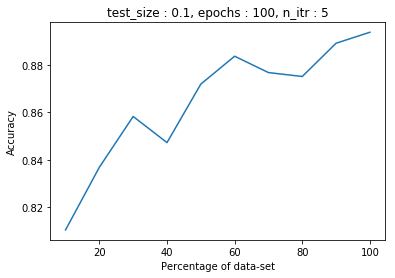

../dataset/bigdata1/result_dnn/graphs_dnn/test_size : 0.2epochs : 100n_itr : 5.png


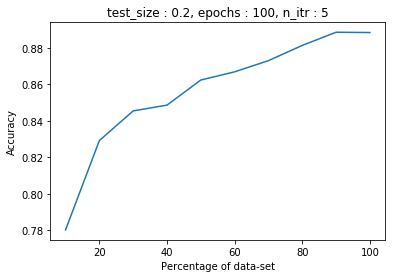

../dataset/bigdata1/result_dnn/graphs_dnn/test_size : 0.3epochs : 100n_itr : 5.png


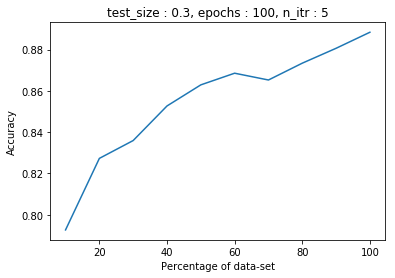

In [31]:
import matplotlib.pyplot as plt
x_axis = [10*i for i in range(1,11)]
title = []
for v in valuesOfTestSize:
    for e in valuesOfEpochs:
        title.append(["test_size : "+str(v),"epochs : " + str(e), "n_itr : " + str(n_itr)])
for i in range(0,len(overAllY)):
    y_axis = overAllY[i]
    plt.plot(x_axis,y_axis)
    plt.xlabel('Percentage of data-set')
    plt.ylabel('Accuracy')
    plt.title(title[i][0]+", "+title[i][1] + ", " + title[i][2])
    filename = "../dataset/bigdata1/result_dnn/graphs_dnn/"+str(title[i][0])+str(title[i][1])+str(title[i][2])+".png"
    print(filename)
    plt.savefig(filename)
    plt.show()

In [32]:
with open("../dataset/bigdata1/result_dnn/dnn_result_5iterations.txt","a+") as f:
    for i in range(0,len(overAllY)):
        line = str(title[i][0])+", "+ str(title[i][1])+", "+str(title[i][2])
        f.write(line+"\r\n")
        f.write(str(overAllY[i])+"\r\n")